In [1]:
%load_ext autoreload
%autoreload 2

from typing import Literal, Union
from pathlib import Path
import csv
from datetime import datetime
import random


import pandas as pd
import dspy
from dspy.evaluate import Evaluate
from dspy.teleprompt import MIPROv2
from sklearn.model_selection import train_test_split

from programs import WrapperSpanishSPT, evaluate_answer
from custom_evaluation import custom_evaluate

In [2]:
lm = dspy.LM(
    "ollama_chat/llama3.3",
    api_base="http://localhost:11434",
)
dspy.settings.configure(lm=lm)

In [3]:
lm("What is your name")

['I\'m an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI."']

In [4]:
data = pd.read_csv("dev_dwug_en_resampled.csv")
display(data.shape)

(5846, 8)

In [5]:
training_set = []

for _, row in data.iterrows():
    training_set.append(
        dspy.Example(
            sentence1=row["context_x"],
            sentence2=row["context_y"],
            target_word=row["lemma"],
            answer=int(row["judgment"]),
        ).with_inputs("sentence1", "sentence2", "target_word")
    )

In [6]:
classes_1_en = [item for item in training_set if item.answer == 1]
classes_2_en = [item for item in training_set if item.answer == 2]
classes_3_en = [item for item in training_set if item.answer == 3]
classes_4_en = [item for item in training_set if item.answer == 4]

print(len(classes_1_en))
print(len(classes_2_en))
print(len(classes_3_en))
print(len(classes_4_en))

classes_1_train, classes_1_dev = train_test_split(
    classes_1_en,
    test_size=0.2,
    random_state=42,
)
classes_1_train, classes_1_test = train_test_split(
    classes_1_train,
    test_size=0.2,
    random_state=42,
)

classes_2_train, classes_2_dev = train_test_split(
    classes_2_en,
    test_size=0.2,
    random_state=42,
)
classes_2_train, classes_2_test = train_test_split(
    classes_2_train,
    test_size=0.2,
    random_state=42,
)

classes_3_train, classes_3_dev = train_test_split(
    classes_3_en,
    test_size=0.2,
    random_state=42,
)
classes_3_train, classes_3_test = train_test_split(
    classes_3_train,
    test_size=0.2,
    random_state=42,
)

classes_4_train, classes_4_dev = train_test_split(
    classes_4_en,
    test_size=0.2,
    random_state=42,
)
classes_4_train, classes_4_test = train_test_split(
    classes_4_train,
    test_size=0.2,
    random_state=42,
)

print(len(classes_1_train), len(classes_1_dev), len(classes_1_test))
print(len(classes_2_train), len(classes_2_dev), len(classes_2_test))
print(len(classes_3_train), len(classes_3_dev), len(classes_3_test))
print(len(classes_4_train), len(classes_4_dev), len(classes_4_test))

641
1658
1472
2075
409 129 103
1060 332 266
941 295 236
1328 415 332


In [7]:
program_spt_prompt_es_assertions = WrapperSpanishSPT().activate_assertions()

In [8]:
custom_evaluate(
    random.choices(classes_1_test, k=100)
    + random.choices(classes_2_test, k=100)
    + random.choices(classes_3_test, k=100)
    + random.choices(classes_4_test, k=100),
    evaluate_answer,
    program_spt_prompt_es_assertions,
    debug=True,
)

Evaluating: 400 examples


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  1
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  3
Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  1
Prediction:  3


Prediction:  1
Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  1


Prediction:  3


Prediction:  3
Prediction:  1


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  3


Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  3
Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  1
Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  4
Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3
Accurate examples: 143
Bad-formatted examples: 0
Accuracy: 35.75


In [9]:
start_time = datetime.now()

teleprompter = MIPROv2(
    metric=evaluate_answer,
    num_candidates=10,
    init_temperature=0.7,
    max_bootstrapped_demos=3,
    max_labeled_demos=4,
    verbose=False,
)

print("Optimizing program with MIPRO...")
optimized_program = teleprompter.compile(
    program_spt_prompt_es_assertions.deepcopy(),
    trainset=random.choices(classes_1_train, k=400)
    + random.choices(classes_2_train, k=400)
    + random.choices(classes_3_train, k=400)
    + random.choices(classes_4_train, k=400),
    valset=random.choices(classes_1_dev, k=100)
    + random.choices(classes_2_dev, k=100)
    + random.choices(classes_3_dev, k=100)
    + random.choices(classes_4_dev, k=100),
    num_trials=15,
    minibatch_size=25,
    minibatch_full_eval_steps=10,
    minibatch=True,
    requires_permission_to_run=False,
)

optimized_program.save(f"compile-models/sp/en_spt_mipro_optimized_prompt_es_llama3-3-q4")

print(f"Elapsed time: {datetime.now() - start_time}")

2025/04/17 22:24:13 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==


2025/04/17 22:24:13 INFO dspy.teleprompt.mipro_optimizer_v2: These will be used as few-shot example candidates for our program and for creating instructions.



2025/04/17 22:24:13 INFO dspy.teleprompt.mipro_optimizer_v2: Bootstrapping N=10 sets of demonstrations...


Optimizing program with MIPRO...
Bootstrapping set 1/10
Bootstrapping set 2/10
Bootstrapping set 3/10


  0%|                                                                                                                  | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/1600 [01:43<45:46:45, 103.07s/it]

  0%|▏                                                                                                      | 2/1600 [03:18<43:39:26, 98.35s/it]

  0%|▏                                                                                                     | 3/1600 [05:12<46:51:17, 105.62s/it]

  0%|▎                                                                                                     | 4/1600 [06:48<45:11:55, 101.95s/it]

  0%|▎                                                                                                     | 5/1600 [08:34<45:43:55, 103.22s/it]

  0%|▍                                                                                                     | 6/1600 [10:09<44:29:46, 100.49s/it]

  0%|▍                                                                                                     | 6/1600 [10:09<44:58:14, 101.56s/it]

Bootstrapped 3 full traces after 6 examples for up to 1 rounds, amounting to 6 attempts.
Bootstrapping set 4/10


  0%|                                                                                                                  | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/1600 [01:48<48:23:42, 108.96s/it]

  0%|▏                                                                                                     | 2/1600 [03:30<46:32:55, 104.87s/it]

  0%|▏                                                                                                     | 3/1600 [05:06<44:32:22, 100.40s/it]

  0%|▎                                                                                                     | 4/1600 [06:46<44:33:37, 100.51s/it]

  0%|▎                                                                                                     | 5/1600 [08:31<45:15:11, 102.14s/it]

  0%|▍                                                                                                     | 6/1600 [10:08<44:26:33, 100.37s/it]

  0%|▍                                                                                                     | 6/1600 [10:08<44:55:10, 101.45s/it]

Bootstrapped 2 full traces after 6 examples for up to 1 rounds, amounting to 6 attempts.
Bootstrapping set 5/10


  0%|                                                                                                                  | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/1600 [01:38<43:57:16, 98.96s/it]

  0%|▏                                                                                                     | 2/1600 [03:40<49:43:36, 112.03s/it]

  0%|▏                                                                                                     | 2/1600 [03:40<48:51:24, 110.07s/it]

Bootstrapped 2 full traces after 2 examples for up to 1 rounds, amounting to 2 attempts.
Bootstrapping set 6/10


  0%|                                                                                                                  | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/1600 [01:39<44:24:39, 99.99s/it]

  0%|▏                                                                                                     | 2/1600 [03:29<46:52:05, 105.59s/it]

  0%|▏                                                                                                     | 2/1600 [03:29<46:29:43, 104.75s/it]

Bootstrapped 2 full traces after 2 examples for up to 1 rounds, amounting to 2 attempts.
Bootstrapping set 7/10


  0%|                                                                                                                  | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/1600 [01:40<44:25:59, 100.04s/it]

  0%|▏                                                                                                      | 2/1600 [03:15<43:07:17, 97.14s/it]

  0%|▏                                                                                                     | 3/1600 [04:59<44:28:06, 100.24s/it]

  0%|▎                                                                                                     | 4/1600 [06:43<45:12:56, 101.99s/it]

  0%|▎                                                                                                     | 4/1600 [06:43<44:44:58, 100.94s/it]

Bootstrapped 1 full traces after 4 examples for up to 1 rounds, amounting to 4 attempts.
Bootstrapping set 8/10


  0%|                                                                                                                  | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/1600 [01:33<41:44:26, 93.98s/it]

  0%|▏                                                                                                      | 2/1600 [03:10<42:22:50, 95.48s/it]

  0%|▏                                                                                                     | 3/1600 [05:02<45:36:11, 102.80s/it]

  0%|▎                                                                                                     | 4/1600 [06:56<47:35:38, 107.36s/it]

  0%|▎                                                                                                     | 5/1600 [08:37<46:33:21, 105.08s/it]

  0%|▎                                                                                                     | 5/1600 [08:37<45:50:50, 103.48s/it]

Bootstrapped 2 full traces after 5 examples for up to 1 rounds, amounting to 5 attempts.
Bootstrapping set 9/10


  0%|                                                                                                                  | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/1600 [01:38<43:50:16, 98.70s/it]

  0%|                                                                                                       | 1/1600 [01:38<43:50:17, 98.70s/it]

Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 10/10


  0%|                                                                                                                  | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/1600 [01:47<47:44:48, 107.50s/it]

  0%|                                                                                                      | 1/1600 [01:47<47:44:49, 107.50s/it]


2025/04/17 23:10:28 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==


2025/04/17 23:10:28 INFO dspy.teleprompt.mipro_optimizer_v2: We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.


Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.


2025/04/17 23:33:24 INFO dspy.teleprompt.mipro_optimizer_v2: 
Proposing instructions...



2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: Proposed Instructions for Predictor 0:



2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 0: Eres una herramienta de anotación de datos textuales altamente entrenada, capaz de proporcionar respuestas
subjetivas. Evalúa la similitud semántica de la palabra objetivo en estas oraciones 1 y 2. Considera solo los objetos/conceptos
a los que se refieren las palabras: ¡Ignora cualquier etimología común y similitud metafórica! ¡Ignora mayúsculas!
¡Ignora número (gato/Gatos = significado idéntico)! Los homónimos (como murciélago el animal vs murciélago en béisbol)
se consideran no relacionados. De como salida una calificación numérica: 1 es no relacionado; 2 es lejanamente relacionado; 3 es
estrechamente relacionado; 4 es significado idéntico. Tu respuesta debe alinearse con el juicio sucinto de un humano.



2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 1: Eres un experto en lingüística y análisis semántico, capaz de evaluar la similitud entre conceptos y objetos en diferentes contextos. Evalúa la similitud semántica de la palabra objetivo en estas oraciones 1 y 2. Considera solo los objetos/conceptos a los que se refieren las palabras: ¡Ignora cualquier etimología común y similitud metafórica! ¡Ignora mayúsculas! ¡Ignora número (gato/Gatos = significado idéntico)! Los homónimos (como murciélago el animal vs murciélago en béisbol) se consideran no relacionados. De como salida una calificación numérica: 1 es no relacionado; 2 es lejanamente relacionado; 3 es estrechamente relacionado; 4 es significado idéntico. Tu respuesta debe alinearse con el juicio sucinto de un humano.



2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 2: Imagine que estás trabajando en un proyecto de investigación crítico donde la precisión en la evaluación de la similitud semántica entre palabras es crucial. Tu tarea es evaluar la relación semántica entre la palabra objetivo en dos oraciones dadas, ignorando cualquier conexión etimológica o metafórica, y sin considerar mayúsculas o números. Los homónimos deben ser tratados como conceptos no relacionados. Debes proporcionar una calificación numérica que refleje el grado de relación: 1 para no relacionado, 2 para lejanamente relacionado, 3 para estrechamente relacionado, y 4 para significado idéntico. La precisión en esta tarea es vital, ya que los resultados influirán directamente en las conclusiones del proyecto y podrían tener implicaciones significativas en el campo de la investigación.



2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 3: Para evaluar la similitud semántica entre las palabras objetivo en dos oraciones diferentes, sigue estos pasos:

1. **Identifica el significado principal**: Determina el concepto o objeto al que se refiere la palabra objetivo en cada oración, ignorando cualquier etimología común y similitud metafórica.
2. **Ignora mayúsculas y números**: No consideres las diferencias en mayúsculas y minúsculas, ni los cambios en el número (singular o plural) como factores que afecten la similitud semántica.
3. **Considera homónimos**: Si una palabra tiene múltiples significados (homónimos), como "murciélago" refiriéndose al animal o al objeto deportivo, considera estos casos como no relacionados.
4. **Evalúa la similitud**: Compara los significados principales de la palabra objetivo en ambas oraciones y evalúa su similitud semántica según la siguiente escala:
   - 1: No relacionado
   - 2: Lejanamente relacionado
   - 3: Estrechamente rela

2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 4: Para evaluar la similitud semántica entre la palabra objetivo en las oraciones dadas, necesito seguir los siguientes pasos:

1. Identificar el significado de la palabra objetivo en cada oración.
2. Ignorar cualquier etimología común y similitud metafórica entre las palabras.
3. No considerar mayúsculas ni número (singular vs plural) al comparar los significados.
4. Tratar a los homónimos como palabras no relacionadas.
5. Asignar una calificación numérica según la siguiente escala:
 - 1: No relacionado
 - 2: Lejanamente relacionado
 - 3: Estrechamente relacionado
 - 4: Significado idéntico

Con estos pasos, puedo proporcionar una evaluación subjetiva de la similitud semántica entre la palabra objetivo en las oraciones dadas.



2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 5: You are a highly trained data annotator, capable of providing subjective answers. You have been tasked with evaluating the semantic similarity of the target word in sentences 1 and 2 for a critical project that will determine the fate of a prestigious artificial intelligence research grant. The success of this project relies on your ability to accurately assess the meaning of words in different contexts. Consider only the objects/concepts to which the words refer: ignore any common etymology and metaphorical similarity! Ignore capitalization! Ignore number (cat/Cats = identical meaning)! Homonyms (such as bat the animal vs bat in baseball) are considered unrelated. Provide a numerical rating as output: 1 is unrelated; 2 is distantly related; 3 is closely related; 4 is identical meaning. Your response must align with the succinct judgment of a human. If your answer is incorrect, the entire project will be jeopardized, and t

2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 6: Para evaluar la similitud semántica entre las palabras objetivo en dos oraciones diferentes, debes considerar cuidadosamente el contexto y el significado literal de cada palabra. Ignora cualquier relación etimológica o metafórica, y no te dejes influir por mayúsculas o números (singular vs plural). Los homónimos, que son palabras con el mismo sonido o escritura pero significados diferentes, deben ser considerados como no relacionados.

Al evaluar la similitud semántica, sigue estos pasos:

1. **Identifica los conceptos**: Determina a qué objeto o concepto se refiere cada palabra objetivo en sus respectivas oraciones.
2. **Ignora etimología y metáforas**: No consideres relaciones históricas entre palabras (etimología) ni comparaciones metafóricas. Enfócate en el significado literal actual.
3. **Mayúsculas y números no importan**: Trata las palabras de manera case-insensitive (no importa si están en mayúsculas o minúsculas) 

2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 7: Eres una herramienta de anotación de datos textuales altamente entrenada, capaz de proporcionar respuestas subjetivas. Evalúa la similitud semántica de la palabra objetivo en estas oraciones 1 y 2. Considera solo los objetos/conceptos a los que se refieren las palabras: Ignora cualquier etimología común y similitud metafórica. Ignora mayúsculas. Ignora número (gato/Gatos = significado idéntico). Los homónimos (como murciélago el animal vs murciélago en béisbol) se consideran no relacionados. De como salida una calificación numérica: 1 es no relacionado; 2 es lejanamente relacionado; 3 es estrechamente relacionado; 4 es significado idéntico. Tu respuesta debe alinearse con el juicio sucinto de un humano.



2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 8: Eres un lingüista experto en semántica y análisis del lenguaje, capaz de evaluar la similitud entre conceptos y significados en diferentes contextos. Tu tarea es analizar las oraciones 1 y 2, e identificar la similitud semántica de la palabra objetivo en cada una. Considera solo los objetos o conceptos a los que se refieren las palabras, ignorando cualquier etimología común, similitud metafórica, mayúsculas y números (por ejemplo, "gato" y "gatos" tienen el mismo significado). Los homónimos (palabras con el mismo sonido o escritura pero significados diferentes) se consideran no relacionados. Proporciona una calificación numérica para la similitud semántica de la palabra objetivo en las oraciones 1 y 2, donde: 1 es no relacionado, 2 es lejanamente relacionado, 3 es estrechamente relacionado y 4 es significado idéntico. Asegúrate de que tu respuesta refleje el juicio sucinto de un humano.



2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 9: You are a highly trained data annotation tool capable of providing subjective responses. Evaluate the semantic similarity of the target word in sentences 1 and 2, considering only the objects/concepts to which the words refer. Ignore any common etymology and metaphorical similarity! Ignore capitalization! Ignore number (cat/cats = identical meaning)! Homonyms (such as bat the animal vs bat in baseball) are considered unrelated. Provide a numerical score as output: 1 is unrelated; 2 is distantly related; 3 is closely related; 4 is identical meaning. Your response should align with the succinct judgment of a human.

In a high-stakes scenario, your accuracy in evaluating semantic similarity will directly impact the development of advanced natural language processing systems, which could revolutionize fields such as artificial intelligence, machine translation, and text summarization. The future of effective human-computer int

2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/18 00:33:30 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the default program...



  0%|                                                                                                                   | 0/400 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                   | 0/400 [01:38<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|▏                                                                       | 1/400 [01:38<10:54:13, 98.38s/it]

Average Metric: 1 / 2  (50.0):   0%|▏                                                                        | 1/400 [03:46<10:54:13, 98.38s/it]

Average Metric: 1 / 2  (50.0):   0%|▎                                                                       | 2/400 [03:46<12:47:37, 115.72s/it]

Average Metric: 1 / 3  (33.3):   0%|▎                                                                       | 2/400 [05:40<12:47:37, 115.72s/it]

Average Metric: 1 / 3  (33.3):   1%|▌                                                                       | 3/400 [05:40<12:41:31, 115.09s/it]

Average Metric: 1 / 4  (25.0):   1%|▌                                                                       | 3/400 [07:24<12:41:31, 115.09s/it]

Average Metric: 1 / 4  (25.0):   1%|▋                                                                       | 4/400 [07:24<12:09:53, 110.59s/it]

Average Metric: 1 / 5  (20.0):   1%|▋                                                                       | 4/400 [09:13<12:09:53, 110.59s/it]

Average Metric: 1 / 5  (20.0):   1%|▉                                                                       | 5/400 [09:13<12:04:01, 109.98s/it]

Average Metric: 1 / 6  (16.7):   1%|▉                                                                       | 5/400 [10:50<12:04:01, 109.98s/it]

Average Metric: 1 / 6  (16.7):   2%|█                                                                       | 6/400 [10:50<11:33:44, 105.65s/it]

Average Metric: 1 / 7  (14.3):   2%|█                                                                       | 6/400 [12:32<11:33:44, 105.65s/it]

Average Metric: 1 / 7  (14.3):   2%|█▎                                                                      | 7/400 [12:32<11:23:51, 104.41s/it]

Average Metric: 1 / 8  (12.5):   2%|█▎                                                                      | 7/400 [14:37<11:23:51, 104.41s/it]

Average Metric: 1 / 8  (12.5):   2%|█▍                                                                      | 8/400 [14:37<12:05:47, 111.09s/it]

Average Metric: 2 / 9  (22.2):   2%|█▍                                                                      | 8/400 [16:24<12:05:47, 111.09s/it]

Average Metric: 2 / 9  (22.2):   2%|█▌                                                                      | 9/400 [16:24<11:56:01, 109.88s/it]

Average Metric: 2 / 10  (20.0):   2%|█▌                                                                     | 9/400 [17:59<11:56:01, 109.88s/it]

Average Metric: 2 / 10  (20.0):   2%|█▊                                                                    | 10/400 [17:59<11:23:18, 105.13s/it]

Average Metric: 2 / 11  (18.2):   2%|█▊                                                                    | 10/400 [19:27<11:23:18, 105.13s/it]

Average Metric: 2 / 11  (18.2):   3%|█▉                                                                     | 11/400 [19:27<10:46:59, 99.79s/it]

Average Metric: 3 / 12  (25.0):   3%|█▉                                                                     | 11/400 [21:04<10:46:59, 99.79s/it]

Average Metric: 3 / 12  (25.0):   3%|██▏                                                                    | 12/400 [21:04<10:40:32, 99.05s/it]

Average Metric: 3 / 13  (23.1):   3%|██▏                                                                    | 12/400 [22:31<10:40:32, 99.05s/it]

Average Metric: 3 / 13  (23.1):   3%|██▎                                                                    | 13/400 [22:31<10:16:23, 95.56s/it]

Average Metric: 4 / 14  (28.6):   3%|██▎                                                                    | 13/400 [24:01<10:16:23, 95.56s/it]

Average Metric: 4 / 14  (28.6):   4%|██▍                                                                    | 14/400 [24:01<10:02:22, 93.63s/it]

Average Metric: 4 / 15  (26.7):   4%|██▍                                                                    | 14/400 [24:01<10:02:22, 93.63s/it]

Average Metric: 5 / 16  (31.2):   4%|██▋                                                                    | 15/400 [25:34<10:00:48, 93.63s/it]

Average Metric: 5 / 16  (31.2):   4%|██▉                                                                     | 16/400 [25:34<7:39:28, 71.79s/it]

Average Metric: 5 / 17  (29.4):   4%|██▉                                                                     | 16/400 [27:06<7:39:28, 71.79s/it]

Average Metric: 5 / 17  (29.4):   4%|███                                                                     | 17/400 [27:06<8:11:41, 77.03s/it]

Average Metric: 5 / 18  (27.8):   4%|███                                                                     | 17/400 [27:06<8:11:41, 77.03s/it]

Average Metric: 5 / 19  (26.3):   4%|███▏                                                                    | 18/400 [28:30<8:10:24, 77.03s/it]

Average Metric: 5 / 19  (26.3):   5%|███▍                                                                    | 19/400 [28:30<6:36:27, 62.44s/it]

Average Metric: 5 / 20  (25.0):   5%|███▍                                                                    | 19/400 [29:57<6:36:27, 62.44s/it]

Average Metric: 5 / 20  (25.0):   5%|███▌                                                                    | 20/400 [29:57<7:11:14, 68.09s/it]

Average Metric: 5 / 21  (23.8):   5%|███▌                                                                    | 20/400 [31:32<7:11:14, 68.09s/it]

Average Metric: 5 / 21  (23.8):   5%|███▊                                                                    | 21/400 [31:32<7:50:47, 74.53s/it]

Average Metric: 6 / 22  (27.3):   5%|███▊                                                                    | 21/400 [33:06<7:50:47, 74.53s/it]

Average Metric: 6 / 22  (27.3):   6%|███▉                                                                    | 22/400 [33:06<8:22:41, 79.79s/it]

Average Metric: 7 / 23  (30.4):   6%|███▉                                                                    | 22/400 [34:28<8:22:41, 79.79s/it]

Average Metric: 7 / 23  (30.4):   6%|████▏                                                                   | 23/400 [34:28<8:24:26, 80.28s/it]

Average Metric: 7 / 24  (29.2):   6%|████▏                                                                   | 23/400 [36:01<8:24:26, 80.28s/it]

Average Metric: 7 / 24  (29.2):   6%|████▎                                                                   | 24/400 [36:01<8:44:51, 83.75s/it]

Average Metric: 7 / 25  (28.0):   6%|████▎                                                                   | 24/400 [37:41<8:44:51, 83.75s/it]

Average Metric: 7 / 25  (28.0):   6%|████▌                                                                   | 25/400 [37:41<9:13:38, 88.58s/it]

Average Metric: 8 / 26  (30.8):   6%|████▌                                                                   | 25/400 [39:00<9:13:38, 88.58s/it]

Average Metric: 8 / 26  (30.8):   6%|████▋                                                                   | 26/400 [39:00<8:54:55, 85.82s/it]

Average Metric: 8 / 27  (29.6):   6%|████▋                                                                   | 26/400 [40:36<8:54:55, 85.82s/it]

Average Metric: 8 / 27  (29.6):   7%|████▊                                                                   | 27/400 [40:36<9:10:40, 88.58s/it]

Average Metric: 8 / 28  (28.6):   7%|████▊                                                                   | 27/400 [42:04<9:10:40, 88.58s/it]

Average Metric: 8 / 28  (28.6):   7%|█████                                                                   | 28/400 [42:04<9:08:43, 88.50s/it]

Average Metric: 8 / 29  (27.6):   7%|█████                                                                   | 28/400 [43:38<9:08:43, 88.50s/it]

Average Metric: 8 / 29  (27.6):   7%|█████▏                                                                  | 29/400 [43:38<9:17:40, 90.19s/it]

Average Metric: 8 / 30  (26.7):   7%|█████▏                                                                  | 29/400 [45:09<9:17:40, 90.19s/it]

Average Metric: 8 / 30  (26.7):   8%|█████▍                                                                  | 30/400 [45:09<9:17:28, 90.40s/it]

Average Metric: 8 / 31  (25.8):   8%|█████▍                                                                  | 30/400 [46:50<9:17:28, 90.40s/it]

Average Metric: 8 / 31  (25.8):   8%|█████▌                                                                  | 31/400 [46:50<9:34:49, 93.47s/it]

Average Metric: 8 / 32  (25.0):   8%|█████▌                                                                  | 31/400 [48:23<9:34:49, 93.47s/it]

Average Metric: 8 / 32  (25.0):   8%|█████▊                                                                  | 32/400 [48:23<9:32:32, 93.35s/it]

Average Metric: 9 / 33  (27.3):   8%|█████▊                                                                  | 32/400 [49:47<9:32:32, 93.35s/it]

Average Metric: 9 / 33  (27.3):   8%|█████▉                                                                  | 33/400 [49:47<9:14:03, 90.58s/it]

Average Metric: 9 / 34  (26.5):   8%|█████▉                                                                  | 33/400 [49:47<9:14:03, 90.58s/it]

Average Metric: 9 / 35  (25.7):   8%|██████                                                                  | 34/400 [51:17<9:12:32, 90.58s/it]

Average Metric: 9 / 35  (25.7):   9%|██████▎                                                                 | 35/400 [51:17<7:03:10, 69.56s/it]

Average Metric: 9 / 36  (25.0):   9%|██████▎                                                                 | 35/400 [52:57<7:03:10, 69.56s/it]

Average Metric: 9 / 36  (25.0):   9%|██████▍                                                                 | 36/400 [52:57<7:47:28, 77.06s/it]

Average Metric: 10 / 37  (27.0):   9%|██████▍                                                                | 36/400 [54:28<7:47:28, 77.06s/it]

Average Metric: 10 / 37  (27.0):   9%|██████▌                                                                | 37/400 [54:28<8:08:45, 80.79s/it]

Average Metric: 10 / 38  (26.3):   9%|██████▌                                                                | 37/400 [55:52<8:08:45, 80.79s/it]

Average Metric: 10 / 38  (26.3):  10%|██████▋                                                                | 38/400 [55:52<8:13:12, 81.75s/it]

Average Metric: 10 / 39  (25.6):  10%|██████▋                                                                | 38/400 [57:31<8:13:12, 81.75s/it]

Average Metric: 10 / 39  (25.6):  10%|██████▉                                                                | 39/400 [57:31<8:40:34, 86.52s/it]

Average Metric: 10 / 40  (25.0):  10%|██████▉                                                                | 39/400 [59:04<8:40:34, 86.52s/it]

Average Metric: 10 / 40  (25.0):  10%|███████                                                                | 40/400 [59:04<8:49:25, 88.24s/it]

Average Metric: 10 / 41  (24.4):  10%|██████▉                                                              | 40/400 [1:00:35<8:49:25, 88.24s/it]

Average Metric: 10 / 41  (24.4):  10%|███████                                                              | 41/400 [1:00:35<8:52:43, 89.04s/it]

Average Metric: 10 / 42  (23.8):  10%|███████                                                              | 41/400 [1:02:08<8:52:43, 89.04s/it]

Average Metric: 10 / 42  (23.8):  10%|███████▏                                                             | 42/400 [1:02:08<8:58:31, 90.25s/it]

Average Metric: 10 / 43  (23.3):  10%|███████▏                                                             | 42/400 [1:03:41<8:58:31, 90.25s/it]

Average Metric: 10 / 43  (23.3):  11%|███████▍                                                             | 43/400 [1:03:41<9:02:15, 91.14s/it]

Average Metric: 10 / 44  (22.7):  11%|███████▍                                                             | 43/400 [1:03:41<9:02:15, 91.14s/it]

Average Metric: 10 / 45  (22.2):  11%|███████▌                                                             | 44/400 [1:03:41<9:00:44, 91.14s/it]

Average Metric: 10 / 46  (21.7):  11%|███████▊                                                             | 45/400 [1:03:41<8:59:13, 91.14s/it]

Average Metric: 11 / 47  (23.4):  12%|███████▉                                                             | 46/400 [1:05:13<8:57:42, 91.14s/it]

Average Metric: 11 / 47  (23.4):  12%|████████                                                             | 47/400 [1:05:13<4:44:19, 48.33s/it]

Average Metric: 11 / 48  (22.9):  12%|████████                                                             | 47/400 [1:06:48<4:44:19, 48.33s/it]

Average Metric: 11 / 48  (22.9):  12%|████████▎                                                            | 48/400 [1:06:48<5:33:53, 56.91s/it]

Average Metric: 11 / 49  (22.4):  12%|████████▎                                                            | 48/400 [1:08:27<5:33:53, 56.91s/it]

Average Metric: 11 / 49  (22.4):  12%|████████▍                                                            | 49/400 [1:08:27<6:24:21, 65.70s/it]

Average Metric: 12 / 50  (24.0):  12%|████████▍                                                            | 49/400 [1:10:00<6:24:21, 65.70s/it]

Average Metric: 12 / 50  (24.0):  12%|████████▋                                                            | 50/400 [1:10:00<6:58:39, 71.77s/it]

Average Metric: 13 / 51  (25.5):  12%|████████▋                                                            | 50/400 [1:11:31<6:58:39, 71.77s/it]

Average Metric: 13 / 51  (25.5):  13%|████████▊                                                            | 51/400 [1:11:31<7:26:12, 76.71s/it]

Average Metric: 14 / 52  (26.9):  13%|████████▊                                                            | 51/400 [1:13:02<7:26:12, 76.71s/it]

Average Metric: 14 / 52  (26.9):  13%|████████▉                                                            | 52/400 [1:13:02<7:45:39, 80.29s/it]

Average Metric: 14 / 53  (26.4):  13%|████████▉                                                            | 52/400 [1:14:33<7:45:39, 80.29s/it]

Average Metric: 14 / 53  (26.4):  13%|█████████▏                                                           | 53/400 [1:14:33<8:01:11, 83.20s/it]

Average Metric: 14 / 54  (25.9):  13%|█████████▏                                                           | 53/400 [1:16:04<8:01:11, 83.20s/it]

Average Metric: 14 / 54  (25.9):  14%|█████████▎                                                           | 54/400 [1:16:04<8:12:48, 85.46s/it]

Average Metric: 14 / 55  (25.5):  14%|█████████▎                                                           | 54/400 [1:17:31<8:12:48, 85.46s/it]

Average Metric: 14 / 55  (25.5):  14%|█████████▍                                                           | 55/400 [1:17:31<8:14:10, 85.94s/it]

Average Metric: 14 / 56  (25.0):  14%|█████████▍                                                           | 55/400 [1:19:00<8:14:10, 85.94s/it]

Average Metric: 14 / 56  (25.0):  14%|█████████▋                                                           | 56/400 [1:19:00<8:17:26, 86.76s/it]

Average Metric: 14 / 57  (24.6):  14%|█████████▋                                                           | 56/400 [1:20:42<8:17:26, 86.76s/it]

Average Metric: 14 / 57  (24.6):  14%|█████████▊                                                           | 57/400 [1:20:42<8:41:33, 91.24s/it]

Average Metric: 14 / 58  (24.1):  14%|█████████▊                                                           | 57/400 [1:22:07<8:41:33, 91.24s/it]

Average Metric: 14 / 58  (24.1):  14%|██████████                                                           | 58/400 [1:22:07<8:29:56, 89.46s/it]

Average Metric: 14 / 59  (23.7):  14%|██████████                                                           | 58/400 [1:22:07<8:29:56, 89.46s/it]

Average Metric: 14 / 60  (23.3):  15%|██████████▏                                                          | 59/400 [1:22:07<8:28:26, 89.46s/it]

Average Metric: 15 / 61  (24.6):  15%|██████████▎                                                          | 60/400 [1:23:37<8:26:57, 89.46s/it]

Average Metric: 15 / 61  (24.6):  15%|██████████▌                                                          | 61/400 [1:23:37<5:17:32, 56.20s/it]

Average Metric: 15 / 62  (24.2):  15%|██████████▌                                                          | 61/400 [1:23:37<5:17:32, 56.20s/it]

Average Metric: 15 / 63  (23.8):  16%|██████████▋                                                          | 62/400 [1:25:15<5:16:35, 56.20s/it]

Average Metric: 15 / 63  (23.8):  16%|██████████▊                                                          | 63/400 [1:25:15<5:01:27, 53.67s/it]

Average Metric: 15 / 64  (23.4):  16%|██████████▊                                                          | 63/400 [1:25:15<5:01:27, 53.67s/it]

Average Metric: 15 / 65  (23.1):  16%|███████████                                                          | 64/400 [1:26:49<5:00:33, 53.67s/it]

Average Metric: 15 / 65  (23.1):  16%|███████████▏                                                         | 65/400 [1:26:49<4:47:12, 51.44s/it]

Average Metric: 15 / 66  (22.7):  16%|███████████▏                                                         | 65/400 [1:26:49<4:47:12, 51.44s/it]

Average Metric: 15 / 67  (22.4):  16%|███████████▍                                                         | 66/400 [1:26:49<4:46:20, 51.44s/it]

Average Metric: 16 / 68  (23.5):  17%|███████████▌                                                         | 67/400 [1:26:49<4:45:29, 51.44s/it]

Average Metric: 16 / 69  (23.2):  17%|███████████▋                                                         | 68/400 [1:26:49<4:44:38, 51.44s/it]

Average Metric: 17 / 70  (24.3):  17%|███████████▉                                                         | 69/400 [1:28:19<4:43:46, 51.44s/it]

Average Metric: 17 / 70  (24.3):  18%|████████████                                                         | 70/400 [1:28:19<3:03:28, 33.36s/it]

Average Metric: 18 / 71  (25.4):  18%|████████████                                                         | 70/400 [1:29:50<3:03:28, 33.36s/it]

Average Metric: 18 / 71  (25.4):  18%|████████████▏                                                        | 71/400 [1:29:50<3:45:25, 41.11s/it]

Average Metric: 18 / 72  (25.0):  18%|████████████▏                                                        | 71/400 [1:31:22<3:45:25, 41.11s/it]

Average Metric: 18 / 72  (25.0):  18%|████████████▍                                                        | 72/400 [1:31:22<4:29:15, 49.25s/it]

Average Metric: 18 / 73  (24.7):  18%|████████████▍                                                        | 72/400 [1:31:22<4:29:15, 49.25s/it]

Average Metric: 18 / 74  (24.3):  18%|████████████▌                                                        | 73/400 [1:33:00<4:28:26, 49.25s/it]

Average Metric: 18 / 74  (24.3):  18%|████████████▊                                                        | 74/400 [1:33:00<4:27:17, 49.19s/it]

Average Metric: 18 / 75  (24.0):  18%|████████████▊                                                        | 74/400 [1:34:32<4:27:17, 49.19s/it]

Average Metric: 18 / 75  (24.0):  19%|████████████▉                                                        | 75/400 [1:34:32<5:08:24, 56.94s/it]

Average Metric: 18 / 76  (23.7):  19%|████████████▉                                                        | 75/400 [1:35:58<5:08:24, 56.94s/it]

Average Metric: 18 / 76  (23.7):  19%|█████████████                                                        | 76/400 [1:35:58<5:40:12, 63.00s/it]

Average Metric: 18 / 77  (23.4):  19%|█████████████                                                        | 76/400 [1:35:58<5:40:12, 63.00s/it]

Average Metric: 18 / 78  (23.1):  19%|█████████████▎                                                       | 77/400 [1:35:58<5:39:09, 63.00s/it]

Average Metric: 18 / 79  (22.8):  20%|█████████████▍                                                       | 78/400 [1:35:58<5:38:06, 63.00s/it]

Average Metric: 18 / 80  (22.5):  20%|█████████████▋                                                       | 79/400 [1:35:58<5:37:03, 63.00s/it]

Average Metric: 19 / 81  (23.5):  20%|█████████████▊                                                       | 80/400 [1:37:29<5:36:00, 63.00s/it]

Average Metric: 19 / 81  (23.5):  20%|█████████████▉                                                       | 81/400 [1:37:29<3:12:49, 36.27s/it]

Average Metric: 19 / 82  (23.2):  20%|█████████████▉                                                       | 81/400 [1:37:29<3:12:49, 36.27s/it]

Average Metric: 19 / 83  (22.9):  20%|██████████████▏                                                      | 82/400 [1:39:10<3:12:13, 36.27s/it]

Average Metric: 19 / 83  (22.9):  21%|██████████████▎                                                      | 83/400 [1:39:10<3:31:04, 39.95s/it]

Average Metric: 19 / 84  (22.6):  21%|██████████████▎                                                      | 83/400 [1:39:10<3:31:04, 39.95s/it]

Average Metric: 19 / 85  (22.4):  21%|██████████████▍                                                      | 84/400 [1:39:10<3:30:24, 39.95s/it]

Average Metric: 20 / 86  (23.3):  21%|██████████████▋                                                      | 85/400 [1:39:10<3:29:44, 39.95s/it]

Average Metric: 20 / 87  (23.0):  22%|██████████████▊                                                      | 86/400 [1:39:10<3:29:04, 39.95s/it]

Average Metric: 21 / 88  (23.9):  22%|███████████████                                                      | 87/400 [1:40:42<3:28:24, 39.95s/it]

Average Metric: 21 / 88  (23.9):  22%|███████████████▏                                                     | 88/400 [1:40:42<2:34:07, 29.64s/it]

Average Metric: 21 / 89  (23.6):  22%|███████████████▏                                                     | 88/400 [1:42:21<2:34:07, 29.64s/it]

Average Metric: 21 / 89  (23.6):  22%|███████████████▎                                                     | 89/400 [1:42:21<3:16:43, 37.95s/it]

Average Metric: 22 / 90  (24.4):  22%|███████████████▎                                                     | 89/400 [1:42:21<3:16:43, 37.95s/it]

Average Metric: 22 / 91  (24.2):  22%|███████████████▌                                                     | 90/400 [1:43:57<3:16:05, 37.95s/it]

Average Metric: 22 / 91  (24.2):  23%|███████████████▋                                                     | 91/400 [1:43:57<3:28:23, 40.46s/it]

Average Metric: 22 / 92  (23.9):  23%|███████████████▋                                                     | 91/400 [1:43:57<3:28:23, 40.46s/it]

Average Metric: 22 / 93  (23.7):  23%|███████████████▊                                                     | 92/400 [1:43:57<3:27:43, 40.46s/it]

Average Metric: 22 / 94  (23.4):  23%|████████████████                                                     | 93/400 [1:43:57<3:27:02, 40.46s/it]

Average Metric: 23 / 95  (24.2):  24%|████████████████▏                                                    | 94/400 [1:45:19<3:26:22, 40.46s/it]

Average Metric: 23 / 95  (24.2):  24%|████████████████▍                                                    | 95/400 [1:45:19<2:43:15, 32.11s/it]

Average Metric: 24 / 96  (25.0):  24%|████████████████▍                                                    | 95/400 [1:46:44<2:43:15, 32.11s/it]

Average Metric: 24 / 96  (25.0):  24%|████████████████▌                                                    | 96/400 [1:46:44<3:17:53, 39.06s/it]

Average Metric: 24 / 97  (24.7):  24%|████████████████▌                                                    | 96/400 [1:48:10<3:17:53, 39.06s/it]

Average Metric: 24 / 97  (24.7):  24%|████████████████▋                                                    | 97/400 [1:48:10<3:54:23, 46.42s/it]

Average Metric: 25 / 98  (25.5):  24%|████████████████▋                                                    | 97/400 [1:48:10<3:54:23, 46.42s/it]

Average Metric: 25 / 99  (25.3):  24%|████████████████▉                                                    | 98/400 [1:48:10<3:53:37, 46.42s/it]

Average Metric: 25 / 100  (25.0):  25%|████████████████▊                                                   | 99/400 [1:48:10<3:52:51, 46.42s/it]

Average Metric: 26 / 101  (25.7):  25%|████████████████▊                                                  | 100/400 [1:49:44<3:52:04, 46.42s/it]

Average Metric: 26 / 101  (25.7):  25%|████████████████▉                                                  | 101/400 [1:49:44<2:57:12, 35.56s/it]

Average Metric: 27 / 102  (26.5):  25%|████████████████▉                                                  | 101/400 [1:51:17<2:57:12, 35.56s/it]

Average Metric: 27 / 102  (26.5):  26%|█████████████████                                                  | 102/400 [1:51:17<3:37:37, 43.82s/it]

Average Metric: 27 / 103  (26.2):  26%|█████████████████                                                  | 102/400 [1:53:02<3:37:37, 43.82s/it]

Average Metric: 27 / 103  (26.2):  26%|█████████████████▎                                                 | 103/400 [1:53:02<4:28:54, 54.32s/it]

Average Metric: 27 / 104  (26.0):  26%|█████████████████▎                                                 | 103/400 [1:54:32<4:28:54, 54.32s/it]

Average Metric: 27 / 104  (26.0):  26%|█████████████████▍                                                 | 104/400 [1:54:32<5:02:27, 61.31s/it]

Average Metric: 28 / 105  (26.7):  26%|█████████████████▍                                                 | 104/400 [1:56:01<5:02:27, 61.31s/it]

Average Metric: 28 / 105  (26.7):  26%|█████████████████▌                                                 | 105/400 [1:56:01<5:31:39, 67.46s/it]

Average Metric: 28 / 106  (26.4):  26%|█████████████████▌                                                 | 105/400 [1:57:35<5:31:39, 67.46s/it]

Average Metric: 28 / 106  (26.4):  26%|█████████████████▊                                                 | 106/400 [1:57:35<6:01:04, 73.69s/it]

Average Metric: 29 / 107  (27.1):  26%|█████████████████▊                                                 | 106/400 [1:59:05<6:01:04, 73.69s/it]

Average Metric: 29 / 107  (27.1):  27%|█████████████████▉                                                 | 107/400 [1:59:05<6:20:38, 77.95s/it]

Average Metric: 30 / 108  (27.8):  27%|█████████████████▉                                                 | 107/400 [2:00:37<6:20:38, 77.95s/it]

Average Metric: 30 / 108  (27.8):  27%|██████████████████                                                 | 108/400 [2:00:37<6:37:30, 81.68s/it]

Average Metric: 30 / 109  (27.5):  27%|██████████████████                                                 | 108/400 [2:02:09<6:37:30, 81.68s/it]

Average Metric: 30 / 109  (27.5):  27%|██████████████████▎                                                | 109/400 [2:02:09<6:50:00, 84.54s/it]

Average Metric: 30 / 110  (27.3):  27%|██████████████████▎                                                | 109/400 [2:03:35<6:50:00, 84.54s/it]

Average Metric: 30 / 110  (27.3):  28%|██████████████████▍                                                | 110/400 [2:03:35<6:50:14, 84.88s/it]

Average Metric: 31 / 111  (27.9):  28%|██████████████████▍                                                | 110/400 [2:05:06<6:50:14, 84.88s/it]

Average Metric: 31 / 111  (27.9):  28%|██████████████████▌                                                | 111/400 [2:05:06<6:57:31, 86.68s/it]

Average Metric: 32 / 112  (28.6):  28%|██████████████████▌                                                | 111/400 [2:06:34<6:57:31, 86.68s/it]

Average Metric: 32 / 112  (28.6):  28%|██████████████████▊                                                | 112/400 [2:06:34<6:57:49, 87.05s/it]

Average Metric: 33 / 113  (29.2):  28%|██████████████████▊                                                | 112/400 [2:08:03<6:57:49, 87.05s/it]

Average Metric: 33 / 113  (29.2):  28%|██████████████████▉                                                | 113/400 [2:08:03<6:59:11, 87.64s/it]

Average Metric: 34 / 114  (29.8):  28%|██████████████████▉                                                | 113/400 [2:09:36<6:59:11, 87.64s/it]

Average Metric: 34 / 114  (29.8):  28%|███████████████████                                                | 114/400 [2:09:36<7:04:57, 89.15s/it]

Average Metric: 35 / 115  (30.4):  28%|███████████████████                                                | 114/400 [2:11:02<7:04:57, 89.15s/it]

Average Metric: 35 / 115  (30.4):  29%|███████████████████▎                                               | 115/400 [2:11:02<6:59:02, 88.22s/it]

Average Metric: 36 / 116  (31.0):  29%|███████████████████▎                                               | 115/400 [2:12:33<6:59:02, 88.22s/it]

Average Metric: 36 / 116  (31.0):  29%|███████████████████▍                                               | 116/400 [2:12:33<7:01:46, 89.11s/it]

Average Metric: 37 / 117  (31.6):  29%|███████████████████▍                                               | 116/400 [2:14:00<7:01:46, 89.11s/it]

Average Metric: 37 / 117  (31.6):  29%|███████████████████▌                                               | 117/400 [2:14:00<6:56:42, 88.35s/it]

Average Metric: 37 / 118  (31.4):  29%|███████████████████▌                                               | 117/400 [2:15:31<6:56:42, 88.35s/it]

Average Metric: 37 / 118  (31.4):  30%|███████████████████▊                                               | 118/400 [2:15:31<6:59:27, 89.25s/it]

Average Metric: 38 / 119  (31.9):  30%|███████████████████▊                                               | 118/400 [2:17:08<6:59:27, 89.25s/it]

Average Metric: 38 / 119  (31.9):  30%|███████████████████▉                                               | 119/400 [2:17:08<7:08:45, 91.55s/it]

Average Metric: 39 / 120  (32.5):  30%|███████████████████▉                                               | 119/400 [2:18:32<7:08:45, 91.55s/it]

Average Metric: 39 / 120  (32.5):  30%|████████████████████                                               | 120/400 [2:18:32<6:56:15, 89.20s/it]

Average Metric: 40 / 121  (33.1):  30%|████████████████████                                               | 120/400 [2:20:10<6:56:15, 89.20s/it]

Average Metric: 40 / 121  (33.1):  30%|████████████████████▎                                              | 121/400 [2:20:10<7:07:17, 91.89s/it]

Average Metric: 41 / 122  (33.6):  30%|████████████████████▎                                              | 121/400 [2:21:38<7:07:17, 91.89s/it]

Average Metric: 41 / 122  (33.6):  30%|████████████████████▍                                              | 122/400 [2:21:38<7:00:39, 90.79s/it]

Average Metric: 42 / 123  (34.1):  30%|████████████████████▍                                              | 122/400 [2:23:06<7:00:39, 90.79s/it]

Average Metric: 42 / 123  (34.1):  31%|████████████████████▌                                              | 123/400 [2:23:06<6:55:02, 89.90s/it]

Average Metric: 43 / 124  (34.7):  31%|████████████████████▌                                              | 123/400 [2:24:41<6:55:02, 89.90s/it]

Average Metric: 43 / 124  (34.7):  31%|████████████████████▊                                              | 124/400 [2:24:41<7:00:08, 91.34s/it]

Average Metric: 43 / 125  (34.4):  31%|████████████████████▊                                              | 124/400 [2:26:03<7:00:08, 91.34s/it]

Average Metric: 43 / 125  (34.4):  31%|████████████████████▉                                              | 125/400 [2:26:03<6:47:03, 88.81s/it]

Average Metric: 43 / 126  (34.1):  31%|████████████████████▉                                              | 125/400 [2:27:46<6:47:03, 88.81s/it]

Average Metric: 43 / 126  (34.1):  32%|█████████████████████                                              | 126/400 [2:27:46<7:04:19, 92.92s/it]

Average Metric: 43 / 127  (33.9):  32%|█████████████████████                                              | 126/400 [2:29:11<7:04:19, 92.92s/it]

Average Metric: 43 / 127  (33.9):  32%|█████████████████████▎                                             | 127/400 [2:29:11<6:51:32, 90.45s/it]

Average Metric: 44 / 128  (34.4):  32%|█████████████████████▎                                             | 127/400 [2:30:42<6:51:32, 90.45s/it]

Average Metric: 44 / 128  (34.4):  32%|█████████████████████▍                                             | 128/400 [2:30:42<6:50:52, 90.63s/it]

Average Metric: 45 / 129  (34.9):  32%|█████████████████████▍                                             | 128/400 [2:32:17<6:50:52, 90.63s/it]

Average Metric: 45 / 129  (34.9):  32%|█████████████████████▌                                             | 129/400 [2:32:17<6:55:04, 91.90s/it]

Average Metric: 46 / 130  (35.4):  32%|█████████████████████▌                                             | 129/400 [2:33:47<6:55:04, 91.90s/it]

Average Metric: 46 / 130  (35.4):  32%|█████████████████████▊                                             | 130/400 [2:33:47<6:51:50, 91.52s/it]

Average Metric: 46 / 131  (35.1):  32%|█████████████████████▊                                             | 130/400 [2:35:12<6:51:50, 91.52s/it]

Average Metric: 46 / 131  (35.1):  33%|█████████████████████▉                                             | 131/400 [2:35:12<6:40:41, 89.37s/it]

Average Metric: 46 / 132  (34.8):  33%|█████████████████████▉                                             | 131/400 [2:36:51<6:40:41, 89.37s/it]

Average Metric: 46 / 132  (34.8):  33%|██████████████████████                                             | 132/400 [2:36:51<6:52:10, 92.28s/it]

Average Metric: 47 / 133  (35.3):  33%|██████████████████████                                             | 132/400 [2:38:25<6:52:10, 92.28s/it]

Average Metric: 47 / 133  (35.3):  33%|██████████████████████▎                                            | 133/400 [2:38:25<6:53:23, 92.90s/it]

Average Metric: 47 / 134  (35.1):  33%|██████████████████████▎                                            | 133/400 [2:39:59<6:53:23, 92.90s/it]

Average Metric: 47 / 134  (35.1):  34%|██████████████████████▍                                            | 134/400 [2:39:59<6:53:27, 93.26s/it]

Average Metric: 48 / 135  (35.6):  34%|██████████████████████▍                                            | 134/400 [2:41:38<6:53:27, 93.26s/it]

Average Metric: 48 / 135  (35.6):  34%|██████████████████████▌                                            | 135/400 [2:41:38<6:58:48, 94.82s/it]

Average Metric: 49 / 136  (36.0):  34%|██████████████████████▌                                            | 135/400 [2:43:13<6:58:48, 94.82s/it]

Average Metric: 49 / 136  (36.0):  34%|██████████████████████▊                                            | 136/400 [2:43:13<6:57:39, 94.92s/it]

Average Metric: 50 / 137  (36.5):  34%|██████████████████████▊                                            | 136/400 [2:44:48<6:57:39, 94.92s/it]

Average Metric: 50 / 137  (36.5):  34%|██████████████████████▉                                            | 137/400 [2:44:48<6:56:44, 95.07s/it]

Average Metric: 50 / 138  (36.2):  34%|██████████████████████▉                                            | 137/400 [2:44:48<6:56:44, 95.07s/it]

Average Metric: 50 / 139  (36.0):  34%|███████████████████████                                            | 138/400 [2:46:14<6:55:09, 95.07s/it]

Average Metric: 50 / 139  (36.0):  35%|███████████████████████▎                                           | 139/400 [2:46:14<5:08:43, 70.97s/it]

Average Metric: 50 / 140  (35.7):  35%|███████████████████████▎                                           | 139/400 [2:47:48<5:08:43, 70.97s/it]

Average Metric: 50 / 140  (35.7):  35%|███████████████████████▍                                           | 140/400 [2:47:48<5:32:40, 76.77s/it]

Average Metric: 51 / 141  (36.2):  35%|███████████████████████▍                                           | 140/400 [2:49:20<5:32:40, 76.77s/it]

Average Metric: 51 / 141  (36.2):  35%|███████████████████████▌                                           | 141/400 [2:49:20<5:48:45, 80.79s/it]

Average Metric: 51 / 142  (35.9):  35%|███████████████████████▌                                           | 141/400 [2:49:20<5:48:45, 80.79s/it]

Average Metric: 51 / 143  (35.7):  36%|███████████████████████▊                                           | 142/400 [2:50:51<5:47:24, 80.79s/it]

Average Metric: 51 / 143  (35.7):  36%|███████████████████████▉                                           | 143/400 [2:50:51<4:41:14, 65.66s/it]

Average Metric: 52 / 144  (36.1):  36%|███████████████████████▉                                           | 143/400 [2:52:30<4:41:14, 65.66s/it]

Average Metric: 52 / 144  (36.1):  36%|████████████████████████                                           | 144/400 [2:52:30<5:13:28, 73.47s/it]

Average Metric: 53 / 145  (36.6):  36%|████████████████████████                                           | 144/400 [2:54:03<5:13:28, 73.47s/it]

Average Metric: 53 / 145  (36.6):  36%|████████████████████████▎                                          | 145/400 [2:54:03<5:33:07, 78.38s/it]

Average Metric: 54 / 146  (37.0):  36%|████████████████████████▎                                          | 145/400 [2:55:28<5:33:07, 78.38s/it]

Average Metric: 54 / 146  (37.0):  36%|████████████████████████▍                                          | 146/400 [2:55:28<5:39:13, 80.13s/it]

Average Metric: 55 / 147  (37.4):  36%|████████████████████████▍                                          | 146/400 [2:57:01<5:39:13, 80.13s/it]

Average Metric: 55 / 147  (37.4):  37%|████████████████████████▌                                          | 147/400 [2:57:01<5:51:59, 83.48s/it]

Average Metric: 55 / 148  (37.2):  37%|████████████████████████▌                                          | 147/400 [2:58:26<5:51:59, 83.48s/it]

Average Metric: 55 / 148  (37.2):  37%|████████████████████████▊                                          | 148/400 [2:58:26<5:53:17, 84.12s/it]

Average Metric: 56 / 149  (37.6):  37%|████████████████████████▊                                          | 148/400 [2:59:52<5:53:17, 84.12s/it]

Average Metric: 56 / 149  (37.6):  37%|████████████████████████▉                                          | 149/400 [2:59:52<5:53:52, 84.59s/it]

Average Metric: 56 / 150  (37.3):  37%|████████████████████████▉                                          | 149/400 [3:01:26<5:53:52, 84.59s/it]

Average Metric: 56 / 150  (37.3):  38%|█████████████████████████▏                                         | 150/400 [3:01:26<6:03:51, 87.33s/it]

Average Metric: 56 / 151  (37.1):  38%|█████████████████████████▏                                         | 150/400 [3:02:55<6:03:51, 87.33s/it]

Average Metric: 56 / 151  (37.1):  38%|█████████████████████████▎                                         | 151/400 [3:02:55<6:04:33, 87.84s/it]

Average Metric: 57 / 152  (37.5):  38%|█████████████████████████▎                                         | 151/400 [3:04:49<6:04:33, 87.84s/it]

Average Metric: 57 / 152  (37.5):  38%|█████████████████████████▍                                         | 152/400 [3:04:49<6:34:51, 95.53s/it]

Average Metric: 58 / 153  (37.9):  38%|█████████████████████████▍                                         | 152/400 [3:06:09<6:34:51, 95.53s/it]

Average Metric: 58 / 153  (37.9):  38%|█████████████████████████▋                                         | 153/400 [3:06:09<6:14:16, 90.92s/it]

Average Metric: 58 / 154  (37.7):  38%|█████████████████████████▋                                         | 153/400 [3:07:38<6:14:16, 90.92s/it]

Average Metric: 58 / 154  (37.7):  38%|█████████████████████████▊                                         | 154/400 [3:07:38<6:10:52, 90.46s/it]

Average Metric: 58 / 155  (37.4):  38%|█████████████████████████▊                                         | 154/400 [3:09:06<6:10:52, 90.46s/it]

Average Metric: 58 / 155  (37.4):  39%|█████████████████████████▉                                         | 155/400 [3:09:06<6:05:52, 89.60s/it]

Average Metric: 58 / 156  (37.2):  39%|█████████████████████████▉                                         | 155/400 [3:09:06<6:05:52, 89.60s/it]

Average Metric: 59 / 157  (37.6):  39%|██████████████████████████▏                                        | 156/400 [3:09:06<6:04:23, 89.60s/it]

Average Metric: 60 / 158  (38.0):  39%|██████████████████████████▎                                        | 157/400 [3:10:32<6:02:53, 89.60s/it]

Average Metric: 60 / 158  (38.0):  40%|██████████████████████████▍                                        | 158/400 [3:10:32<3:43:44, 55.47s/it]

Average Metric: 61 / 159  (38.4):  40%|██████████████████████████▍                                        | 158/400 [3:11:59<3:43:44, 55.47s/it]

Average Metric: 61 / 159  (38.4):  40%|██████████████████████████▋                                        | 159/400 [3:11:59<4:09:07, 62.02s/it]

Average Metric: 61 / 160  (38.1):  40%|██████████████████████████▋                                        | 159/400 [3:11:59<4:09:07, 62.02s/it]

Average Metric: 61 / 161  (37.9):  40%|██████████████████████████▊                                        | 160/400 [3:13:33<4:08:05, 62.02s/it]

Average Metric: 61 / 161  (37.9):  40%|██████████████████████████▉                                        | 161/400 [3:13:33<3:44:17, 56.31s/it]

Average Metric: 62 / 162  (38.3):  40%|██████████████████████████▉                                        | 161/400 [3:13:33<3:44:17, 56.31s/it]

Average Metric: 63 / 163  (38.7):  40%|███████████████████████████▏                                       | 162/400 [3:14:58<3:43:21, 56.31s/it]

Average Metric: 63 / 163  (38.7):  41%|███████████████████████████▎                                       | 163/400 [3:14:58<3:23:32, 51.53s/it]

Average Metric: 64 / 164  (39.0):  41%|███████████████████████████▎                                       | 163/400 [3:16:37<3:23:32, 51.53s/it]

Average Metric: 64 / 164  (39.0):  41%|███████████████████████████▍                                       | 164/400 [3:16:37<3:59:54, 60.99s/it]

Average Metric: 65 / 165  (39.4):  41%|███████████████████████████▍                                       | 164/400 [3:18:05<3:59:54, 60.99s/it]

Average Metric: 65 / 165  (39.4):  41%|███████████████████████████▋                                       | 165/400 [3:18:05<4:22:13, 66.95s/it]

Average Metric: 66 / 166  (39.8):  41%|███████████████████████████▋                                       | 165/400 [3:18:05<4:22:13, 66.95s/it]

Average Metric: 66 / 167  (39.5):  42%|███████████████████████████▊                                       | 166/400 [3:19:28<4:21:06, 66.95s/it]

Average Metric: 66 / 167  (39.5):  42%|███████████████████████████▉                                       | 167/400 [3:19:28<3:41:57, 57.16s/it]

Average Metric: 66 / 168  (39.3):  42%|███████████████████████████▉                                       | 167/400 [3:21:03<3:41:57, 57.16s/it]

Average Metric: 66 / 168  (39.3):  42%|████████████████████████████▏                                      | 168/400 [3:21:03<4:13:04, 65.45s/it]

Average Metric: 67 / 169  (39.6):  42%|████████████████████████████▏                                      | 168/400 [3:22:34<4:13:04, 65.45s/it]

Average Metric: 67 / 169  (39.6):  42%|████████████████████████████▎                                      | 169/400 [3:22:34<4:35:02, 71.44s/it]

Average Metric: 67 / 170  (39.4):  42%|████████████████████████████▎                                      | 169/400 [3:24:04<4:35:02, 71.44s/it]

Average Metric: 67 / 170  (39.4):  42%|████████████████████████████▍                                      | 170/400 [3:24:04<4:52:04, 76.19s/it]

Average Metric: 68 / 171  (39.8):  42%|████████████████████████████▍                                      | 170/400 [3:25:38<4:52:04, 76.19s/it]

Average Metric: 68 / 171  (39.8):  43%|████████████████████████████▋                                      | 171/400 [3:25:38<5:08:16, 80.77s/it]

Average Metric: 68 / 172  (39.5):  43%|████████████████████████████▋                                      | 171/400 [3:25:38<5:08:16, 80.77s/it]

Average Metric: 68 / 173  (39.3):  43%|████████████████████████████▊                                      | 172/400 [3:27:15<5:06:55, 80.77s/it]

Average Metric: 68 / 173  (39.3):  43%|████████████████████████████▉                                      | 173/400 [3:27:15<4:12:46, 66.81s/it]

Average Metric: 68 / 174  (39.1):  43%|████████████████████████████▉                                      | 173/400 [3:28:56<4:12:46, 66.81s/it]

Average Metric: 68 / 174  (39.1):  44%|█████████████████████████████▏                                     | 174/400 [3:28:56<4:42:39, 75.04s/it]

Average Metric: 68 / 175  (38.9):  44%|█████████████████████████████▏                                     | 174/400 [3:30:21<4:42:39, 75.04s/it]

Average Metric: 68 / 175  (38.9):  44%|█████████████████████████████▎                                     | 175/400 [3:30:21<4:50:23, 77.44s/it]

Average Metric: 68 / 176  (38.6):  44%|█████████████████████████████▎                                     | 175/400 [3:31:52<4:50:23, 77.44s/it]

Average Metric: 68 / 176  (38.6):  44%|█████████████████████████████▍                                     | 176/400 [3:31:52<5:02:31, 81.03s/it]

Average Metric: 68 / 177  (38.4):  44%|█████████████████████████████▍                                     | 176/400 [3:31:52<5:02:31, 81.03s/it]

Average Metric: 69 / 178  (38.8):  44%|█████████████████████████████▋                                     | 177/400 [3:33:22<5:01:10, 81.03s/it]

Average Metric: 69 / 178  (38.8):  44%|█████████████████████████████▊                                     | 178/400 [3:33:22<4:02:10, 65.45s/it]

Average Metric: 70 / 179  (39.1):  44%|█████████████████████████████▊                                     | 178/400 [3:35:01<4:02:10, 65.45s/it]

Average Metric: 70 / 179  (39.1):  45%|█████████████████████████████▉                                     | 179/400 [3:35:01<4:30:04, 73.32s/it]

Average Metric: 71 / 180  (39.4):  45%|█████████████████████████████▉                                     | 179/400 [3:36:38<4:30:04, 73.32s/it]

Average Metric: 71 / 180  (39.4):  45%|██████████████████████████████▏                                    | 180/400 [3:36:38<4:51:22, 79.46s/it]

Average Metric: 71 / 181  (39.2):  45%|██████████████████████████████▏                                    | 180/400 [3:36:38<4:51:22, 79.46s/it]

Average Metric: 72 / 182  (39.6):  45%|██████████████████████████████▎                                    | 181/400 [3:36:38<4:50:02, 79.46s/it]

Average Metric: 72 / 183  (39.3):  46%|██████████████████████████████▍                                    | 182/400 [3:36:38<4:48:43, 79.46s/it]

Average Metric: 72 / 184  (39.1):  46%|██████████████████████████████▋                                    | 183/400 [3:38:11<4:47:23, 79.46s/it]

Average Metric: 72 / 184  (39.1):  46%|██████████████████████████████▊                                    | 184/400 [3:38:11<2:46:30, 46.25s/it]

Average Metric: 72 / 185  (38.9):  46%|██████████████████████████████▊                                    | 184/400 [3:39:46<2:46:30, 46.25s/it]

Average Metric: 72 / 185  (38.9):  46%|██████████████████████████████▉                                    | 185/400 [3:39:46<3:16:15, 54.77s/it]

Average Metric: 73 / 186  (39.2):  46%|██████████████████████████████▉                                    | 185/400 [3:41:17<3:16:15, 54.77s/it]

Average Metric: 73 / 186  (39.2):  46%|███████████████████████████████▏                                   | 186/400 [3:41:17<3:41:06, 61.99s/it]

Average Metric: 74 / 187  (39.6):  46%|███████████████████████████████▏                                   | 186/400 [3:41:17<3:41:06, 61.99s/it]

Average Metric: 74 / 188  (39.4):  47%|███████████████████████████████▎                                   | 187/400 [3:42:39<3:40:04, 61.99s/it]

Average Metric: 74 / 188  (39.4):  47%|███████████████████████████████▍                                   | 188/400 [3:42:39<3:12:13, 54.41s/it]

Average Metric: 75 / 189  (39.7):  47%|███████████████████████████████▍                                   | 188/400 [3:44:15<3:12:13, 54.41s/it]

Average Metric: 75 / 189  (39.7):  47%|███████████████████████████████▋                                   | 189/400 [3:44:15<3:41:30, 62.99s/it]

Average Metric: 76 / 190  (40.0):  47%|███████████████████████████████▋                                   | 189/400 [3:45:45<3:41:30, 62.99s/it]

Average Metric: 76 / 190  (40.0):  48%|███████████████████████████████▊                                   | 190/400 [3:45:45<4:01:41, 69.06s/it]

Average Metric: 76 / 191  (39.8):  48%|███████████████████████████████▊                                   | 190/400 [3:47:20<4:01:41, 69.06s/it]

Average Metric: 76 / 191  (39.8):  48%|███████████████████████████████▉                                   | 191/400 [3:47:20<4:22:56, 75.49s/it]

Average Metric: 77 / 192  (40.1):  48%|███████████████████████████████▉                                   | 191/400 [3:48:48<4:22:56, 75.49s/it]

Average Metric: 77 / 192  (40.1):  48%|████████████████████████████████▏                                  | 192/400 [3:48:48<4:32:52, 78.71s/it]

Average Metric: 77 / 193  (39.9):  48%|████████████████████████████████▏                                  | 192/400 [3:48:48<4:32:52, 78.71s/it]

Average Metric: 78 / 194  (40.2):  48%|████████████████████████████████▎                                  | 193/400 [3:50:18<4:31:33, 78.71s/it]

Average Metric: 78 / 194  (40.2):  48%|████████████████████████████████▍                                  | 194/400 [3:50:18<3:40:42, 64.28s/it]

Average Metric: 79 / 195  (40.5):  48%|████████████████████████████████▍                                  | 194/400 [3:51:47<3:40:42, 64.28s/it]

Average Metric: 79 / 195  (40.5):  49%|████████████████████████████████▋                                  | 195/400 [3:51:47<3:59:02, 69.96s/it]

Average Metric: 80 / 196  (40.8):  49%|████████████████████████████████▋                                  | 195/400 [3:51:47<3:59:02, 69.96s/it]

Average Metric: 80 / 197  (40.6):  49%|████████████████████████████████▊                                  | 196/400 [3:51:47<3:57:52, 69.96s/it]

Average Metric: 80 / 198  (40.4):  49%|████████████████████████████████▉                                  | 197/400 [3:53:26<3:56:42, 69.96s/it]

Average Metric: 80 / 198  (40.4):  50%|█████████████████████████████████▏                                 | 198/400 [3:53:26<2:53:40, 51.59s/it]

Average Metric: 80 / 199  (40.2):  50%|█████████████████████████████████▏                                 | 198/400 [3:54:59<2:53:40, 51.59s/it]

Average Metric: 80 / 199  (40.2):  50%|█████████████████████████████████▎                                 | 199/400 [3:54:59<3:19:19, 59.50s/it]

Average Metric: 80 / 200  (40.0):  50%|█████████████████████████████████▎                                 | 199/400 [3:56:40<3:19:19, 59.50s/it]

Average Metric: 80 / 200  (40.0):  50%|█████████████████████████████████▌                                 | 200/400 [3:56:40<3:48:25, 68.53s/it]

Average Metric: 80 / 201  (39.8):  50%|█████████████████████████████████▌                                 | 200/400 [3:58:13<3:48:25, 68.53s/it]

Average Metric: 80 / 201  (39.8):  50%|█████████████████████████████████▋                                 | 201/400 [3:58:13<4:06:27, 74.31s/it]

Average Metric: 81 / 202  (40.1):  50%|█████████████████████████████████▋                                 | 201/400 [3:59:42<4:06:27, 74.31s/it]

Average Metric: 81 / 202  (40.1):  50%|█████████████████████████████████▊                                 | 202/400 [3:59:42<4:17:24, 78.00s/it]

Average Metric: 82 / 203  (40.4):  50%|█████████████████████████████████▊                                 | 202/400 [4:01:19<4:17:24, 78.00s/it]

Average Metric: 82 / 203  (40.4):  51%|██████████████████████████████████                                 | 203/400 [4:01:19<4:32:36, 83.03s/it]

Average Metric: 83 / 204  (40.7):  51%|██████████████████████████████████                                 | 203/400 [4:02:50<4:32:36, 83.03s/it]

Average Metric: 83 / 204  (40.7):  51%|██████████████████████████████████▏                                | 204/400 [4:02:50<4:38:05, 85.13s/it]

Average Metric: 83 / 205  (40.5):  51%|██████████████████████████████████▏                                | 204/400 [4:04:19<4:38:05, 85.13s/it]

Average Metric: 83 / 205  (40.5):  51%|██████████████████████████████████▎                                | 205/400 [4:04:19<4:39:56, 86.13s/it]

Average Metric: 83 / 206  (40.3):  51%|██████████████████████████████████▎                                | 205/400 [4:05:54<4:39:56, 86.13s/it]

Average Metric: 83 / 206  (40.3):  52%|██████████████████████████████████▌                                | 206/400 [4:05:54<4:47:03, 88.78s/it]

Average Metric: 83 / 207  (40.1):  52%|██████████████████████████████████▌                                | 206/400 [4:07:27<4:47:03, 88.78s/it]

Average Metric: 83 / 207  (40.1):  52%|██████████████████████████████████▋                                | 207/400 [4:07:27<4:48:52, 89.81s/it]

Average Metric: 84 / 208  (40.4):  52%|██████████████████████████████████▋                                | 207/400 [4:08:54<4:48:52, 89.81s/it]

Average Metric: 84 / 208  (40.4):  52%|██████████████████████████████████▊                                | 208/400 [4:08:54<4:45:03, 89.08s/it]

Average Metric: 85 / 209  (40.7):  52%|██████████████████████████████████▊                                | 208/400 [4:10:19<4:45:03, 89.08s/it]

Average Metric: 85 / 209  (40.7):  52%|███████████████████████████████████                                | 209/400 [4:10:19<4:40:14, 88.04s/it]

Average Metric: 86 / 210  (41.0):  52%|███████████████████████████████████                                | 209/400 [4:11:56<4:40:14, 88.04s/it]

Average Metric: 86 / 210  (41.0):  52%|███████████████████████████████████▏                               | 210/400 [4:11:56<4:46:36, 90.51s/it]

Average Metric: 86 / 211  (40.8):  52%|███████████████████████████████████▏                               | 210/400 [4:13:23<4:46:36, 90.51s/it]

Average Metric: 86 / 211  (40.8):  53%|███████████████████████████████████▎                               | 211/400 [4:13:23<4:42:19, 89.63s/it]

Average Metric: 86 / 212  (40.6):  53%|███████████████████████████████████▎                               | 211/400 [4:14:46<4:42:19, 89.63s/it]

Average Metric: 86 / 212  (40.6):  53%|███████████████████████████████████▌                               | 212/400 [4:14:46<4:34:12, 87.51s/it]

Average Metric: 87 / 213  (40.8):  53%|███████████████████████████████████▌                               | 212/400 [4:16:14<4:34:12, 87.51s/it]

Average Metric: 87 / 213  (40.8):  53%|███████████████████████████████████▋                               | 213/400 [4:16:14<4:32:53, 87.56s/it]

Average Metric: 87 / 214  (40.7):  53%|███████████████████████████████████▋                               | 213/400 [4:17:49<4:32:53, 87.56s/it]

Average Metric: 87 / 214  (40.7):  54%|███████████████████████████████████▊                               | 214/400 [4:17:49<4:39:04, 90.03s/it]

Average Metric: 87 / 215  (40.5):  54%|███████████████████████████████████▊                               | 214/400 [4:19:21<4:39:04, 90.03s/it]

Average Metric: 87 / 215  (40.5):  54%|████████████████████████████████████                               | 215/400 [4:19:21<4:39:05, 90.52s/it]

Average Metric: 88 / 216  (40.7):  54%|████████████████████████████████████                               | 215/400 [4:20:55<4:39:05, 90.52s/it]

Average Metric: 88 / 216  (40.7):  54%|████████████████████████████████████▏                              | 216/400 [4:20:55<4:41:14, 91.71s/it]

Average Metric: 89 / 217  (41.0):  54%|████████████████████████████████████▏                              | 216/400 [4:22:25<4:41:14, 91.71s/it]

Average Metric: 89 / 217  (41.0):  54%|████████████████████████████████████▎                              | 217/400 [4:22:25<4:37:17, 90.91s/it]

Average Metric: 90 / 218  (41.3):  54%|████████████████████████████████████▎                              | 217/400 [4:23:59<4:37:17, 90.91s/it]

Average Metric: 90 / 218  (41.3):  55%|████████████████████████████████████▌                              | 218/400 [4:23:59<4:38:57, 91.97s/it]

Average Metric: 90 / 219  (41.1):  55%|████████████████████████████████████▌                              | 218/400 [4:25:31<4:38:57, 91.97s/it]

Average Metric: 90 / 219  (41.1):  55%|████████████████████████████████████▋                              | 219/400 [4:25:31<4:37:56, 92.13s/it]

Average Metric: 91 / 220  (41.4):  55%|████████████████████████████████████▋                              | 219/400 [4:25:31<4:37:56, 92.13s/it]

Average Metric: 91 / 221  (41.2):  55%|████████████████████████████████████▊                              | 220/400 [4:27:12<4:36:24, 92.13s/it]

Average Metric: 91 / 221  (41.2):  55%|█████████████████████████████████████                              | 221/400 [4:27:12<3:37:15, 72.82s/it]

Average Metric: 91 / 222  (41.0):  55%|█████████████████████████████████████                              | 221/400 [4:28:36<3:37:15, 72.82s/it]

Average Metric: 91 / 222  (41.0):  56%|█████████████████████████████████████▏                             | 222/400 [4:28:36<3:44:07, 75.55s/it]

Average Metric: 92 / 223  (41.3):  56%|█████████████████████████████████████▏                             | 222/400 [4:30:00<3:44:07, 75.55s/it]

Average Metric: 92 / 223  (41.3):  56%|█████████████████████████████████████▎                             | 223/400 [4:30:00<3:49:37, 77.84s/it]

Average Metric: 93 / 224  (41.5):  56%|█████████████████████████████████████▎                             | 223/400 [4:31:55<3:49:37, 77.84s/it]

Average Metric: 93 / 224  (41.5):  56%|█████████████████████████████████████▌                             | 224/400 [4:31:55<4:17:34, 87.81s/it]

Average Metric: 94 / 225  (41.8):  56%|█████████████████████████████████████▌                             | 224/400 [4:33:32<4:17:34, 87.81s/it]

Average Metric: 94 / 225  (41.8):  56%|█████████████████████████████████████▋                             | 225/400 [4:33:32<4:23:55, 90.49s/it]

Average Metric: 95 / 226  (42.0):  56%|█████████████████████████████████████▋                             | 225/400 [4:35:02<4:23:55, 90.49s/it]

Average Metric: 95 / 226  (42.0):  56%|█████████████████████████████████████▊                             | 226/400 [4:35:02<4:21:44, 90.26s/it]

Average Metric: 96 / 227  (42.3):  56%|█████████████████████████████████████▊                             | 226/400 [4:36:29<4:21:44, 90.26s/it]

Average Metric: 96 / 227  (42.3):  57%|██████████████████████████████████████                             | 227/400 [4:36:29<4:17:44, 89.39s/it]

Average Metric: 97 / 228  (42.5):  57%|██████████████████████████████████████                             | 227/400 [4:37:57<4:17:44, 89.39s/it]

Average Metric: 97 / 228  (42.5):  57%|██████████████████████████████████████▏                            | 228/400 [4:37:57<4:15:10, 89.01s/it]

Average Metric: 97 / 229  (42.4):  57%|██████████████████████████████████████▏                            | 228/400 [4:37:57<4:15:10, 89.01s/it]

Average Metric: 98 / 230  (42.6):  57%|██████████████████████████████████████▎                            | 229/400 [4:39:26<4:13:41, 89.01s/it]

Average Metric: 98 / 230  (42.6):  57%|██████████████████████████████████████▌                            | 230/400 [4:39:26<3:14:24, 68.61s/it]

Average Metric: 99 / 231  (42.9):  57%|██████████████████████████████████████▌                            | 230/400 [4:39:26<3:14:24, 68.61s/it]

Average Metric: 99 / 232  (42.7):  58%|██████████████████████████████████████▋                            | 231/400 [4:41:00<3:13:15, 68.61s/it]

Average Metric: 99 / 232  (42.7):  58%|██████████████████████████████████████▊                            | 232/400 [4:41:00<2:48:45, 60.27s/it]

Average Metric: 100 / 233  (42.9):  58%|██████████████████████████████████████▎                           | 232/400 [4:41:00<2:48:45, 60.27s/it]

Average Metric: 101 / 234  (43.2):  58%|██████████████████████████████████████▍                           | 233/400 [4:42:24<2:47:45, 60.27s/it]

Average Metric: 101 / 234  (43.2):  58%|██████████████████████████████████████▌                           | 234/400 [4:42:24<2:28:32, 53.69s/it]

Average Metric: 101 / 235  (43.0):  58%|██████████████████████████████████████▌                           | 234/400 [4:44:05<2:28:32, 53.69s/it]

Average Metric: 101 / 235  (43.0):  59%|██████████████████████████████████████▊                           | 235/400 [4:44:05<2:54:02, 63.29s/it]

Average Metric: 101 / 236  (42.8):  59%|██████████████████████████████████████▊                           | 235/400 [4:45:44<2:54:02, 63.29s/it]

Average Metric: 101 / 236  (42.8):  59%|██████████████████████████████████████▉                           | 236/400 [4:45:44<3:15:09, 71.40s/it]

Average Metric: 101 / 237  (42.6):  59%|██████████████████████████████████████▉                           | 236/400 [4:47:18<3:15:09, 71.40s/it]

Average Metric: 101 / 237  (42.6):  59%|███████████████████████████████████████                           | 237/400 [4:47:18<3:28:40, 76.81s/it]

Average Metric: 102 / 238  (42.9):  59%|███████████████████████████████████████                           | 237/400 [4:48:45<3:28:40, 76.81s/it]

Average Metric: 102 / 238  (42.9):  60%|███████████████████████████████████████▎                          | 238/400 [4:48:45<3:34:34, 79.47s/it]

Average Metric: 102 / 239  (42.7):  60%|███████████████████████████████████████▎                          | 238/400 [4:50:12<3:34:34, 79.47s/it]

Average Metric: 102 / 239  (42.7):  60%|███████████████████████████████████████▍                          | 239/400 [4:50:12<3:39:02, 81.63s/it]

Average Metric: 102 / 240  (42.5):  60%|███████████████████████████████████████▍                          | 239/400 [4:51:39<3:39:02, 81.63s/it]

Average Metric: 102 / 240  (42.5):  60%|███████████████████████████████████████▌                          | 240/400 [4:51:39<3:41:20, 83.00s/it]

Average Metric: 103 / 241  (42.7):  60%|███████████████████████████████████████▌                          | 240/400 [4:53:14<3:41:20, 83.00s/it]

Average Metric: 103 / 241  (42.7):  60%|███████████████████████████████████████▊                          | 241/400 [4:53:14<3:48:42, 86.31s/it]

Average Metric: 104 / 242  (43.0):  60%|███████████████████████████████████████▊                          | 241/400 [4:54:45<3:48:42, 86.31s/it]

Average Metric: 104 / 242  (43.0):  60%|███████████████████████████████████████▉                          | 242/400 [4:54:45<3:51:29, 87.91s/it]

Average Metric: 105 / 243  (43.2):  60%|███████████████████████████████████████▉                          | 242/400 [4:56:17<3:51:29, 87.91s/it]

Average Metric: 105 / 243  (43.2):  61%|████████████████████████████████████████                          | 243/400 [4:56:17<3:52:52, 89.00s/it]

Average Metric: 105 / 244  (43.0):  61%|████████████████████████████████████████                          | 243/400 [4:57:50<3:52:52, 89.00s/it]

Average Metric: 105 / 244  (43.0):  61%|████████████████████████████████████████▎                         | 244/400 [4:57:50<3:54:19, 90.13s/it]

Average Metric: 105 / 245  (42.9):  61%|████████████████████████████████████████▎                         | 244/400 [4:59:26<3:54:19, 90.13s/it]

Average Metric: 105 / 245  (42.9):  61%|████████████████████████████████████████▍                         | 245/400 [4:59:26<3:57:47, 92.05s/it]

Average Metric: 106 / 246  (43.1):  61%|████████████████████████████████████████▍                         | 245/400 [5:00:52<3:57:47, 92.05s/it]

Average Metric: 106 / 246  (43.1):  62%|████████████████████████████████████████▌                         | 246/400 [5:00:52<3:51:01, 90.01s/it]

Average Metric: 106 / 247  (42.9):  62%|████████████████████████████████████████▌                         | 246/400 [5:02:24<3:51:01, 90.01s/it]

Average Metric: 106 / 247  (42.9):  62%|████████████████████████████████████████▊                         | 247/400 [5:02:24<3:51:28, 90.78s/it]

Average Metric: 107 / 248  (43.1):  62%|████████████████████████████████████████▊                         | 247/400 [5:02:24<3:51:28, 90.78s/it]

Average Metric: 107 / 249  (43.0):  62%|████████████████████████████████████████▉                         | 248/400 [5:03:55<3:49:58, 90.78s/it]

Average Metric: 107 / 249  (43.0):  62%|█████████████████████████████████████████                         | 249/400 [5:03:55<2:56:11, 70.01s/it]

Average Metric: 108 / 250  (43.2):  62%|█████████████████████████████████████████                         | 249/400 [5:05:19<2:56:11, 70.01s/it]

Average Metric: 108 / 250  (43.2):  62%|█████████████████████████████████████████▎                        | 250/400 [5:05:19<3:03:11, 73.28s/it]

Average Metric: 109 / 251  (43.4):  62%|█████████████████████████████████████████▎                        | 250/400 [5:06:45<3:03:11, 73.28s/it]

Average Metric: 109 / 251  (43.4):  63%|█████████████████████████████████████████▍                        | 251/400 [5:06:45<3:10:37, 76.77s/it]

Average Metric: 109 / 252  (43.3):  63%|█████████████████████████████████████████▍                        | 251/400 [5:08:21<3:10:37, 76.77s/it]

Average Metric: 109 / 252  (43.3):  63%|█████████████████████████████████████████▌                        | 252/400 [5:08:21<3:22:08, 81.95s/it]

Average Metric: 110 / 253  (43.5):  63%|█████████████████████████████████████████▌                        | 252/400 [5:09:51<3:22:08, 81.95s/it]

Average Metric: 110 / 253  (43.5):  63%|█████████████████████████████████████████▋                        | 253/400 [5:09:51<3:26:30, 84.29s/it]

Average Metric: 110 / 254  (43.3):  63%|█████████████████████████████████████████▋                        | 253/400 [5:11:17<3:26:30, 84.29s/it]

Average Metric: 110 / 254  (43.3):  64%|█████████████████████████████████████████▉                        | 254/400 [5:11:17<3:26:07, 84.71s/it]

Average Metric: 110 / 255  (43.1):  64%|█████████████████████████████████████████▉                        | 254/400 [5:12:44<3:26:07, 84.71s/it]

Average Metric: 110 / 255  (43.1):  64%|██████████████████████████████████████████                        | 255/400 [5:12:44<3:26:20, 85.38s/it]

Average Metric: 110 / 256  (43.0):  64%|██████████████████████████████████████████                        | 255/400 [5:14:24<3:26:20, 85.38s/it]

Average Metric: 110 / 256  (43.0):  64%|██████████████████████████████████████████▏                       | 256/400 [5:14:24<3:34:42, 89.46s/it]

Average Metric: 111 / 257  (43.2):  64%|██████████████████████████████████████████▏                       | 256/400 [5:14:24<3:34:42, 89.46s/it]

Average Metric: 111 / 258  (43.0):  64%|██████████████████████████████████████████▍                       | 257/400 [5:16:02<3:33:12, 89.46s/it]

Average Metric: 111 / 258  (43.0):  64%|██████████████████████████████████████████▌                       | 258/400 [5:16:02<2:48:25, 71.17s/it]

Average Metric: 111 / 259  (42.9):  64%|██████████████████████████████████████████▌                       | 258/400 [5:17:28<2:48:25, 71.17s/it]

Average Metric: 111 / 259  (42.9):  65%|██████████████████████████████████████████▋                       | 259/400 [5:17:28<2:55:51, 74.83s/it]

Average Metric: 112 / 260  (43.1):  65%|██████████████████████████████████████████▋                       | 259/400 [5:19:04<2:55:51, 74.83s/it]

Average Metric: 112 / 260  (43.1):  65%|██████████████████████████████████████████▉                       | 260/400 [5:19:04<3:07:23, 80.31s/it]

Average Metric: 112 / 261  (42.9):  65%|██████████████████████████████████████████▉                       | 260/400 [5:20:35<3:07:23, 80.31s/it]

Average Metric: 112 / 261  (42.9):  65%|███████████████████████████████████████████                       | 261/400 [5:20:35<3:12:41, 83.17s/it]

Average Metric: 112 / 262  (42.7):  65%|███████████████████████████████████████████                       | 261/400 [5:22:03<3:12:41, 83.17s/it]

Average Metric: 112 / 262  (42.7):  66%|███████████████████████████████████████████▏                      | 262/400 [5:22:03<3:14:38, 84.63s/it]

Average Metric: 113 / 263  (43.0):  66%|███████████████████████████████████████████▏                      | 262/400 [5:23:34<3:14:38, 84.63s/it]

Average Metric: 113 / 263  (43.0):  66%|███████████████████████████████████████████▍                      | 263/400 [5:23:34<3:17:11, 86.36s/it]

Average Metric: 114 / 264  (43.2):  66%|███████████████████████████████████████████▍                      | 263/400 [5:25:00<3:17:11, 86.36s/it]

Average Metric: 114 / 264  (43.2):  66%|███████████████████████████████████████████▌                      | 264/400 [5:25:00<3:15:09, 86.10s/it]

Average Metric: 115 / 265  (43.4):  66%|███████████████████████████████████████████▌                      | 264/400 [5:26:42<3:15:09, 86.10s/it]

Average Metric: 115 / 265  (43.4):  66%|███████████████████████████████████████████▋                      | 265/400 [5:26:42<3:24:31, 90.90s/it]

Average Metric: 115 / 266  (43.2):  66%|███████████████████████████████████████████▋                      | 265/400 [5:28:17<3:24:31, 90.90s/it]

Average Metric: 115 / 266  (43.2):  66%|███████████████████████████████████████████▉                      | 266/400 [5:28:17<3:25:30, 92.02s/it]

Average Metric: 116 / 267  (43.4):  66%|███████████████████████████████████████████▉                      | 266/400 [5:29:46<3:25:30, 92.02s/it]

Average Metric: 116 / 267  (43.4):  67%|████████████████████████████████████████████                      | 267/400 [5:29:46<3:22:02, 91.14s/it]

Average Metric: 116 / 268  (43.3):  67%|████████████████████████████████████████████                      | 267/400 [5:31:17<3:22:02, 91.14s/it]

Average Metric: 116 / 268  (43.3):  67%|████████████████████████████████████████████▏                     | 268/400 [5:31:17<3:20:43, 91.24s/it]

Average Metric: 117 / 269  (43.5):  67%|████████████████████████████████████████████▏                     | 268/400 [5:31:17<3:20:43, 91.24s/it]

Average Metric: 117 / 270  (43.3):  67%|████████████████████████████████████████████▍                     | 269/400 [5:32:48<3:19:12, 91.24s/it]

Average Metric: 117 / 270  (43.3):  68%|████████████████████████████████████████████▌                     | 270/400 [5:32:48<2:31:46, 70.05s/it]

Average Metric: 117 / 271  (43.2):  68%|████████████████████████████████████████████▌                     | 270/400 [5:32:48<2:31:46, 70.05s/it]

Average Metric: 118 / 272  (43.4):  68%|████████████████████████████████████████████▋                     | 271/400 [5:34:15<2:30:36, 70.05s/it]

Average Metric: 118 / 272  (43.4):  68%|████████████████████████████████████████████▉                     | 272/400 [5:34:15<2:07:05, 59.57s/it]

Average Metric: 118 / 273  (43.2):  68%|████████████████████████████████████████████▉                     | 272/400 [5:34:15<2:07:05, 59.57s/it]

Average Metric: 118 / 274  (43.1):  68%|█████████████████████████████████████████████                     | 273/400 [5:34:15<2:06:05, 59.57s/it]

Average Metric: 118 / 275  (42.9):  68%|█████████████████████████████████████████████▏                    | 274/400 [5:35:51<2:05:06, 59.57s/it]

Average Metric: 118 / 275  (42.9):  69%|█████████████████████████████████████████████▍                    | 275/400 [5:35:51<1:37:49, 46.96s/it]

Average Metric: 119 / 276  (43.1):  69%|█████████████████████████████████████████████▍                    | 275/400 [5:37:23<1:37:49, 46.96s/it]

Average Metric: 119 / 276  (43.1):  69%|█████████████████████████████████████████████▌                    | 276/400 [5:37:23<1:53:47, 55.06s/it]

Average Metric: 120 / 277  (43.3):  69%|█████████████████████████████████████████████▌                    | 276/400 [5:38:57<1:53:47, 55.06s/it]

Average Metric: 120 / 277  (43.3):  69%|█████████████████████████████████████████████▋                    | 277/400 [5:38:57<2:09:00, 62.93s/it]

Average Metric: 121 / 278  (43.5):  69%|█████████████████████████████████████████████▋                    | 277/400 [5:38:57<2:09:00, 62.93s/it]

Average Metric: 121 / 279  (43.4):  70%|█████████████████████████████████████████████▊                    | 278/400 [5:38:57<2:07:57, 62.93s/it]

Average Metric: 122 / 280  (43.6):  70%|██████████████████████████████████████████████                    | 279/400 [5:40:35<2:06:54, 62.93s/it]

Average Metric: 122 / 280  (43.6):  70%|██████████████████████████████████████████████▏                   | 280/400 [5:40:35<1:37:31, 48.76s/it]

Average Metric: 122 / 281  (43.4):  70%|██████████████████████████████████████████████▏                   | 280/400 [5:42:00<1:37:31, 48.76s/it]

Average Metric: 122 / 281  (43.4):  70%|██████████████████████████████████████████████▎                   | 281/400 [5:42:00<1:49:58, 55.45s/it]

Average Metric: 123 / 282  (43.6):  70%|██████████████████████████████████████████████▎                   | 281/400 [5:43:34<1:49:58, 55.45s/it]

Average Metric: 123 / 282  (43.6):  70%|██████████████████████████████████████████████▌                   | 282/400 [5:43:34<2:04:26, 63.27s/it]

Average Metric: 124 / 283  (43.8):  70%|██████████████████████████████████████████████▌                   | 282/400 [5:45:07<2:04:26, 63.27s/it]

Average Metric: 124 / 283  (43.8):  71%|██████████████████████████████████████████████▋                   | 283/400 [5:45:07<2:16:55, 70.22s/it]

Average Metric: 124 / 284  (43.7):  71%|██████████████████████████████████████████████▋                   | 283/400 [5:45:07<2:16:55, 70.22s/it]

Average Metric: 124 / 285  (43.5):  71%|██████████████████████████████████████████████▊                   | 284/400 [5:45:07<2:15:45, 70.22s/it]

Average Metric: 124 / 286  (43.4):  71%|███████████████████████████████████████████████                   | 285/400 [5:46:52<2:14:35, 70.22s/it]

Average Metric: 124 / 286  (43.4):  72%|███████████████████████████████████████████████▏                  | 286/400 [5:46:52<1:40:23, 52.84s/it]

Average Metric: 124 / 287  (43.2):  72%|███████████████████████████████████████████████▏                  | 286/400 [5:48:25<1:40:23, 52.84s/it]

Average Metric: 124 / 287  (43.2):  72%|███████████████████████████████████████████████▎                  | 287/400 [5:48:25<1:53:50, 60.45s/it]

Average Metric: 124 / 288  (43.1):  72%|███████████████████████████████████████████████▎                  | 287/400 [5:48:25<1:53:50, 60.45s/it]

Average Metric: 124 / 289  (42.9):  72%|███████████████████████████████████████████████▌                  | 288/400 [5:49:58<1:52:49, 60.45s/it]

Average Metric: 124 / 289  (42.9):  72%|███████████████████████████████████████████████▋                  | 289/400 [5:49:58<1:42:45, 55.55s/it]

Average Metric: 124 / 290  (42.8):  72%|███████████████████████████████████████████████▋                  | 289/400 [5:51:29<1:42:45, 55.55s/it]

Average Metric: 124 / 290  (42.8):  72%|███████████████████████████████████████████████▊                  | 290/400 [5:51:29<1:54:58, 62.72s/it]

Average Metric: 124 / 291  (42.6):  72%|███████████████████████████████████████████████▊                  | 290/400 [5:51:29<1:54:58, 62.72s/it]

Average Metric: 125 / 292  (42.8):  73%|████████████████████████████████████████████████                  | 291/400 [5:53:08<1:53:56, 62.72s/it]

Average Metric: 125 / 292  (42.8):  73%|████████████████████████████████████████████████▏                 | 292/400 [5:53:08<1:44:10, 57.88s/it]

Average Metric: 125 / 293  (42.7):  73%|████████████████████████████████████████████████▏                 | 292/400 [5:54:31<1:44:10, 57.88s/it]

Average Metric: 125 / 293  (42.7):  73%|████████████████████████████████████████████████▎                 | 293/400 [5:54:31<1:52:26, 63.05s/it]

Average Metric: 126 / 294  (42.9):  73%|████████████████████████████████████████████████▎                 | 293/400 [5:55:59<1:52:26, 63.05s/it]

Average Metric: 126 / 294  (42.9):  74%|████████████████████████████████████████████████▌                 | 294/400 [5:55:59<2:01:08, 68.57s/it]

Average Metric: 126 / 295  (42.7):  74%|████████████████████████████████████████████████▌                 | 294/400 [5:57:41<2:01:08, 68.57s/it]

Average Metric: 126 / 295  (42.7):  74%|████████████████████████████████████████████████▋                 | 295/400 [5:57:41<2:14:25, 76.82s/it]

Average Metric: 126 / 296  (42.6):  74%|████████████████████████████████████████████████▋                 | 295/400 [5:57:41<2:14:25, 76.82s/it]

Average Metric: 127 / 297  (42.8):  74%|████████████████████████████████████████████████▊                 | 296/400 [5:59:10<2:13:08, 76.82s/it]

Average Metric: 127 / 297  (42.8):  74%|█████████████████████████████████████████████████                 | 297/400 [5:59:10<1:49:08, 63.58s/it]

Average Metric: 128 / 298  (43.0):  74%|█████████████████████████████████████████████████                 | 297/400 [5:59:10<1:49:08, 63.58s/it]

Average Metric: 129 / 299  (43.1):  74%|█████████████████████████████████████████████████▏                | 298/400 [6:00:49<1:48:05, 63.58s/it]

Average Metric: 129 / 299  (43.1):  75%|█████████████████████████████████████████████████▎                | 299/400 [6:00:49<1:38:10, 58.32s/it]

Average Metric: 130 / 300  (43.3):  75%|█████████████████████████████████████████████████▎                | 299/400 [6:02:17<1:38:10, 58.32s/it]

Average Metric: 130 / 300  (43.3):  75%|█████████████████████████████████████████████████▌                | 300/400 [6:02:17<1:47:44, 64.64s/it]

Average Metric: 130 / 301  (43.2):  75%|█████████████████████████████████████████████████▌                | 300/400 [6:03:41<1:47:44, 64.64s/it]

Average Metric: 130 / 301  (43.2):  75%|█████████████████████████████████████████████████▋                | 301/400 [6:03:41<1:54:00, 69.10s/it]

Average Metric: 130 / 302  (43.0):  75%|█████████████████████████████████████████████████▋                | 301/400 [6:05:14<1:54:00, 69.10s/it]

Average Metric: 130 / 302  (43.0):  76%|█████████████████████████████████████████████████▊                | 302/400 [6:05:14<2:02:25, 74.96s/it]

Average Metric: 130 / 303  (42.9):  76%|█████████████████████████████████████████████████▊                | 302/400 [6:06:44<2:02:25, 74.96s/it]

Average Metric: 130 / 303  (42.9):  76%|█████████████████████████████████████████████████▉                | 303/400 [6:06:44<2:07:24, 78.80s/it]

Average Metric: 131 / 304  (43.1):  76%|█████████████████████████████████████████████████▉                | 303/400 [6:08:14<2:07:24, 78.80s/it]

Average Metric: 131 / 304  (43.1):  76%|██████████████████████████████████████████████████▏               | 304/400 [6:08:14<2:11:10, 81.98s/it]

Average Metric: 131 / 305  (43.0):  76%|██████████████████████████████████████████████████▏               | 304/400 [6:09:44<2:11:10, 81.98s/it]

Average Metric: 131 / 305  (43.0):  76%|██████████████████████████████████████████████████▎               | 305/400 [6:09:44<2:13:09, 84.10s/it]

Average Metric: 131 / 306  (42.8):  76%|██████████████████████████████████████████████████▎               | 305/400 [6:11:17<2:13:09, 84.10s/it]

Average Metric: 131 / 306  (42.8):  76%|██████████████████████████████████████████████████▍               | 306/400 [6:11:17<2:15:58, 86.79s/it]

Average Metric: 131 / 307  (42.7):  76%|██████████████████████████████████████████████████▍               | 306/400 [6:12:45<2:15:58, 86.79s/it]

Average Metric: 131 / 307  (42.7):  77%|██████████████████████████████████████████████████▋               | 307/400 [6:12:45<2:14:59, 87.09s/it]

Average Metric: 131 / 308  (42.5):  77%|██████████████████████████████████████████████████▋               | 307/400 [6:14:21<2:14:59, 87.09s/it]

Average Metric: 131 / 308  (42.5):  77%|██████████████████████████████████████████████████▊               | 308/400 [6:14:21<2:17:16, 89.53s/it]

Average Metric: 131 / 309  (42.4):  77%|██████████████████████████████████████████████████▊               | 308/400 [6:15:58<2:17:16, 89.53s/it]

Average Metric: 131 / 309  (42.4):  77%|██████████████████████████████████████████████████▉               | 309/400 [6:15:58<2:19:24, 91.92s/it]

Average Metric: 131 / 310  (42.3):  77%|██████████████████████████████████████████████████▉               | 309/400 [6:17:29<2:19:24, 91.92s/it]

Average Metric: 131 / 310  (42.3):  78%|███████████████████████████████████████████████████▏              | 310/400 [6:17:29<2:17:10, 91.44s/it]

Average Metric: 131 / 311  (42.1):  78%|███████████████████████████████████████████████████▏              | 310/400 [6:19:01<2:17:10, 91.44s/it]

Average Metric: 131 / 311  (42.1):  78%|███████████████████████████████████████████████████▎              | 311/400 [6:19:01<2:15:57, 91.65s/it]

Average Metric: 131 / 312  (42.0):  78%|███████████████████████████████████████████████████▎              | 311/400 [6:20:37<2:15:57, 91.65s/it]

Average Metric: 131 / 312  (42.0):  78%|███████████████████████████████████████████████████▍              | 312/400 [6:20:37<2:16:14, 92.89s/it]

Average Metric: 131 / 313  (41.9):  78%|███████████████████████████████████████████████████▍              | 312/400 [6:22:04<2:16:14, 92.89s/it]

Average Metric: 131 / 313  (41.9):  78%|███████████████████████████████████████████████████▋              | 313/400 [6:22:04<2:12:17, 91.23s/it]

Average Metric: 131 / 314  (41.7):  78%|███████████████████████████████████████████████████▋              | 313/400 [6:23:46<2:12:17, 91.23s/it]

Average Metric: 131 / 314  (41.7):  78%|███████████████████████████████████████████████████▊              | 314/400 [6:23:46<2:15:23, 94.46s/it]

Average Metric: 131 / 315  (41.6):  78%|███████████████████████████████████████████████████▊              | 314/400 [6:25:21<2:15:23, 94.46s/it]

Average Metric: 131 / 315  (41.6):  79%|███████████████████████████████████████████████████▉              | 315/400 [6:25:21<2:14:06, 94.66s/it]

Average Metric: 131 / 316  (41.5):  79%|███████████████████████████████████████████████████▉              | 315/400 [6:27:09<2:14:06, 94.66s/it]

Average Metric: 131 / 316  (41.5):  79%|████████████████████████████████████████████████████▏             | 316/400 [6:27:09<2:17:59, 98.57s/it]

Average Metric: 131 / 317  (41.3):  79%|████████████████████████████████████████████████████▏             | 316/400 [6:28:39<2:17:59, 98.57s/it]

Average Metric: 131 / 317  (41.3):  79%|████████████████████████████████████████████████████▎             | 317/400 [6:28:39<2:13:03, 96.19s/it]

Average Metric: 131 / 318  (41.2):  79%|████████████████████████████████████████████████████▎             | 317/400 [6:30:16<2:13:03, 96.19s/it]

Average Metric: 131 / 318  (41.2):  80%|████████████████████████████████████████████████████▍             | 318/400 [6:30:16<2:11:41, 96.36s/it]

Average Metric: 131 / 319  (41.1):  80%|████████████████████████████████████████████████████▍             | 318/400 [6:31:57<2:11:41, 96.36s/it]

Average Metric: 131 / 319  (41.1):  80%|████████████████████████████████████████████████████▋             | 319/400 [6:31:57<2:11:56, 97.73s/it]

Average Metric: 131 / 320  (40.9):  80%|████████████████████████████████████████████████████▋             | 319/400 [6:33:25<2:11:56, 97.73s/it]

Average Metric: 131 / 320  (40.9):  80%|████████████████████████████████████████████████████▊             | 320/400 [6:33:25<2:06:29, 94.87s/it]

Average Metric: 131 / 321  (40.8):  80%|████████████████████████████████████████████████████▊             | 320/400 [6:34:58<2:06:29, 94.87s/it]

Average Metric: 131 / 321  (40.8):  80%|████████████████████████████████████████████████████▉             | 321/400 [6:34:58<2:03:57, 94.14s/it]

Average Metric: 132 / 322  (41.0):  80%|████████████████████████████████████████████████████▉             | 321/400 [6:36:48<2:03:57, 94.14s/it]

Average Metric: 132 / 322  (41.0):  80%|█████████████████████████████████████████████████████▏            | 322/400 [6:36:48<2:08:47, 99.07s/it]

Average Metric: 132 / 323  (40.9):  80%|█████████████████████████████████████████████████████▏            | 322/400 [6:38:25<2:08:47, 99.07s/it]

Average Metric: 132 / 323  (40.9):  81%|█████████████████████████████████████████████████████▎            | 323/400 [6:38:25<2:06:10, 98.31s/it]

Average Metric: 132 / 324  (40.7):  81%|█████████████████████████████████████████████████████▎            | 323/400 [6:40:04<2:06:10, 98.31s/it]

Average Metric: 132 / 324  (40.7):  81%|█████████████████████████████████████████████████████▍            | 324/400 [6:40:04<2:04:43, 98.47s/it]

Average Metric: 132 / 325  (40.6):  81%|█████████████████████████████████████████████████████▍            | 324/400 [6:41:47<2:04:43, 98.47s/it]

Average Metric: 132 / 325  (40.6):  81%|█████████████████████████████████████████████████████▋            | 325/400 [6:41:47<2:04:56, 99.96s/it]

Average Metric: 132 / 326  (40.5):  81%|█████████████████████████████████████████████████████▋            | 325/400 [6:41:47<2:04:56, 99.96s/it]

Average Metric: 132 / 327  (40.4):  82%|█████████████████████████████████████████████████████▊            | 326/400 [6:43:20<2:03:16, 99.96s/it]

Average Metric: 132 / 327  (40.4):  82%|█████████████████████████████████████████████████████▉            | 327/400 [6:43:20<1:31:33, 75.26s/it]

Average Metric: 132 / 328  (40.2):  82%|█████████████████████████████████████████████████████▉            | 327/400 [6:45:05<1:31:33, 75.26s/it]

Average Metric: 132 / 328  (40.2):  82%|██████████████████████████████████████████████████████            | 328/400 [6:45:05<1:39:09, 82.63s/it]

Average Metric: 132 / 329  (40.1):  82%|██████████████████████████████████████████████████████            | 328/400 [6:46:41<1:39:09, 82.63s/it]

Average Metric: 132 / 329  (40.1):  82%|██████████████████████████████████████████████████████▎           | 329/400 [6:46:41<1:41:58, 86.18s/it]

Average Metric: 132 / 330  (40.0):  82%|██████████████████████████████████████████████████████▎           | 329/400 [6:48:11<1:41:58, 86.18s/it]

Average Metric: 132 / 330  (40.0):  82%|██████████████████████████████████████████████████████▍           | 330/400 [6:48:11<1:41:39, 87.14s/it]

Average Metric: 132 / 331  (39.9):  82%|██████████████████████████████████████████████████████▍           | 330/400 [6:49:48<1:41:39, 87.14s/it]

Average Metric: 132 / 331  (39.9):  83%|██████████████████████████████████████████████████████▌           | 331/400 [6:49:48<1:43:18, 89.84s/it]

Average Metric: 132 / 332  (39.8):  83%|██████████████████████████████████████████████████████▌           | 331/400 [6:51:20<1:43:18, 89.84s/it]

Average Metric: 132 / 332  (39.8):  83%|██████████████████████████████████████████████████████▊           | 332/400 [6:51:20<1:42:34, 90.51s/it]

Average Metric: 132 / 333  (39.6):  83%|██████████████████████████████████████████████████████▊           | 332/400 [6:53:08<1:42:34, 90.51s/it]

Average Metric: 132 / 333  (39.6):  83%|██████████████████████████████████████████████████████▉           | 333/400 [6:53:08<1:46:42, 95.56s/it]

Average Metric: 133 / 334  (39.8):  83%|██████████████████████████████████████████████████████▉           | 333/400 [6:54:49<1:46:42, 95.56s/it]

Average Metric: 133 / 334  (39.8):  84%|███████████████████████████████████████████████████████           | 334/400 [6:54:49<1:46:55, 97.20s/it]

Average Metric: 133 / 335  (39.7):  84%|███████████████████████████████████████████████████████           | 334/400 [6:56:25<1:46:55, 97.20s/it]

Average Metric: 133 / 335  (39.7):  84%|███████████████████████████████████████████████████████▎          | 335/400 [6:56:25<1:45:02, 96.96s/it]

Average Metric: 133 / 336  (39.6):  84%|███████████████████████████████████████████████████████▎          | 335/400 [6:58:05<1:45:02, 96.96s/it]

Average Metric: 133 / 336  (39.6):  84%|███████████████████████████████████████████████████████▍          | 336/400 [6:58:05<1:44:12, 97.70s/it]

Average Metric: 133 / 337  (39.5):  84%|███████████████████████████████████████████████████████▍          | 336/400 [6:58:05<1:44:12, 97.70s/it]

Average Metric: 133 / 338  (39.3):  84%|███████████████████████████████████████████████████████▌          | 337/400 [6:59:34<1:42:35, 97.70s/it]

Average Metric: 133 / 338  (39.3):  84%|███████████████████████████████████████████████████████▊          | 338/400 [6:59:34<1:15:45, 73.31s/it]

Average Metric: 133 / 339  (39.2):  84%|███████████████████████████████████████████████████████▊          | 338/400 [7:01:17<1:15:45, 73.31s/it]

Average Metric: 133 / 339  (39.2):  85%|███████████████████████████████████████████████████████▉          | 339/400 [7:01:17<1:21:55, 80.59s/it]

Average Metric: 133 / 340  (39.1):  85%|███████████████████████████████████████████████████████▉          | 339/400 [7:03:06<1:21:55, 80.59s/it]

Average Metric: 133 / 340  (39.1):  85%|████████████████████████████████████████████████████████          | 340/400 [7:03:06<1:27:59, 87.99s/it]

Average Metric: 133 / 341  (39.0):  85%|████████████████████████████████████████████████████████          | 340/400 [7:04:45<1:27:59, 87.99s/it]

Average Metric: 133 / 341  (39.0):  85%|████████████████████████████████████████████████████████▎         | 341/400 [7:04:45<1:29:27, 90.98s/it]

Average Metric: 133 / 342  (38.9):  85%|████████████████████████████████████████████████████████▎         | 341/400 [7:06:21<1:29:27, 90.98s/it]

Average Metric: 133 / 342  (38.9):  86%|████████████████████████████████████████████████████████▍         | 342/400 [7:06:21<1:29:17, 92.37s/it]

Average Metric: 133 / 343  (38.8):  86%|████████████████████████████████████████████████████████▍         | 342/400 [7:08:20<1:29:17, 92.37s/it]

Average Metric: 133 / 343  (38.8):  86%|████████████████████████████████████████████████████████▌         | 343/400 [7:08:20<1:34:57, 99.96s/it]

Average Metric: 133 / 344  (38.7):  86%|████████████████████████████████████████████████████████▌         | 343/400 [7:09:58<1:34:57, 99.96s/it]

Average Metric: 133 / 344  (38.7):  86%|████████████████████████████████████████████████████████▊         | 344/400 [7:09:58<1:32:50, 99.48s/it]

Average Metric: 133 / 345  (38.6):  86%|████████████████████████████████████████████████████████▊         | 344/400 [7:11:48<1:32:50, 99.48s/it]

Average Metric: 133 / 345  (38.6):  86%|████████████████████████████████████████████████████████         | 345/400 [7:11:48<1:34:01, 102.57s/it]

Average Metric: 133 / 346  (38.4):  86%|████████████████████████████████████████████████████████         | 345/400 [7:13:39<1:34:01, 102.57s/it]

Average Metric: 133 / 346  (38.4):  86%|████████████████████████████████████████████████████████▏        | 346/400 [7:13:39<1:34:37, 105.13s/it]

Average Metric: 133 / 347  (38.3):  86%|████████████████████████████████████████████████████████▏        | 346/400 [7:13:39<1:34:37, 105.13s/it]

Average Metric: 133 / 348  (38.2):  87%|████████████████████████████████████████████████████████▍        | 347/400 [7:15:32<1:32:52, 105.13s/it]

Average Metric: 133 / 348  (38.2):  87%|█████████████████████████████████████████████████████████▍        | 348/400 [7:15:32<1:11:50, 82.89s/it]

Average Metric: 134 / 349  (38.4):  87%|█████████████████████████████████████████████████████████▍        | 348/400 [7:17:05<1:11:50, 82.89s/it]

Average Metric: 134 / 349  (38.4):  87%|█████████████████████████████████████████████████████████▌        | 349/400 [7:17:05<1:12:32, 85.35s/it]

Average Metric: 134 / 350  (38.3):  87%|█████████████████████████████████████████████████████████▌        | 349/400 [7:18:50<1:12:32, 85.35s/it]

Average Metric: 134 / 350  (38.3):  88%|█████████████████████████████████████████████████████████▊        | 350/400 [7:18:50<1:15:23, 90.47s/it]

Average Metric: 134 / 351  (38.2):  88%|█████████████████████████████████████████████████████████▊        | 350/400 [7:20:37<1:15:23, 90.47s/it]

Average Metric: 134 / 351  (38.2):  88%|█████████████████████████████████████████████████████████▉        | 351/400 [7:20:37<1:17:35, 95.02s/it]

Average Metric: 134 / 352  (38.1):  88%|█████████████████████████████████████████████████████████▉        | 351/400 [7:22:11<1:17:35, 95.02s/it]

Average Metric: 134 / 352  (38.1):  88%|██████████████████████████████████████████████████████████        | 352/400 [7:22:11<1:15:42, 94.63s/it]

Average Metric: 134 / 353  (38.0):  88%|██████████████████████████████████████████████████████████        | 352/400 [7:23:59<1:15:42, 94.63s/it]

Average Metric: 134 / 353  (38.0):  88%|██████████████████████████████████████████████████████████▏       | 353/400 [7:23:59<1:17:08, 98.48s/it]

Average Metric: 134 / 354  (37.9):  88%|██████████████████████████████████████████████████████████▏       | 353/400 [7:25:46<1:17:08, 98.48s/it]

Average Metric: 134 / 354  (37.9):  88%|█████████████████████████████████████████████████████████▌       | 354/400 [7:25:46<1:17:16, 100.78s/it]

Average Metric: 135 / 355  (38.0):  88%|█████████████████████████████████████████████████████████▌       | 354/400 [7:27:18<1:17:16, 100.78s/it]

Average Metric: 135 / 355  (38.0):  89%|██████████████████████████████████████████████████████████▌       | 355/400 [7:27:18<1:13:45, 98.34s/it]

Average Metric: 135 / 356  (37.9):  89%|██████████████████████████████████████████████████████████▌       | 355/400 [7:29:12<1:13:45, 98.34s/it]

Average Metric: 135 / 356  (37.9):  89%|█████████████████████████████████████████████████████████▊       | 356/400 [7:29:12<1:15:25, 102.85s/it]

Average Metric: 135 / 357  (37.8):  89%|█████████████████████████████████████████████████████████▊       | 356/400 [7:29:12<1:15:25, 102.85s/it]

Average Metric: 135 / 358  (37.7):  89%|██████████████████████████████████████████████████████████       | 357/400 [7:31:05<1:13:42, 102.85s/it]

Average Metric: 135 / 358  (37.7):  90%|████████████████████████████████████████████████████████████▊       | 358/400 [7:31:05<57:13, 81.76s/it]

Average Metric: 135 / 359  (37.6):  90%|████████████████████████████████████████████████████████████▊       | 358/400 [7:31:05<57:13, 81.76s/it]

Average Metric: 135 / 360  (37.5):  90%|█████████████████████████████████████████████████████████████       | 359/400 [7:31:05<55:52, 81.76s/it]

Average Metric: 135 / 361  (37.4):  90%|█████████████████████████████████████████████████████████████▏      | 360/400 [7:32:54<54:30, 81.76s/it]

Average Metric: 135 / 361  (37.4):  90%|█████████████████████████████████████████████████████████████▎      | 361/400 [7:32:54<38:34, 59.35s/it]

Average Metric: 135 / 362  (37.3):  90%|█████████████████████████████████████████████████████████████▎      | 361/400 [7:32:54<38:34, 59.35s/it]

Average Metric: 135 / 363  (37.2):  90%|█████████████████████████████████████████████████████████████▌      | 362/400 [7:32:54<37:35, 59.35s/it]

Average Metric: 135 / 364  (37.1):  91%|█████████████████████████████████████████████████████████████▋      | 363/400 [7:34:38<36:36, 59.35s/it]

Average Metric: 135 / 364  (37.1):  91%|█████████████████████████████████████████████████████████████▉      | 364/400 [7:34:38<29:26, 49.07s/it]

Average Metric: 135 / 365  (37.0):  91%|█████████████████████████████████████████████████████████████▉      | 364/400 [7:36:30<29:26, 49.07s/it]

Average Metric: 135 / 365  (37.0):  91%|██████████████████████████████████████████████████████████████      | 365/400 [7:36:30<34:40, 59.43s/it]

Average Metric: 135 / 366  (36.9):  91%|██████████████████████████████████████████████████████████████      | 365/400 [7:38:16<34:40, 59.43s/it]

Average Metric: 135 / 366  (36.9):  92%|██████████████████████████████████████████████████████████████▏     | 366/400 [7:38:16<38:41, 68.29s/it]

Average Metric: 135 / 367  (36.8):  92%|██████████████████████████████████████████████████████████████▏     | 366/400 [7:38:16<38:41, 68.29s/it]

Average Metric: 135 / 368  (36.7):  92%|██████████████████████████████████████████████████████████████▍     | 367/400 [7:38:16<37:33, 68.29s/it]

Average Metric: 136 / 369  (36.9):  92%|██████████████████████████████████████████████████████████████▌     | 368/400 [7:40:26<36:25, 68.29s/it]

Average Metric: 136 / 369  (36.9):  92%|██████████████████████████████████████████████████████████████▋     | 369/400 [7:40:26<29:31, 57.16s/it]

Average Metric: 136 / 370  (36.8):  92%|██████████████████████████████████████████████████████████████▋     | 369/400 [7:42:06<29:31, 57.16s/it]

Average Metric: 136 / 370  (36.8):  92%|██████████████████████████████████████████████████████████████▉     | 370/400 [7:42:06<32:18, 64.63s/it]

Average Metric: 137 / 371  (36.9):  92%|██████████████████████████████████████████████████████████████▉     | 370/400 [7:44:35<32:18, 64.63s/it]

Average Metric: 137 / 371  (36.9):  93%|███████████████████████████████████████████████████████████████     | 371/400 [7:44:35<39:23, 81.51s/it]

Average Metric: 137 / 372  (36.8):  93%|███████████████████████████████████████████████████████████████     | 371/400 [7:46:27<39:23, 81.51s/it]

Average Metric: 137 / 372  (36.8):  93%|███████████████████████████████████████████████████████████████▏    | 372/400 [7:46:27<41:14, 88.39s/it]

Average Metric: 137 / 373  (36.7):  93%|███████████████████████████████████████████████████████████████▏    | 372/400 [7:48:36<41:14, 88.39s/it]

Average Metric: 137 / 373  (36.7):  93%|███████████████████████████████████████████████████████████████▍    | 373/400 [7:48:36<44:13, 98.26s/it]

Average Metric: 138 / 374  (36.9):  93%|███████████████████████████████████████████████████████████████▍    | 373/400 [7:51:06<44:13, 98.26s/it]

Average Metric: 138 / 374  (36.9):  94%|██████████████████████████████████████████████████████████████▋    | 374/400 [7:51:06<48:17, 111.44s/it]

Average Metric: 138 / 375  (36.8):  94%|██████████████████████████████████████████████████████████████▋    | 374/400 [7:51:06<48:17, 111.44s/it]

Average Metric: 138 / 376  (36.7):  94%|██████████████████████████████████████████████████████████████▊    | 375/400 [7:52:39<46:26, 111.44s/it]

Average Metric: 138 / 376  (36.7):  94%|███████████████████████████████████████████████████████████████▉    | 376/400 [7:52:39<33:35, 83.99s/it]

Average Metric: 138 / 377  (36.6):  94%|███████████████████████████████████████████████████████████████▉    | 376/400 [7:54:13<33:35, 83.99s/it]

Average Metric: 138 / 377  (36.6):  94%|████████████████████████████████████████████████████████████████    | 377/400 [7:54:13<33:08, 86.46s/it]

Average Metric: 138 / 378  (36.5):  94%|████████████████████████████████████████████████████████████████    | 377/400 [7:56:10<33:08, 86.46s/it]

Average Metric: 138 / 378  (36.5):  94%|████████████████████████████████████████████████████████████████▎   | 378/400 [7:56:10<34:25, 93.91s/it]

Average Metric: 138 / 379  (36.4):  94%|████████████████████████████████████████████████████████████████▎   | 378/400 [7:57:50<34:25, 93.91s/it]

Average Metric: 138 / 379  (36.4):  95%|████████████████████████████████████████████████████████████████▍   | 379/400 [7:57:50<33:24, 95.45s/it]

Average Metric: 138 / 380  (36.3):  95%|████████████████████████████████████████████████████████████████▍   | 379/400 [8:00:01<33:24, 95.45s/it]

Average Metric: 138 / 380  (36.3):  95%|███████████████████████████████████████████████████████████████▋   | 380/400 [8:00:01<35:03, 105.17s/it]

Average Metric: 138 / 381  (36.2):  95%|███████████████████████████████████████████████████████████████▋   | 380/400 [8:02:12<35:03, 105.17s/it]

Average Metric: 138 / 381  (36.2):  95%|███████████████████████████████████████████████████████████████▊   | 381/400 [8:02:12<35:38, 112.56s/it]

Average Metric: 138 / 382  (36.1):  95%|███████████████████████████████████████████████████████████████▊   | 381/400 [8:03:56<35:38, 112.56s/it]

Average Metric: 138 / 382  (36.1):  96%|███████████████████████████████████████████████████████████████▉   | 382/400 [8:03:56<33:01, 110.07s/it]

Average Metric: 138 / 383  (36.0):  96%|███████████████████████████████████████████████████████████████▉   | 382/400 [8:05:38<33:01, 110.07s/it]

Average Metric: 138 / 383  (36.0):  96%|████████████████████████████████████████████████████████████████▏  | 383/400 [8:05:38<30:31, 107.72s/it]

Average Metric: 138 / 384  (35.9):  96%|████████████████████████████████████████████████████████████████▏  | 383/400 [8:07:24<30:31, 107.72s/it]

Average Metric: 138 / 384  (35.9):  96%|████████████████████████████████████████████████████████████████▎  | 384/400 [8:07:24<28:37, 107.33s/it]

Average Metric: 138 / 385  (35.8):  96%|████████████████████████████████████████████████████████████████▎  | 384/400 [8:09:37<28:37, 107.33s/it]

Average Metric: 138 / 385  (35.8):  96%|████████████████████████████████████████████████████████████████▍  | 385/400 [8:09:37<28:41, 114.79s/it]

Average Metric: 138 / 386  (35.8):  96%|████████████████████████████████████████████████████████████████▍  | 385/400 [8:11:12<28:41, 114.79s/it]

Average Metric: 138 / 386  (35.8):  96%|████████████████████████████████████████████████████████████████▋  | 386/400 [8:11:12<25:26, 109.02s/it]

Average Metric: 138 / 387  (35.7):  96%|████████████████████████████████████████████████████████████████▋  | 386/400 [8:13:11<25:26, 109.02s/it]

Average Metric: 138 / 387  (35.7):  97%|████████████████████████████████████████████████████████████████▊  | 387/400 [8:13:11<24:13, 111.82s/it]

Average Metric: 138 / 388  (35.6):  97%|████████████████████████████████████████████████████████████████▊  | 387/400 [8:13:11<24:13, 111.82s/it]

Average Metric: 138 / 389  (35.5):  97%|████████████████████████████████████████████████████████████████▉  | 388/400 [8:14:46<22:21, 111.82s/it]

Average Metric: 138 / 389  (35.5):  97%|██████████████████████████████████████████████████████████████████▏ | 389/400 [8:14:46<15:04, 82.24s/it]

Average Metric: 138 / 390  (35.4):  97%|██████████████████████████████████████████████████████████████████▏ | 389/400 [8:14:46<15:04, 82.24s/it]

Average Metric: 139 / 391  (35.5):  98%|██████████████████████████████████████████████████████████████████▎ | 390/400 [8:16:36<13:42, 82.24s/it]

Average Metric: 139 / 391  (35.5):  98%|██████████████████████████████████████████████████████████████████▍ | 391/400 [8:16:36<10:42, 71.42s/it]

Average Metric: 140 / 392  (35.7):  98%|██████████████████████████████████████████████████████████████████▍ | 391/400 [8:18:32<10:42, 71.42s/it]

Average Metric: 140 / 392  (35.7):  98%|██████████████████████████████████████████████████████████████████▋ | 392/400 [8:18:32<10:51, 81.40s/it]

Average Metric: 140 / 393  (35.6):  98%|██████████████████████████████████████████████████████████████████▋ | 392/400 [8:18:32<10:51, 81.40s/it]

Average Metric: 140 / 394  (35.5):  98%|██████████████████████████████████████████████████████████████████▊ | 393/400 [8:18:32<09:29, 81.40s/it]

Average Metric: 140 / 395  (35.4):  98%|██████████████████████████████████████████████████████████████████▉ | 394/400 [8:19:56<08:08, 81.40s/it]

Average Metric: 140 / 395  (35.4):  99%|███████████████████████████████████████████████████████████████████▏| 395/400 [8:19:56<04:36, 55.37s/it]

Average Metric: 140 / 396  (35.4):  99%|███████████████████████████████████████████████████████████████████▏| 395/400 [8:21:28<04:36, 55.37s/it]

Average Metric: 140 / 396  (35.4):  99%|███████████████████████████████████████████████████████████████████▎| 396/400 [8:21:28<04:09, 62.28s/it]

Average Metric: 140 / 397  (35.3):  99%|███████████████████████████████████████████████████████████████████▎| 396/400 [8:21:28<04:09, 62.28s/it]

Average Metric: 140 / 398  (35.2):  99%|███████████████████████████████████████████████████████████████████▍| 397/400 [8:21:28<03:06, 62.28s/it]

Average Metric: 141 / 399  (35.3): 100%|███████████████████████████████████████████████████████████████████▋| 398/400 [8:23:06<02:04, 62.28s/it]

Average Metric: 141 / 399  (35.3): 100%|███████████████████████████████████████████████████████████████████▊| 399/400 [8:23:06<00:49, 49.12s/it]

Average Metric: 141 / 400  (35.2): 100%|███████████████████████████████████████████████████████████████████▊| 399/400 [8:23:06<00:49, 49.12s/it]

Average Metric: 141 / 400  (35.2): 100%|████████████████████████████████████████████████████████████████████| 400/400 [8:23:06<00:00, 75.47s/it]


2025/04/18 08:56:37 INFO dspy.evaluate.evaluate: Average Metric: 141 / 400 (35.2%)


2025/04/18 08:56:37 INFO dspy.teleprompt.mipro_optimizer_v2: Default program score: 35.25



2025/04/18 08:56:37 INFO dspy.teleprompt.mipro_optimizer_v2: ==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==


2025/04/18 08:56:37 INFO dspy.teleprompt.mipro_optimizer_v2: We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.



/home/fzamora/miniconda3/envs/ex/lib/python3.12/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
2025/04/18 08:56:37 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 1 / 15 ==


  0%|                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                    | 0/25 [01:55<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|███                                                                        | 1/25 [01:55<46:05, 115.24s/it]

Average Metric: 1 / 2  (50.0):   4%|███                                                                         | 1/25 [03:42<46:05, 115.24s/it]

Average Metric: 1 / 2  (50.0):   8%|██████                                                                      | 2/25 [03:42<42:22, 110.56s/it]

Average Metric: 2 / 3  (66.7):   8%|██████                                                                      | 2/25 [05:52<42:22, 110.56s/it]

Average Metric: 2 / 3  (66.7):  12%|█████████                                                                   | 3/25 [05:52<43:46, 119.39s/it]

Average Metric: 3 / 4  (75.0):  12%|█████████                                                                   | 3/25 [08:05<43:46, 119.39s/it]

Average Metric: 3 / 4  (75.0):  16%|████████████▏                                                               | 4/25 [08:05<43:42, 124.90s/it]

Average Metric: 4 / 5  (80.0):  16%|████████████▏                                                               | 4/25 [09:48<43:42, 124.90s/it]

Average Metric: 4 / 5  (80.0):  20%|███████████████▏                                                            | 5/25 [09:48<39:01, 117.06s/it]

Average Metric: 4 / 6  (66.7):  20%|███████████████▏                                                            | 5/25 [11:31<39:01, 117.06s/it]

Average Metric: 4 / 6  (66.7):  24%|██████████████████▏                                                         | 6/25 [11:31<35:33, 112.28s/it]

Average Metric: 4 / 7  (57.1):  24%|██████████████████▏                                                         | 6/25 [13:36<35:33, 112.28s/it]

Average Metric: 4 / 7  (57.1):  28%|█████████████████████▎                                                      | 7/25 [13:36<34:53, 116.30s/it]

Average Metric: 5 / 8  (62.5):  28%|█████████████████████▎                                                      | 7/25 [15:34<34:53, 116.30s/it]

Average Metric: 5 / 8  (62.5):  32%|████████████████████████▎                                                   | 8/25 [15:34<33:04, 116.75s/it]

Average Metric: 5 / 9  (55.6):  32%|████████████████████████▎                                                   | 8/25 [17:42<33:04, 116.75s/it]

Average Metric: 5 / 9  (55.6):  36%|███████████████████████████▎                                                | 9/25 [17:42<32:04, 120.29s/it]

Average Metric: 5 / 10  (50.0):  36%|███████████████████████████                                                | 9/25 [19:40<32:04, 120.29s/it]

Average Metric: 5 / 10  (50.0):  40%|█████████████████████████████▌                                            | 10/25 [19:40<29:55, 119.71s/it]

Average Metric: 6 / 11  (54.5):  40%|█████████████████████████████▌                                            | 10/25 [21:30<29:55, 119.71s/it]

Average Metric: 6 / 11  (54.5):  44%|████████████████████████████████▌                                         | 11/25 [21:30<27:13, 116.67s/it]

Average Metric: 7 / 12  (58.3):  44%|████████████████████████████████▌                                         | 11/25 [23:43<27:13, 116.67s/it]

Average Metric: 7 / 12  (58.3):  48%|███████████████████████████████████▌                                      | 12/25 [23:43<26:21, 121.69s/it]

Average Metric: 7 / 13  (53.8):  48%|███████████████████████████████████▌                                      | 12/25 [25:38<26:21, 121.69s/it]

Average Metric: 7 / 13  (53.8):  52%|██████████████████████████████████████▍                                   | 13/25 [25:38<23:56, 119.70s/it]

Average Metric: 7 / 14  (50.0):  52%|██████████████████████████████████████▍                                   | 13/25 [27:07<23:56, 119.70s/it]

Average Metric: 7 / 14  (50.0):  56%|█████████████████████████████████████████▍                                | 14/25 [27:07<20:13, 110.29s/it]

Average Metric: 8 / 15  (53.3):  56%|█████████████████████████████████████████▍                                | 14/25 [28:40<20:13, 110.29s/it]

Average Metric: 8 / 15  (53.3):  60%|████████████████████████████████████████████▍                             | 15/25 [28:40<17:31, 105.11s/it]

Average Metric: 8 / 16  (50.0):  60%|████████████████████████████████████████████▍                             | 15/25 [31:01<17:31, 105.11s/it]

Average Metric: 8 / 16  (50.0):  64%|███████████████████████████████████████████████▎                          | 16/25 [31:01<17:23, 115.96s/it]

Average Metric: 9 / 17  (52.9):  64%|███████████████████████████████████████████████▎                          | 16/25 [33:18<17:23, 115.96s/it]

Average Metric: 9 / 17  (52.9):  68%|██████████████████████████████████████████████████▎                       | 17/25 [33:18<16:17, 122.23s/it]

Average Metric: 10 / 18  (55.6):  68%|█████████████████████████████████████████████████▋                       | 17/25 [35:24<16:17, 122.23s/it]

Average Metric: 10 / 18  (55.6):  72%|████████████████████████████████████████████████████▌                    | 18/25 [35:24<14:22, 123.28s/it]

Average Metric: 11 / 19  (57.9):  72%|████████████████████████████████████████████████████▌                    | 18/25 [37:07<14:22, 123.28s/it]

Average Metric: 11 / 19  (57.9):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [37:07<11:44, 117.37s/it]

Average Metric: 12 / 20  (60.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [39:11<11:44, 117.37s/it]

Average Metric: 12 / 20  (60.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [39:11<09:56, 119.37s/it]

Average Metric: 13 / 21  (61.9):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [41:14<09:56, 119.37s/it]

Average Metric: 13 / 21  (61.9):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [41:14<08:01, 120.36s/it]

Average Metric: 13 / 22  (59.1):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [43:21<08:01, 120.36s/it]

Average Metric: 13 / 22  (59.1):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [43:21<06:07, 122.52s/it]

Average Metric: 13 / 23  (56.5):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [45:24<06:07, 122.52s/it]

Average Metric: 13 / 23  (56.5):  92%|███████████████████████████████████████████████████████████████████▏     | 23/25 [45:24<04:04, 122.48s/it]

Average Metric: 14 / 24  (58.3):  92%|███████████████████████████████████████████████████████████████████▏     | 23/25 [47:26<04:04, 122.48s/it]

Average Metric: 14 / 24  (58.3):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [47:26<02:02, 122.42s/it]

Average Metric: 15 / 25  (60.0):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [47:26<02:02, 122.42s/it]

Average Metric: 15 / 25  (60.0): 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [47:26<00:00, 113.87s/it]


2025/04/18 09:44:04 INFO dspy.evaluate.evaluate: Average Metric: 15 / 25 (60.0%)


2025/04/18 09:44:04 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 60.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 2'].


2025/04/18 09:44:04 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0]


2025/04/18 09:44:04 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25]


2025/04/18 09:44:04 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 35.25


2025/04/18 09:44:04 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/18 09:44:04 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 2 / 15 ==


  0%|                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                      | 0/25 [02:05<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                          | 1/25 [02:05<50:09, 125.38s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                          | 1/25 [03:48<50:09, 125.38s/it]

Average Metric: 0 / 2  (0.0):   8%|██████▏                                                                      | 2/25 [03:48<43:08, 112.55s/it]

Average Metric: 0 / 3  (0.0):   8%|██████▏                                                                      | 2/25 [05:25<43:08, 112.55s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████▏                                                                   | 3/25 [05:25<38:35, 105.24s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████                                                                   | 3/25 [07:00<38:35, 105.24s/it]

Average Metric: 1 / 4  (25.0):  16%|████████████▏                                                               | 4/25 [07:00<35:23, 101.14s/it]

Average Metric: 2 / 5  (40.0):  16%|████████████▏                                                               | 4/25 [08:36<35:23, 101.14s/it]

Average Metric: 2 / 5  (40.0):  20%|███████████████▍                                                             | 5/25 [08:36<33:09, 99.45s/it]

Average Metric: 3 / 6  (50.0):  20%|███████████████▍                                                             | 5/25 [10:18<33:09, 99.45s/it]

Average Metric: 3 / 6  (50.0):  24%|██████████████████▏                                                         | 6/25 [10:18<31:44, 100.25s/it]

Average Metric: 4 / 7  (57.1):  24%|██████████████████▏                                                         | 6/25 [11:56<31:44, 100.25s/it]

Average Metric: 4 / 7  (57.1):  28%|█████████████████████▌                                                       | 7/25 [11:56<29:49, 99.42s/it]

Average Metric: 5 / 8  (62.5):  28%|█████████████████████▌                                                       | 7/25 [13:39<29:49, 99.42s/it]

Average Metric: 5 / 8  (62.5):  32%|████████████████████████▎                                                   | 8/25 [13:39<28:32, 100.75s/it]

Average Metric: 6 / 9  (66.7):  32%|████████████████████████▎                                                   | 8/25 [15:15<28:32, 100.75s/it]

Average Metric: 6 / 9  (66.7):  36%|███████████████████████████▋                                                 | 9/25 [15:15<26:27, 99.23s/it]

Average Metric: 6 / 10  (60.0):  36%|███████████████████████████▎                                                | 9/25 [16:56<26:27, 99.23s/it]

Average Metric: 6 / 10  (60.0):  40%|██████████████████████████████                                             | 10/25 [16:56<24:57, 99.81s/it]

Average Metric: 7 / 11  (63.6):  40%|██████████████████████████████                                             | 10/25 [18:45<24:57, 99.81s/it]

Average Metric: 7 / 11  (63.6):  44%|████████████████████████████████▌                                         | 11/25 [18:45<23:56, 102.58s/it]

Average Metric: 7 / 12  (58.3):  44%|████████████████████████████████▌                                         | 11/25 [20:29<23:56, 102.58s/it]

Average Metric: 7 / 12  (58.3):  48%|███████████████████████████████████▌                                      | 12/25 [20:29<22:16, 102.83s/it]

Average Metric: 7 / 13  (53.8):  48%|███████████████████████████████████▌                                      | 12/25 [22:08<22:16, 102.83s/it]

Average Metric: 7 / 13  (53.8):  52%|██████████████████████████████████████▍                                   | 13/25 [22:08<20:20, 101.70s/it]

Average Metric: 7 / 14  (50.0):  52%|██████████████████████████████████████▍                                   | 13/25 [23:49<20:20, 101.70s/it]

Average Metric: 7 / 14  (50.0):  56%|█████████████████████████████████████████▍                                | 14/25 [23:49<18:37, 101.55s/it]

Average Metric: 7 / 15  (46.7):  56%|█████████████████████████████████████████▍                                | 14/25 [25:23<18:37, 101.55s/it]

Average Metric: 7 / 15  (46.7):  60%|█████████████████████████████████████████████                              | 15/25 [25:23<16:33, 99.36s/it]

Average Metric: 7 / 16  (43.8):  60%|█████████████████████████████████████████████                              | 15/25 [27:00<16:33, 99.36s/it]

Average Metric: 7 / 16  (43.8):  64%|████████████████████████████████████████████████                           | 16/25 [27:00<14:47, 98.57s/it]

Average Metric: 8 / 17  (47.1):  64%|████████████████████████████████████████████████                           | 16/25 [28:44<14:47, 98.57s/it]

Average Metric: 8 / 17  (47.1):  68%|██████████████████████████████████████████████████▎                       | 17/25 [28:44<13:21, 100.22s/it]

Average Metric: 9 / 18  (50.0):  68%|██████████████████████████████████████████████████▎                       | 17/25 [30:32<13:21, 100.22s/it]

Average Metric: 9 / 18  (50.0):  72%|█████████████████████████████████████████████████████▎                    | 18/25 [30:32<11:57, 102.50s/it]

Average Metric: 10 / 19  (52.6):  72%|████████████████████████████████████████████████████▌                    | 18/25 [32:05<11:57, 102.50s/it]

Average Metric: 10 / 19  (52.6):  76%|████████████████████████████████████████████████████████▏                 | 19/25 [32:05<09:57, 99.65s/it]

Average Metric: 11 / 20  (55.0):  76%|████████████████████████████████████████████████████████▏                 | 19/25 [33:45<09:57, 99.65s/it]

Average Metric: 11 / 20  (55.0):  80%|███████████████████████████████████████████████████████████▏              | 20/25 [33:45<08:18, 99.72s/it]

Average Metric: 12 / 21  (57.1):  80%|███████████████████████████████████████████████████████████▏              | 20/25 [35:22<08:18, 99.72s/it]

Average Metric: 12 / 21  (57.1):  84%|██████████████████████████████████████████████████████████████▏           | 21/25 [35:22<06:35, 98.91s/it]

Average Metric: 12 / 22  (54.5):  84%|██████████████████████████████████████████████████████████████▏           | 21/25 [37:05<06:35, 98.91s/it]

Average Metric: 12 / 22  (54.5):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [37:05<05:00, 100.08s/it]

Average Metric: 13 / 23  (56.5):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [38:40<05:00, 100.08s/it]

Average Metric: 13 / 23  (56.5):  92%|████████████████████████████████████████████████████████████████████      | 23/25 [38:40<03:17, 98.76s/it]

Average Metric: 14 / 24  (58.3):  92%|████████████████████████████████████████████████████████████████████      | 23/25 [40:34<03:17, 98.76s/it]

Average Metric: 14 / 24  (58.3):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [40:34<01:43, 103.22s/it]

Average Metric: 15 / 25  (60.0):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [42:14<01:43, 103.22s/it]

Average Metric: 15 / 25  (60.0): 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [42:14<00:00, 102.25s/it]

Average Metric: 15 / 25  (60.0): 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [42:14<00:00, 101.37s/it]


2025/04/18 10:26:18 INFO dspy.evaluate.evaluate: Average Metric: 15 / 25 (60.0%)


2025/04/18 10:26:18 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 60.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6', 'Predictor 0: Few-Shot Set 2'].


2025/04/18 10:26:18 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0]


2025/04/18 10:26:18 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25]


2025/04/18 10:26:18 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 35.25


2025/04/18 10:26:18 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/18 10:26:18 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 3 / 15 ==


  0%|                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                      | 0/25 [01:44<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                          | 1/25 [01:44<41:43, 104.33s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                          | 1/25 [03:21<41:43, 104.33s/it]

Average Metric: 0 / 2  (0.0):   8%|██████▏                                                                      | 2/25 [03:21<38:22, 100.13s/it]

Average Metric: 0 / 3  (0.0):   8%|██████▏                                                                      | 2/25 [05:01<38:22, 100.13s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████▏                                                                   | 3/25 [05:01<36:46, 100.27s/it]

Average Metric: 0 / 4  (0.0):  12%|█████████▏                                                                   | 3/25 [06:55<36:46, 100.27s/it]

Average Metric: 0 / 4  (0.0):  16%|████████████▎                                                                | 4/25 [06:55<36:55, 105.52s/it]

Average Metric: 1 / 5  (20.0):  16%|████████████▏                                                               | 4/25 [08:24<36:55, 105.52s/it]

Average Metric: 1 / 5  (20.0):  20%|███████████████▍                                                             | 5/25 [08:24<33:12, 99.62s/it]

Average Metric: 2 / 6  (33.3):  20%|███████████████▍                                                             | 5/25 [10:09<33:12, 99.62s/it]

Average Metric: 2 / 6  (33.3):  24%|██████████████████▏                                                         | 6/25 [10:09<32:03, 101.25s/it]

Average Metric: 2 / 7  (28.6):  24%|██████████████████▏                                                         | 6/25 [11:54<32:03, 101.25s/it]

Average Metric: 2 / 7  (28.6):  28%|█████████████████████▎                                                      | 7/25 [11:54<30:49, 102.77s/it]

Average Metric: 3 / 8  (37.5):  28%|█████████████████████▎                                                      | 7/25 [13:32<30:49, 102.77s/it]

Average Metric: 3 / 8  (37.5):  32%|████████████████████████▎                                                   | 8/25 [13:32<28:38, 101.10s/it]

Average Metric: 4 / 9  (44.4):  32%|████████████████████████▎                                                   | 8/25 [15:07<28:38, 101.10s/it]

Average Metric: 4 / 9  (44.4):  36%|███████████████████████████▋                                                 | 9/25 [15:07<26:26, 99.17s/it]

Average Metric: 5 / 10  (50.0):  36%|███████████████████████████▎                                                | 9/25 [16:43<26:26, 99.17s/it]

Average Metric: 5 / 10  (50.0):  40%|██████████████████████████████                                             | 10/25 [16:43<24:34, 98.31s/it]

Average Metric: 6 / 11  (54.5):  40%|██████████████████████████████                                             | 10/25 [18:22<24:34, 98.31s/it]

Average Metric: 6 / 11  (54.5):  44%|█████████████████████████████████                                          | 11/25 [18:22<22:59, 98.51s/it]

Average Metric: 6 / 12  (50.0):  44%|█████████████████████████████████                                          | 11/25 [20:17<22:59, 98.51s/it]

Average Metric: 6 / 12  (50.0):  48%|███████████████████████████████████▌                                      | 12/25 [20:17<22:25, 103.49s/it]

Average Metric: 6 / 13  (46.2):  48%|███████████████████████████████████▌                                      | 12/25 [22:01<22:25, 103.49s/it]

Average Metric: 6 / 13  (46.2):  52%|██████████████████████████████████████▍                                   | 13/25 [22:01<20:42, 103.51s/it]

Average Metric: 6 / 14  (42.9):  52%|██████████████████████████████████████▍                                   | 13/25 [23:47<20:42, 103.51s/it]

Average Metric: 6 / 14  (42.9):  56%|█████████████████████████████████████████▍                                | 14/25 [23:47<19:06, 104.23s/it]

Average Metric: 6 / 15  (40.0):  56%|█████████████████████████████████████████▍                                | 14/25 [25:16<19:06, 104.23s/it]

Average Metric: 6 / 15  (40.0):  60%|█████████████████████████████████████████████                              | 15/25 [25:16<16:38, 99.90s/it]

Average Metric: 7 / 16  (43.8):  60%|█████████████████████████████████████████████                              | 15/25 [26:52<16:38, 99.90s/it]

Average Metric: 7 / 16  (43.8):  64%|████████████████████████████████████████████████                           | 16/25 [26:52<14:47, 98.63s/it]

Average Metric: 7 / 17  (41.2):  64%|██████████████████████████████████████████████▋                          | 16/25 [28:43<14:47, 98.63s/it]  

Average Metric: 7 / 17  (41.2):  68%|████████████████████████████████████████████████▉                       | 17/25 [28:43<13:39, 102.42s/it]

Average Metric: 7 / 18  (38.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:25<13:39, 102.42s/it]

Average Metric: 7 / 18  (38.9):  72%|███████████████████████████████████████████████████▊                    | 18/25 [30:25<11:54, 102.14s/it]

Average Metric: 7 / 19  (36.8):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:12<11:54, 102.14s/it]

Average Metric: 7 / 19  (36.8):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [32:12<10:21, 103.60s/it]

Average Metric: 8 / 20  (40.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [33:53<10:21, 103.60s/it]

Average Metric: 8 / 20  (40.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [33:53<08:33, 102.77s/it]

Average Metric: 9 / 21  (42.9):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [35:27<08:33, 102.77s/it]

Average Metric: 9 / 21  (42.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [35:27<06:41, 100.31s/it]

Average Metric: 9 / 22  (40.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [37:09<06:41, 100.31s/it]

Average Metric: 9 / 22  (40.9):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [37:09<05:02, 100.85s/it]

Average Metric: 9 / 23  (39.1):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [38:56<05:02, 100.85s/it]

Average Metric: 9 / 23  (39.1):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [38:56<03:24, 102.48s/it]

Average Metric: 9 / 24  (37.5):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [40:28<03:24, 102.48s/it]

Average Metric: 9 / 24  (37.5):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [40:28<01:39, 99.45s/it]

Average Metric: 10 / 25  (40.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [42:18<01:39, 99.45s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [42:18<00:00, 102.74s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [42:18<00:00, 101.56s/it]


2025/04/18 11:08:37 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/18 11:08:37 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 8', 'Predictor 0: Few-Shot Set 6'].


2025/04/18 11:08:37 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0]


2025/04/18 11:08:37 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25]


2025/04/18 11:08:37 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 35.25


2025/04/18 11:08:37 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/18 11:08:37 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 4 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:45<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:45<42:06, 105.27s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:29<42:06, 105.27s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:29<40:06, 104.61s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [05:18<40:06, 104.61s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:18<39:05, 106.62s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▉                                                                 | 3/25 [07:08<39:05, 106.62s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [07:08<37:44, 107.85s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [08:45<37:44, 107.85s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [08:45<34:41, 104.08s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▊                                                           | 5/25 [10:20<34:41, 104.08s/it]

Average Metric: 2 / 6  (33.3):  24%|█████████████████▊                                                        | 6/25 [10:20<31:58, 100.96s/it]

Average Metric: 2 / 7  (28.6):  24%|█████████████████▊                                                        | 6/25 [11:55<31:58, 100.96s/it]

Average Metric: 2 / 7  (28.6):  28%|█████████████████████                                                      | 7/25 [11:55<29:44, 99.13s/it]

Average Metric: 3 / 8  (37.5):  28%|█████████████████████                                                      | 7/25 [13:35<29:44, 99.13s/it]

Average Metric: 3 / 8  (37.5):  32%|████████████████████████                                                   | 8/25 [13:35<28:08, 99.31s/it]

Average Metric: 4 / 9  (44.4):  32%|████████████████████████                                                   | 8/25 [15:31<28:08, 99.31s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [15:31<27:53, 104.57s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [17:13<27:53, 104.57s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [17:13<25:56, 103.76s/it]

Average Metric: 6 / 11  (54.5):  40%|████████████████████████████▊                                           | 10/25 [18:56<25:56, 103.76s/it]

Average Metric: 6 / 11  (54.5):  44%|███████████████████████████████▋                                        | 11/25 [18:56<24:07, 103.37s/it]

Average Metric: 6 / 12  (50.0):  44%|███████████████████████████████▋                                        | 11/25 [20:30<24:07, 103.37s/it]

Average Metric: 6 / 12  (50.0):  48%|██████████████████████████████████▌                                     | 12/25 [20:30<21:47, 100.58s/it]

Average Metric: 7 / 13  (53.8):  48%|██████████████████████████████████▌                                     | 12/25 [22:12<21:47, 100.58s/it]

Average Metric: 7 / 13  (53.8):  52%|█████████████████████████████████████▍                                  | 13/25 [22:12<20:13, 101.12s/it]

Average Metric: 7 / 14  (50.0):  52%|█████████████████████████████████████▍                                  | 13/25 [24:04<20:13, 101.12s/it]

Average Metric: 7 / 14  (50.0):  56%|████████████████████████████████████████▎                               | 14/25 [24:04<19:07, 104.36s/it]

Average Metric: 7 / 15  (46.7):  56%|████████████████████████████████████████▎                               | 14/25 [25:40<19:07, 104.36s/it]

Average Metric: 7 / 15  (46.7):  60%|███████████████████████████████████████████▏                            | 15/25 [25:40<16:59, 101.93s/it]

Average Metric: 8 / 16  (50.0):  60%|███████████████████████████████████████████▏                            | 15/25 [27:20<16:59, 101.93s/it]

Average Metric: 8 / 16  (50.0):  64%|██████████████████████████████████████████████                          | 16/25 [27:20<15:11, 101.26s/it]

Average Metric: 8 / 17  (47.1):  64%|██████████████████████████████████████████████                          | 16/25 [28:58<15:11, 101.26s/it]

Average Metric: 8 / 17  (47.1):  68%|████████████████████████████████████████████████▉                       | 17/25 [28:58<13:22, 100.29s/it]

Average Metric: 8 / 18  (44.4):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:38<13:22, 100.29s/it]

Average Metric: 8 / 18  (44.4):  72%|███████████████████████████████████████████████████▊                    | 18/25 [30:38<11:41, 100.22s/it]

Average Metric: 9 / 19  (47.4):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:22<11:41, 100.22s/it]

Average Metric: 9 / 19  (47.4):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [32:22<10:07, 101.28s/it]

Average Metric: 9 / 20  (45.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [34:17<10:07, 101.28s/it]

Average Metric: 9 / 20  (45.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [34:17<08:46, 105.31s/it]

Average Metric: 10 / 21  (47.6):  80%|████████████████████████████████████████████████████████▊              | 20/25 [36:02<08:46, 105.31s/it]

Average Metric: 10 / 21  (47.6):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [36:02<07:01, 105.32s/it]

Average Metric: 10 / 22  (45.5):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [37:42<07:01, 105.32s/it]

Average Metric: 10 / 22  (45.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [37:42<05:10, 103.66s/it]

Average Metric: 10 / 23  (43.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:22<05:10, 103.66s/it]

Average Metric: 10 / 23  (43.5):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [39:22<03:25, 102.61s/it]

Average Metric: 10 / 24  (41.7):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [41:04<03:25, 102.61s/it]

Average Metric: 10 / 24  (41.7):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [41:04<01:42, 102.45s/it]

Average Metric: 10 / 25  (40.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [42:45<01:42, 102.45s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [42:45<00:00, 102.12s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [42:45<00:00, 102.63s/it]


2025/04/18 11:51:23 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/18 11:51:23 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 5'].


2025/04/18 11:51:23 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0]


2025/04/18 11:51:23 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25]


2025/04/18 11:51:23 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 35.25


2025/04/18 11:51:23 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/18 11:51:23 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 5 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:33<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                         | 1/25 [01:33<37:33, 93.88s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                         | 1/25 [03:16<37:33, 93.88s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                      | 2/25 [03:16<37:57, 99.03s/it]

Average Metric: 1 / 3  (33.3):   8%|██████                                                                     | 2/25 [05:02<37:57, 99.03s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:02<37:26, 102.11s/it]

Average Metric: 2 / 4  (50.0):  12%|████████▉                                                                 | 3/25 [06:43<37:26, 102.11s/it]

Average Metric: 2 / 4  (50.0):  16%|███████████▊                                                              | 4/25 [06:43<35:38, 101.82s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▊                                                              | 4/25 [08:19<35:38, 101.82s/it]

Average Metric: 3 / 5  (60.0):  20%|███████████████                                                            | 5/25 [08:19<33:09, 99.49s/it]

Average Metric: 4 / 6  (66.7):  20%|███████████████                                                            | 5/25 [10:01<33:09, 99.49s/it]

Average Metric: 4 / 6  (66.7):  24%|█████████████████▊                                                        | 6/25 [10:01<31:46, 100.36s/it]

Average Metric: 5 / 7  (71.4):  24%|█████████████████▊                                                        | 6/25 [11:50<31:46, 100.36s/it]

Average Metric: 5 / 7  (71.4):  28%|████████████████████▋                                                     | 7/25 [11:50<30:59, 103.29s/it]

Average Metric: 6 / 8  (75.0):  28%|████████████████████▋                                                     | 7/25 [13:32<30:59, 103.29s/it]

Average Metric: 6 / 8  (75.0):  32%|███████████████████████▋                                                  | 8/25 [13:32<29:10, 102.99s/it]

Average Metric: 7 / 9  (77.8):  32%|███████████████████████▋                                                  | 8/25 [15:11<29:10, 102.99s/it]

Average Metric: 7 / 9  (77.8):  36%|██████████████████████████▋                                               | 9/25 [15:11<27:08, 101.79s/it]

Average Metric: 7 / 10  (70.0):  36%|██████████████████████████▎                                              | 9/25 [16:50<27:08, 101.79s/it]

Average Metric: 7 / 10  (70.0):  40%|████████████████████████████▊                                           | 10/25 [16:50<25:13, 100.87s/it]

Average Metric: 7 / 11  (63.6):  40%|████████████████████████████▊                                           | 10/25 [18:24<25:13, 100.87s/it]

Average Metric: 7 / 11  (63.6):  44%|████████████████████████████████                                         | 11/25 [18:24<23:02, 98.74s/it]

Average Metric: 7 / 12  (58.3):  44%|████████████████████████████████                                         | 11/25 [20:01<23:02, 98.74s/it]

Average Metric: 7 / 12  (58.3):  48%|███████████████████████████████████                                      | 12/25 [20:01<21:14, 98.08s/it]

Average Metric: 8 / 13  (61.5):  48%|███████████████████████████████████                                      | 12/25 [21:37<21:14, 98.08s/it]

Average Metric: 8 / 13  (61.5):  52%|█████████████████████████████████████▉                                   | 13/25 [21:37<19:29, 97.42s/it]

Average Metric: 9 / 14  (64.3):  52%|█████████████████████████████████████▉                                   | 13/25 [23:19<19:29, 97.42s/it]

Average Metric: 9 / 14  (64.3):  56%|████████████████████████████████████████▉                                | 14/25 [23:19<18:08, 98.91s/it]

Average Metric: 10 / 15  (66.7):  56%|████████████████████████████████████████▎                               | 14/25 [24:56<18:08, 98.91s/it]

Average Metric: 10 / 15  (66.7):  60%|███████████████████████████████████████████▏                            | 15/25 [24:56<16:22, 98.21s/it]

Average Metric: 11 / 16  (68.8):  60%|███████████████████████████████████████████▏                            | 15/25 [26:34<16:22, 98.21s/it]

Average Metric: 11 / 16  (68.8):  64%|██████████████████████████████████████████████                          | 16/25 [26:34<14:44, 98.25s/it]

Average Metric: 12 / 17  (70.6):  64%|██████████████████████████████████████████████                          | 16/25 [28:23<14:44, 98.25s/it]

Average Metric: 12 / 17  (70.6):  68%|████████████████████████████████████████████████▎                      | 17/25 [28:23<13:31, 101.44s/it]

Average Metric: 12 / 18  (66.7):  68%|████████████████████████████████████████████████▎                      | 17/25 [30:12<13:31, 101.44s/it]

Average Metric: 12 / 18  (66.7):  72%|███████████████████████████████████████████████████                    | 18/25 [30:12<12:06, 103.84s/it]

Average Metric: 13 / 19  (68.4):  72%|███████████████████████████████████████████████████                    | 18/25 [31:56<12:06, 103.84s/it]

Average Metric: 13 / 19  (68.4):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [31:56<10:22, 103.72s/it]

Average Metric: 13 / 20  (65.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [33:41<10:22, 103.72s/it]

Average Metric: 13 / 20  (65.0):  80%|████████████████████████████████████████████████████████▊              | 20/25 [33:41<08:41, 104.34s/it]

Average Metric: 13 / 21  (61.9):  80%|████████████████████████████████████████████████████████▊              | 20/25 [35:21<08:41, 104.34s/it]

Average Metric: 13 / 21  (61.9):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [35:21<06:51, 102.91s/it]

Average Metric: 14 / 22  (63.6):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [37:01<06:51, 102.91s/it]

Average Metric: 14 / 22  (63.6):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [37:01<05:06, 102.19s/it]

Average Metric: 14 / 23  (60.9):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [38:52<05:06, 102.19s/it]

Average Metric: 14 / 23  (60.9):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [38:52<03:29, 104.77s/it]

Average Metric: 15 / 24  (62.5):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [40:33<03:29, 104.77s/it]

Average Metric: 15 / 24  (62.5):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [40:33<01:43, 103.58s/it]

Average Metric: 15 / 25  (60.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [42:11<01:43, 103.58s/it]

Average Metric: 15 / 25  (60.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [42:11<00:00, 101.86s/it]

Average Metric: 15 / 25  (60.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [42:11<00:00, 101.26s/it]


2025/04/18 12:33:34 INFO dspy.evaluate.evaluate: Average Metric: 15 / 25 (60.0%)


2025/04/18 12:33:34 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 60.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 3', 'Predictor 0: Few-Shot Set 8'].


2025/04/18 12:33:34 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0]


2025/04/18 12:33:34 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25]


2025/04/18 12:33:34 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 35.25


2025/04/18 12:33:34 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/18 12:33:34 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 6 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:49<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                      | 1/25 [01:49<43:44, 109.36s/it]

Average Metric: 2 / 2  (100.0):   4%|██▉                                                                      | 1/25 [03:39<43:44, 109.36s/it]

Average Metric: 2 / 2  (100.0):   8%|█████▊                                                                   | 2/25 [03:39<42:02, 109.69s/it]

Average Metric: 3 / 3  (100.0):   8%|█████▊                                                                   | 2/25 [05:18<42:02, 109.69s/it]

Average Metric: 3 / 3  (100.0):  12%|████████▊                                                                | 3/25 [05:18<38:24, 104.77s/it]

Average Metric: 3 / 4  (75.0):  12%|████████▉                                                                 | 3/25 [07:00<38:24, 104.77s/it]

Average Metric: 3 / 4  (75.0):  16%|███████████▊                                                              | 4/25 [07:00<36:17, 103.69s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▊                                                              | 4/25 [08:47<36:17, 103.69s/it]

Average Metric: 3 / 5  (60.0):  20%|██████████████▊                                                           | 5/25 [08:47<34:58, 104.94s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [10:27<34:58, 104.94s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [10:27<32:42, 103.27s/it]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [12:08<32:42, 103.27s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████▋                                                     | 7/25 [12:08<30:46, 102.59s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [13:59<30:46, 102.59s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [13:59<29:47, 105.13s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▋                                                  | 8/25 [15:33<29:47, 105.13s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [15:33<27:06, 101.67s/it]

Average Metric: 4 / 10  (40.0):  36%|██████████████████████████▎                                              | 9/25 [17:09<27:06, 101.67s/it]

Average Metric: 4 / 10  (40.0):  40%|████████████████████████████▊                                           | 10/25 [17:09<25:01, 100.12s/it]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▊                                           | 10/25 [18:48<25:01, 100.12s/it]

Average Metric: 5 / 11  (45.5):  44%|████████████████████████████████                                         | 11/25 [18:48<23:13, 99.54s/it]

Average Metric: 5 / 12  (41.7):  44%|████████████████████████████████                                         | 11/25 [20:27<23:13, 99.54s/it]

Average Metric: 5 / 12  (41.7):  48%|███████████████████████████████████                                      | 12/25 [20:27<21:35, 99.65s/it]

Average Metric: 6 / 13  (46.2):  48%|███████████████████████████████████                                      | 12/25 [22:00<21:35, 99.65s/it]

Average Metric: 6 / 13  (46.2):  52%|█████████████████████████████████████▉                                   | 13/25 [22:00<19:30, 97.54s/it]

Average Metric: 6 / 14  (42.9):  52%|█████████████████████████████████████▉                                   | 13/25 [23:46<19:30, 97.54s/it]

Average Metric: 6 / 14  (42.9):  56%|████████████████████████████████████████▎                               | 14/25 [23:46<18:20, 100.02s/it]

Average Metric: 6 / 15  (40.0):  56%|████████████████████████████████████████▎                               | 14/25 [25:28<18:20, 100.02s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████▏                            | 15/25 [25:28<16:45, 100.56s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▏                            | 15/25 [27:05<16:45, 100.56s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████▋                          | 16/25 [27:05<14:55, 99.48s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████▋                          | 16/25 [28:44<14:55, 99.48s/it]

Average Metric: 6 / 17  (35.3):  68%|█████████████████████████████████████████████████▋                       | 17/25 [28:44<13:16, 99.52s/it]

Average Metric: 7 / 18  (38.9):  68%|█████████████████████████████████████████████████▋                       | 17/25 [30:22<13:16, 99.52s/it]

Average Metric: 7 / 18  (38.9):  72%|████████████████████████████████████████████████████▌                    | 18/25 [30:22<11:32, 98.86s/it]

Average Metric: 7 / 19  (36.8):  72%|████████████████████████████████████████████████████▌                    | 18/25 [32:03<11:32, 98.86s/it]

Average Metric: 7 / 19  (36.8):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [32:03<09:58, 99.73s/it]

Average Metric: 8 / 20  (40.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [33:44<09:58, 99.73s/it]

Average Metric: 8 / 20  (40.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [33:44<08:19, 99.97s/it]

Average Metric: 8 / 21  (38.1):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [35:37<08:19, 99.97s/it]

Average Metric: 8 / 21  (38.1):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [35:37<06:55, 103.96s/it]

Average Metric: 8 / 22  (36.4):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [37:23<06:55, 103.96s/it]

Average Metric: 8 / 22  (36.4):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [37:23<05:13, 104.46s/it]

Average Metric: 9 / 23  (39.1):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [39:16<05:13, 104.46s/it]

Average Metric: 9 / 23  (39.1):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [39:16<03:34, 107.01s/it]

Average Metric: 10 / 24  (41.7):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [41:01<03:34, 107.01s/it]

Average Metric: 10 / 24  (41.7):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [41:01<01:46, 106.52s/it]

Average Metric: 10 / 25  (40.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [42:48<01:46, 106.52s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [42:48<00:00, 106.75s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [42:48<00:00, 102.76s/it]


2025/04/18 13:16:23 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/18 13:16:23 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2', 'Predictor 0: Few-Shot Set 3'].


2025/04/18 13:16:23 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0, 40.0]


2025/04/18 13:16:23 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25]


2025/04/18 13:16:23 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 35.25


2025/04/18 13:16:23 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/18 13:16:23 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 7 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:46<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                      | 1/25 [01:46<42:41, 106.73s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                       | 1/25 [03:32<42:41, 106.73s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▉                                                                    | 2/25 [03:32<40:41, 106.17s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▉                                                                    | 2/25 [05:16<40:41, 106.17s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▉                                                                 | 3/25 [05:16<38:35, 105.26s/it]

Average Metric: 3 / 4  (75.0):  12%|████████▉                                                                 | 3/25 [07:03<38:35, 105.26s/it]

Average Metric: 3 / 4  (75.0):  16%|███████████▊                                                              | 4/25 [07:03<37:01, 105.78s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▊                                                              | 4/25 [08:42<37:01, 105.78s/it]

Average Metric: 3 / 5  (60.0):  20%|██████████████▊                                                           | 5/25 [08:42<34:26, 103.34s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [10:22<34:26, 103.34s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [10:22<32:23, 102.31s/it]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▊                                                        | 6/25 [10:22<32:23, 102.31s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [12:14<30:41, 102.31s/it]

Average Metric: 4 / 8  (50.0):  32%|████████████████████████                                                   | 8/25 [12:14<22:31, 79.50s/it]

Average Metric: 4 / 9  (44.4):  32%|████████████████████████                                                   | 8/25 [13:55<22:31, 79.50s/it]

Average Metric: 4 / 9  (44.4):  36%|███████████████████████████                                                | 9/25 [13:55<22:39, 84.97s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▋                                               | 9/25 [13:55<22:39, 84.97s/it]

Average Metric: 5 / 11  (45.5):  40%|█████████████████████████████▏                                           | 10/25 [15:30<21:14, 84.97s/it]

Average Metric: 5 / 11  (45.5):  44%|████████████████████████████████                                         | 11/25 [15:30<16:06, 69.04s/it]

Average Metric: 6 / 12  (50.0):  44%|████████████████████████████████                                         | 11/25 [17:12<16:06, 69.04s/it]

Average Metric: 6 / 12  (50.0):  48%|███████████████████████████████████                                      | 12/25 [17:12<16:37, 76.73s/it]

Average Metric: 6 / 13  (46.2):  48%|███████████████████████████████████                                      | 12/25 [18:55<16:37, 76.73s/it]

Average Metric: 6 / 13  (46.2):  52%|█████████████████████████████████████▉                                   | 13/25 [18:55<16:40, 83.42s/it]

Average Metric: 7 / 14  (50.0):  52%|█████████████████████████████████████▉                                   | 13/25 [20:37<16:40, 83.42s/it]

Average Metric: 7 / 14  (50.0):  56%|████████████████████████████████████████▉                                | 14/25 [20:37<16:11, 88.33s/it]

Average Metric: 8 / 15  (53.3):  56%|████████████████████████████████████████▉                                | 14/25 [20:37<16:11, 88.33s/it]

Average Metric: 8 / 16  (50.0):  60%|███████████████████████████████████████████▊                             | 15/25 [22:18<14:43, 88.33s/it]

Average Metric: 8 / 16  (50.0):  64%|██████████████████████████████████████████████▋                          | 16/25 [22:18<10:47, 71.91s/it]

Average Metric: 9 / 17  (52.9):  64%|██████████████████████████████████████████████▋                          | 16/25 [24:00<10:47, 71.91s/it]

Average Metric: 9 / 17  (52.9):  68%|█████████████████████████████████████████████████▋                       | 17/25 [24:00<10:32, 79.11s/it]

Average Metric: 9 / 18  (50.0):  68%|█████████████████████████████████████████████████▋                       | 17/25 [25:54<10:32, 79.11s/it]

Average Metric: 9 / 18  (50.0):  72%|████████████████████████████████████████████████████▌                    | 18/25 [25:54<10:15, 87.93s/it]

Average Metric: 10 / 19  (52.6):  72%|███████████████████████████████████████████████████▊                    | 18/25 [27:40<10:15, 87.93s/it]

Average Metric: 10 / 19  (52.6):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [27:40<09:15, 92.61s/it]

Average Metric: 10 / 20  (50.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [29:19<09:15, 92.61s/it]

Average Metric: 10 / 20  (50.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [29:19<07:51, 94.27s/it]

Average Metric: 11 / 21  (52.4):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [31:02<07:51, 94.27s/it]

Average Metric: 11 / 21  (52.4):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [31:02<06:27, 96.86s/it]

Average Metric: 11 / 22  (50.0):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [32:54<06:27, 96.86s/it]

Average Metric: 11 / 22  (50.0):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [32:54<05:03, 101.23s/it]

Average Metric: 11 / 23  (47.8):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [34:39<05:03, 101.23s/it]

Average Metric: 11 / 23  (47.8):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [34:39<03:24, 102.26s/it]

Average Metric: 12 / 24  (50.0):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [36:23<03:24, 102.26s/it]

Average Metric: 12 / 24  (50.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [36:23<01:42, 102.77s/it]

Average Metric: 12 / 25  (48.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [38:01<01:42, 102.77s/it]

Average Metric: 12 / 25  (48.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [38:01<00:00, 101.27s/it]

Average Metric: 12 / 25  (48.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [38:01<00:00, 91.25s/it]


2025/04/18 13:54:25 INFO dspy.evaluate.evaluate: Average Metric: 12 / 25 (48.0%)


2025/04/18 13:54:25 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 48.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 5'].


2025/04/18 13:54:25 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0, 40.0, 48.0]


2025/04/18 13:54:25 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25]


2025/04/18 13:54:25 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 35.25


2025/04/18 13:54:25 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/18 13:54:25 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 8 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:42<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:42<41:00, 102.52s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                       | 1/25 [03:27<41:00, 102.52s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▉                                                                    | 2/25 [03:27<39:51, 103.99s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [04:59<39:51, 103.99s/it]

Average Metric: 1 / 3  (33.3):  12%|█████████                                                                  | 3/25 [04:59<36:07, 98.51s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████                                                                  | 3/25 [06:44<36:07, 98.51s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [06:44<35:22, 101.07s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [08:26<35:22, 101.07s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [08:26<33:47, 101.37s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [10:11<33:47, 101.37s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [10:11<32:30, 102.65s/it]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [12:03<32:30, 102.65s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████▋                                                     | 7/25 [12:03<31:44, 105.78s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [13:46<31:44, 105.78s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [13:46<29:43, 104.89s/it]

Average Metric: 5 / 9  (55.6):  32%|███████████████████████▋                                                  | 8/25 [15:33<29:43, 104.89s/it]

Average Metric: 5 / 9  (55.6):  36%|██████████████████████████▋                                               | 9/25 [15:33<28:05, 105.34s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [17:14<28:05, 105.34s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [17:14<26:02, 104.15s/it]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▊                                           | 10/25 [18:52<26:02, 104.15s/it]

Average Metric: 5 / 11  (45.5):  44%|███████████████████████████████▋                                        | 11/25 [18:52<23:51, 102.26s/it]

Average Metric: 6 / 12  (50.0):  44%|███████████████████████████████▋                                        | 11/25 [20:30<23:51, 102.26s/it]

Average Metric: 6 / 12  (50.0):  48%|██████████████████████████████████▌                                     | 12/25 [20:30<21:52, 100.97s/it]

Average Metric: 6 / 13  (46.2):  48%|██████████████████████████████████▌                                     | 12/25 [22:18<21:52, 100.97s/it]

Average Metric: 6 / 13  (46.2):  52%|█████████████████████████████████████▍                                  | 13/25 [22:18<20:38, 103.19s/it]

Average Metric: 6 / 14  (42.9):  52%|█████████████████████████████████████▍                                  | 13/25 [24:01<20:38, 103.19s/it]

Average Metric: 6 / 14  (42.9):  56%|████████████████████████████████████████▎                               | 14/25 [24:01<18:51, 102.87s/it]

Average Metric: 6 / 15  (40.0):  56%|████████████████████████████████████████▎                               | 14/25 [25:40<18:51, 102.87s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████▏                            | 15/25 [25:40<16:59, 101.94s/it]

Average Metric: 7 / 16  (43.8):  60%|███████████████████████████████████████████▏                            | 15/25 [27:21<16:59, 101.94s/it]

Average Metric: 7 / 16  (43.8):  64%|██████████████████████████████████████████████                          | 16/25 [27:21<15:13, 101.49s/it]

Average Metric: 8 / 17  (47.1):  64%|██████████████████████████████████████████████                          | 16/25 [29:01<15:13, 101.49s/it]

Average Metric: 8 / 17  (47.1):  68%|████████████████████████████████████████████████▉                       | 17/25 [29:01<13:28, 101.04s/it]

Average Metric: 9 / 18  (50.0):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:52<13:28, 101.04s/it]

Average Metric: 9 / 18  (50.0):  72%|███████████████████████████████████████████████████▊                    | 18/25 [30:52<12:08, 104.09s/it]

Average Metric: 10 / 19  (52.6):  72%|███████████████████████████████████████████████████                    | 18/25 [32:21<12:08, 104.09s/it]

Average Metric: 10 / 19  (52.6):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [32:21<09:58, 99.73s/it]

Average Metric: 10 / 20  (50.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [34:08<09:58, 99.73s/it]

Average Metric: 10 / 20  (50.0):  80%|████████████████████████████████████████████████████████▊              | 20/25 [34:08<08:29, 101.89s/it]

Average Metric: 10 / 21  (47.6):  80%|████████████████████████████████████████████████████████▊              | 20/25 [35:49<08:29, 101.89s/it]

Average Metric: 10 / 21  (47.6):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [35:49<06:46, 101.64s/it]

Average Metric: 11 / 22  (50.0):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [37:34<06:46, 101.64s/it]

Average Metric: 11 / 22  (50.0):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [37:34<05:07, 102.48s/it]

Average Metric: 12 / 23  (52.2):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:07<05:07, 102.48s/it]

Average Metric: 12 / 23  (52.2):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [39:07<03:19, 99.75s/it]

Average Metric: 12 / 24  (50.0):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [40:48<03:19, 99.75s/it]

Average Metric: 12 / 24  (50.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [40:48<01:40, 100.12s/it]

Average Metric: 12 / 25  (48.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [42:21<01:40, 100.12s/it]

Average Metric: 12 / 25  (48.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [42:21<00:00, 98.04s/it]

Average Metric: 12 / 25  (48.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [42:21<00:00, 101.68s/it]


2025/04/18 14:36:47 INFO dspy.evaluate.evaluate: Average Metric: 12 / 25 (48.0%)


2025/04/18 14:36:47 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 48.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7', 'Predictor 0: Few-Shot Set 4'].


2025/04/18 14:36:47 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0, 40.0, 48.0, 48.0]


2025/04/18 14:36:47 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25]


2025/04/18 14:36:47 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 35.25


2025/04/18 14:36:47 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/18 14:36:47 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 9 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:47<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:47<43:05, 107.71s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:39<43:05, 107.71s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:39<42:07, 109.87s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                     | 2/25 [05:34<42:07, 109.87s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                  | 3/25 [05:34<41:13, 112.44s/it]

Average Metric: 0 / 4  (0.0):  12%|█████████                                                                  | 3/25 [07:27<41:13, 112.44s/it]

Average Metric: 0 / 4  (0.0):  16%|████████████                                                               | 4/25 [07:27<39:27, 112.72s/it]

Average Metric: 0 / 5  (0.0):  16%|████████████                                                               | 4/25 [09:13<39:27, 112.72s/it]

Average Metric: 0 / 5  (0.0):  20%|███████████████                                                            | 5/25 [09:13<36:43, 110.16s/it]

Average Metric: 0 / 6  (0.0):  20%|███████████████                                                            | 5/25 [10:47<36:43, 110.16s/it]

Average Metric: 0 / 6  (0.0):  24%|██████████████████                                                         | 6/25 [10:47<33:11, 104.84s/it]

Average Metric: 1 / 7  (14.3):  24%|█████████████████▊                                                        | 6/25 [12:33<33:11, 104.84s/it]

Average Metric: 1 / 7  (14.3):  28%|████████████████████▋                                                     | 7/25 [12:33<31:31, 105.10s/it]

Average Metric: 1 / 8  (12.5):  28%|████████████████████▋                                                     | 7/25 [14:14<31:31, 105.10s/it]

Average Metric: 1 / 8  (12.5):  32%|███████████████████████▋                                                  | 8/25 [14:14<29:21, 103.63s/it]

Average Metric: 1 / 9  (11.1):  32%|███████████████████████▋                                                  | 8/25 [15:57<29:21, 103.63s/it]

Average Metric: 1 / 9  (11.1):  36%|██████████████████████████▋                                               | 9/25 [15:57<27:39, 103.72s/it]

Average Metric: 1 / 10  (10.0):  36%|██████████████████████████▎                                              | 9/25 [17:46<27:39, 103.72s/it]

Average Metric: 1 / 10  (10.0):  40%|████████████████████████████▊                                           | 10/25 [17:46<26:17, 105.17s/it]

Average Metric: 2 / 11  (18.2):  40%|████████████████████████████▊                                           | 10/25 [19:26<26:17, 105.17s/it]

Average Metric: 2 / 11  (18.2):  44%|███████████████████████████████▋                                        | 11/25 [19:26<24:11, 103.68s/it]

Average Metric: 3 / 12  (25.0):  44%|███████████████████████████████▋                                        | 11/25 [21:27<24:11, 103.68s/it]

Average Metric: 3 / 12  (25.0):  48%|██████████████████████████████████▌                                     | 12/25 [21:27<23:34, 108.81s/it]

Average Metric: 3 / 13  (23.1):  48%|██████████████████████████████████▌                                     | 12/25 [23:14<23:34, 108.81s/it]

Average Metric: 3 / 13  (23.1):  52%|█████████████████████████████████████▍                                  | 13/25 [23:14<21:38, 108.22s/it]

Average Metric: 4 / 14  (28.6):  52%|█████████████████████████████████████▍                                  | 13/25 [24:54<21:38, 108.22s/it]

Average Metric: 4 / 14  (28.6):  56%|████████████████████████████████████████▎                               | 14/25 [24:54<19:24, 105.82s/it]

Average Metric: 5 / 15  (33.3):  56%|████████████████████████████████████████▎                               | 14/25 [26:45<19:24, 105.82s/it]

Average Metric: 5 / 15  (33.3):  60%|███████████████████████████████████████████▏                            | 15/25 [26:45<17:54, 107.42s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▏                            | 15/25 [28:42<17:54, 107.42s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████                          | 16/25 [28:42<16:31, 110.18s/it]

Average Metric: 7 / 17  (41.2):  64%|██████████████████████████████████████████████                          | 16/25 [30:20<16:31, 110.18s/it]

Average Metric: 7 / 17  (41.2):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:20<14:13, 106.67s/it]

Average Metric: 7 / 18  (38.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [31:59<14:13, 106.67s/it]

Average Metric: 7 / 18  (38.9):  72%|███████████████████████████████████████████████████▊                    | 18/25 [31:59<12:09, 104.21s/it]

Average Metric: 8 / 19  (42.1):  72%|███████████████████████████████████████████████████▊                    | 18/25 [33:47<12:09, 104.21s/it]

Average Metric: 8 / 19  (42.1):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [33:47<10:33, 105.53s/it]

Average Metric: 9 / 20  (45.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [35:32<10:33, 105.53s/it]

Average Metric: 9 / 20  (45.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [35:32<08:47, 105.48s/it]

Average Metric: 9 / 21  (42.9):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [37:27<08:47, 105.48s/it]

Average Metric: 9 / 21  (42.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [37:27<07:13, 108.25s/it]

Average Metric: 10 / 22  (45.5):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [39:09<07:13, 108.25s/it]

Average Metric: 10 / 22  (45.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:09<05:18, 106.32s/it]

Average Metric: 11 / 23  (47.8):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:09<05:18, 106.32s/it]

Average Metric: 12 / 24  (50.0):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [40:50<03:32, 106.32s/it]

Average Metric: 12 / 24  (50.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [40:50<01:20, 80.56s/it]

Average Metric: 12 / 25  (48.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [42:29<01:20, 80.56s/it]

Average Metric: 12 / 25  (48.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [42:29<00:00, 85.21s/it]

Average Metric: 12 / 25  (48.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [42:29<00:00, 101.99s/it]


2025/04/18 15:19:16 INFO dspy.evaluate.evaluate: Average Metric: 12 / 25 (48.0%)


2025/04/18 15:19:16 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 48.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 0', 'Predictor 0: Few-Shot Set 7'].


2025/04/18 15:19:16 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0, 40.0, 48.0, 48.0, 48.0]


2025/04/18 15:19:16 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25]


2025/04/18 15:19:16 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 35.25


2025/04/18 15:19:16 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/18 15:19:16 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 10 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:43<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:43<41:17, 103.25s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:18<41:17, 103.25s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                      | 2/25 [03:18<37:42, 98.37s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                      | 2/25 [05:01<37:42, 98.37s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                  | 3/25 [05:01<36:48, 100.39s/it]

Average Metric: 0 / 4  (0.0):  12%|█████████                                                                  | 3/25 [06:38<36:48, 100.39s/it]

Average Metric: 0 / 4  (0.0):  16%|████████████▏                                                               | 4/25 [06:38<34:47, 99.39s/it]

Average Metric: 1 / 5  (20.0):  16%|████████████                                                               | 4/25 [08:29<34:47, 99.39s/it]

Average Metric: 1 / 5  (20.0):  20%|██████████████▊                                                           | 5/25 [08:29<34:31, 103.56s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▊                                                           | 5/25 [10:06<34:31, 103.56s/it]

Average Metric: 2 / 6  (33.3):  24%|█████████████████▊                                                        | 6/25 [10:06<32:01, 101.13s/it]

Average Metric: 2 / 7  (28.6):  24%|█████████████████▊                                                        | 6/25 [11:42<32:01, 101.13s/it]

Average Metric: 2 / 7  (28.6):  28%|█████████████████████                                                      | 7/25 [11:42<29:52, 99.58s/it]

Average Metric: 3 / 8  (37.5):  28%|█████████████████████                                                      | 7/25 [13:20<29:52, 99.58s/it]

Average Metric: 3 / 8  (37.5):  32%|████████████████████████                                                   | 8/25 [13:20<28:04, 99.07s/it]

Average Metric: 4 / 9  (44.4):  32%|████████████████████████                                                   | 8/25 [15:01<28:04, 99.07s/it]

Average Metric: 4 / 9  (44.4):  36%|███████████████████████████                                                | 9/25 [15:01<26:36, 99.77s/it]

Average Metric: 4 / 10  (40.0):  36%|██████████████████████████▋                                               | 9/25 [16:48<26:36, 99.77s/it]

Average Metric: 4 / 10  (40.0):  40%|████████████████████████████▊                                           | 10/25 [16:48<25:29, 101.96s/it]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▊                                           | 10/25 [18:30<25:29, 101.96s/it]

Average Metric: 5 / 11  (45.5):  44%|███████████████████████████████▋                                        | 11/25 [18:30<23:46, 101.93s/it]

Average Metric: 5 / 12  (41.7):  44%|███████████████████████████████▋                                        | 11/25 [20:12<23:46, 101.93s/it]

Average Metric: 5 / 12  (41.7):  48%|██████████████████████████████████▌                                     | 12/25 [20:12<22:06, 102.02s/it]

Average Metric: 5 / 13  (38.5):  48%|██████████████████████████████████▌                                     | 12/25 [21:58<22:06, 102.02s/it]

Average Metric: 5 / 13  (38.5):  52%|█████████████████████████████████████▍                                  | 13/25 [21:58<20:36, 103.08s/it]

Average Metric: 6 / 14  (42.9):  52%|█████████████████████████████████████▍                                  | 13/25 [23:49<20:36, 103.08s/it]

Average Metric: 6 / 14  (42.9):  56%|████████████████████████████████████████▎                               | 14/25 [23:49<19:21, 105.61s/it]

Average Metric: 7 / 15  (46.7):  56%|████████████████████████████████████████▎                               | 14/25 [25:30<19:21, 105.61s/it]

Average Metric: 7 / 15  (46.7):  60%|███████████████████████████████████████████▏                            | 15/25 [25:30<17:20, 104.08s/it]

Average Metric: 7 / 16  (43.8):  60%|███████████████████████████████████████████▏                            | 15/25 [27:11<17:20, 104.08s/it]

Average Metric: 7 / 16  (43.8):  64%|██████████████████████████████████████████████                          | 16/25 [27:11<15:29, 103.28s/it]

Average Metric: 8 / 17  (47.1):  64%|██████████████████████████████████████████████                          | 16/25 [28:47<15:29, 103.28s/it]

Average Metric: 8 / 17  (47.1):  68%|████████████████████████████████████████████████▉                       | 17/25 [28:47<13:27, 100.98s/it]

Average Metric: 8 / 18  (44.4):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:38<13:27, 100.98s/it]

Average Metric: 8 / 18  (44.4):  72%|███████████████████████████████████████████████████▊                    | 18/25 [30:38<12:07, 103.90s/it]

Average Metric: 9 / 19  (47.4):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:22<12:07, 103.90s/it]

Average Metric: 9 / 19  (47.4):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [32:22<10:24, 104.13s/it]

Average Metric: 9 / 20  (45.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [32:22<10:24, 104.13s/it]

Average Metric: 9 / 21  (42.9):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [32:22<08:40, 104.13s/it]

Average Metric: 10 / 22  (45.5):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [34:08<06:56, 104.13s/it]

Average Metric: 10 / 22  (45.5):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [34:08<03:16, 65.42s/it]

Average Metric: 10 / 23  (43.5):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [36:01<03:16, 65.42s/it]

Average Metric: 10 / 23  (43.5):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [36:01<02:30, 75.41s/it]

Average Metric: 10 / 24  (41.7):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [37:44<02:30, 75.41s/it]

Average Metric: 10 / 24  (41.7):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [37:44<01:21, 81.87s/it]

Average Metric: 11 / 25  (44.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [39:25<01:21, 81.87s/it]

Average Metric: 11 / 25  (44.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [39:25<00:00, 86.45s/it]

Average Metric: 11 / 25  (44.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [39:25<00:00, 94.60s/it]


2025/04/18 15:58:41 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/18 15:58:41 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 7'].


2025/04/18 15:58:41 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0, 40.0, 48.0, 48.0, 48.0, 44.0]


2025/04/18 15:58:41 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25]


2025/04/18 15:58:41 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 35.25


2025/04/18 15:58:41 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/18 15:58:41 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 1 =====


2025/04/18 15:58:41 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 60.0) from minibatch trials...


  0%|                                                                                                                 | 0/400 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                 | 0/400 [01:35<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|▏                                                                     | 1/400 [01:35<10:35:21, 95.54s/it]

Average Metric: 2 / 2  (100.0):   0%|▏                                                                     | 1/400 [01:35<10:35:21, 95.54s/it]

Average Metric: 3 / 3  (100.0):   0%|▎                                                                     | 2/400 [03:17<10:33:46, 95.54s/it]

Average Metric: 3 / 3  (100.0):   1%|▌                                                                      | 3/400 [03:17<6:52:54, 62.40s/it]

Average Metric: 3 / 4  (75.0):   1%|▌                                                                       | 3/400 [04:53<6:52:54, 62.40s/it]

Average Metric: 3 / 4  (75.0):   1%|▋                                                                       | 4/400 [04:53<8:09:09, 74.11s/it]

Average Metric: 4 / 5  (80.0):   1%|▋                                                                       | 4/400 [06:35<8:09:09, 74.11s/it]

Average Metric: 4 / 5  (80.0):   1%|▉                                                                       | 5/400 [06:35<9:09:31, 83.47s/it]

Average Metric: 5 / 6  (83.3):   1%|▉                                                                       | 5/400 [08:05<9:09:31, 83.47s/it]

Average Metric: 5 / 6  (83.3):   2%|█                                                                       | 6/400 [08:05<9:21:43, 85.54s/it]

Average Metric: 6 / 7  (85.7):   2%|█                                                                       | 6/400 [09:41<9:21:43, 85.54s/it]

Average Metric: 6 / 7  (85.7):   2%|█▎                                                                      | 7/400 [09:41<9:40:24, 88.61s/it]

Average Metric: 7 / 8  (87.5):   2%|█▎                                                                      | 7/400 [11:31<9:40:24, 88.61s/it]

Average Metric: 7 / 8  (87.5):   2%|█▍                                                                     | 8/400 [11:31<10:23:17, 95.40s/it]

Average Metric: 8 / 9  (88.9):   2%|█▍                                                                     | 8/400 [13:09<10:23:17, 95.40s/it]

Average Metric: 8 / 9  (88.9):   2%|█▌                                                                     | 9/400 [13:09<10:27:43, 96.33s/it]

Average Metric: 8 / 10  (80.0):   2%|█▌                                                                    | 9/400 [14:52<10:27:43, 96.33s/it]

Average Metric: 8 / 10  (80.0):   2%|█▋                                                                   | 10/400 [14:52<10:38:09, 98.18s/it]

Average Metric: 9 / 11  (81.8):   2%|█▋                                                                   | 10/400 [14:52<10:38:09, 98.18s/it]

Average Metric: 10 / 12  (83.3):   3%|█▊                                                                  | 11/400 [16:44<10:36:31, 98.18s/it]

Average Metric: 10 / 12  (83.3):   3%|██                                                                   | 12/400 [16:44<8:27:45, 78.52s/it]

Average Metric: 10 / 13  (76.9):   3%|██                                                                   | 12/400 [18:34<8:27:45, 78.52s/it]

Average Metric: 10 / 13  (76.9):   3%|██▏                                                                  | 13/400 [18:34<9:17:23, 86.42s/it]

Average Metric: 11 / 14  (78.6):   3%|██▏                                                                  | 13/400 [18:34<9:17:23, 86.42s/it]

Average Metric: 11 / 15  (73.3):   4%|██▍                                                                  | 14/400 [18:34<9:15:56, 86.42s/it]

Average Metric: 12 / 16  (75.0):   4%|██▌                                                                  | 15/400 [20:19<9:14:30, 86.42s/it]

Average Metric: 12 / 16  (75.0):   4%|██▊                                                                  | 16/400 [20:19<6:23:01, 59.85s/it]

Average Metric: 13 / 17  (76.5):   4%|██▊                                                                  | 16/400 [20:19<6:23:01, 59.85s/it]

Average Metric: 14 / 18  (77.8):   4%|██▉                                                                  | 17/400 [20:19<6:22:01, 59.85s/it]

Average Metric: 15 / 19  (78.9):   4%|███                                                                  | 18/400 [22:05<6:21:01, 59.85s/it]

Average Metric: 15 / 19  (78.9):   5%|███▎                                                                 | 19/400 [22:05<5:14:13, 49.48s/it]

Average Metric: 16 / 20  (80.0):   5%|███▎                                                                 | 19/400 [23:40<5:14:13, 49.48s/it]

Average Metric: 16 / 20  (80.0):   5%|███▍                                                                 | 20/400 [23:40<6:01:58, 57.15s/it]

Average Metric: 16 / 21  (76.2):   5%|███▍                                                                 | 20/400 [25:27<6:01:58, 57.15s/it]

Average Metric: 16 / 21  (76.2):   5%|███▌                                                                 | 21/400 [25:27<7:01:00, 66.65s/it]

Average Metric: 17 / 22  (77.3):   5%|███▌                                                                 | 21/400 [25:27<7:01:00, 66.65s/it]

Average Metric: 18 / 23  (78.3):   6%|███▊                                                                 | 22/400 [27:17<6:59:54, 66.65s/it]

Average Metric: 18 / 23  (78.3):   6%|███▉                                                                 | 23/400 [27:17<6:33:41, 62.66s/it]

Average Metric: 19 / 24  (79.2):   6%|███▉                                                                 | 23/400 [28:54<6:33:41, 62.66s/it]

Average Metric: 19 / 24  (79.2):   6%|████▏                                                                | 24/400 [28:54<7:15:39, 69.52s/it]

Average Metric: 20 / 25  (80.0):   6%|████▏                                                                | 24/400 [30:37<7:15:39, 69.52s/it]

Average Metric: 20 / 25  (80.0):   6%|████▎                                                                | 25/400 [30:37<8:01:38, 77.06s/it]

Average Metric: 21 / 26  (80.8):   6%|████▎                                                                | 25/400 [32:14<8:01:38, 77.06s/it]

Average Metric: 21 / 26  (80.8):   6%|████▍                                                                | 26/400 [32:14<8:30:25, 81.89s/it]

Average Metric: 22 / 27  (81.5):   6%|████▍                                                                | 26/400 [34:01<8:30:25, 81.89s/it]

Average Metric: 22 / 27  (81.5):   7%|████▋                                                                | 27/400 [34:01<9:10:06, 88.49s/it]

Average Metric: 23 / 28  (82.1):   7%|████▋                                                                | 27/400 [35:45<9:10:06, 88.49s/it]

Average Metric: 23 / 28  (82.1):   7%|████▊                                                                | 28/400 [35:45<9:34:28, 92.66s/it]

Average Metric: 24 / 29  (82.8):   7%|████▊                                                                | 28/400 [37:23<9:34:28, 92.66s/it]

Average Metric: 24 / 29  (82.8):   7%|█████                                                                | 29/400 [37:23<9:42:08, 94.15s/it]

Average Metric: 25 / 30  (83.3):   7%|█████                                                                | 29/400 [38:57<9:42:08, 94.15s/it]

Average Metric: 25 / 30  (83.3):   8%|█████▏                                                               | 30/400 [38:57<9:38:53, 93.87s/it]

Average Metric: 25 / 31  (80.6):   8%|█████▏                                                               | 30/400 [40:49<9:38:53, 93.87s/it]

Average Metric: 25 / 31  (80.6):   8%|█████▎                                                              | 31/400 [40:49<10:10:56, 99.34s/it]

Average Metric: 26 / 32  (81.2):   8%|█████▎                                                              | 31/400 [42:22<10:10:56, 99.34s/it]

Average Metric: 26 / 32  (81.2):   8%|█████▌                                                               | 32/400 [42:22<9:58:01, 97.50s/it]

Average Metric: 27 / 33  (81.8):   8%|█████▌                                                               | 32/400 [44:07<9:58:01, 97.50s/it]

Average Metric: 27 / 33  (81.8):   8%|█████▌                                                              | 33/400 [44:07<10:08:29, 99.48s/it]

Average Metric: 28 / 34  (82.4):   8%|█████▌                                                              | 33/400 [44:07<10:08:29, 99.48s/it]

Average Metric: 28 / 35  (80.0):   8%|█████▊                                                              | 34/400 [45:43<10:06:49, 99.48s/it]

Average Metric: 28 / 35  (80.0):   9%|██████                                                               | 35/400 [45:43<7:43:11, 76.14s/it]

Average Metric: 29 / 36  (80.6):   9%|██████                                                               | 35/400 [47:25<7:43:11, 76.14s/it]

Average Metric: 29 / 36  (80.6):   9%|██████▏                                                              | 36/400 [47:25<8:20:11, 82.45s/it]

Average Metric: 30 / 37  (81.1):   9%|██████▏                                                              | 36/400 [49:13<8:20:11, 82.45s/it]

Average Metric: 30 / 37  (81.1):   9%|██████▍                                                              | 37/400 [49:13<8:58:19, 88.98s/it]

Average Metric: 31 / 38  (81.6):   9%|██████▍                                                              | 37/400 [50:48<8:58:19, 88.98s/it]

Average Metric: 31 / 38  (81.6):  10%|██████▌                                                              | 38/400 [50:48<9:07:32, 90.75s/it]

Average Metric: 31 / 39  (79.5):  10%|██████▌                                                              | 38/400 [52:23<9:07:32, 90.75s/it]

Average Metric: 31 / 39  (79.5):  10%|██████▋                                                              | 39/400 [52:23<9:13:06, 91.93s/it]

Average Metric: 32 / 40  (80.0):  10%|██████▋                                                              | 39/400 [52:23<9:13:06, 91.93s/it]

Average Metric: 33 / 41  (80.5):  10%|██████▉                                                              | 40/400 [54:08<9:11:34, 91.93s/it]

Average Metric: 33 / 41  (80.5):  10%|███████                                                              | 41/400 [54:08<7:24:32, 74.30s/it]

Average Metric: 34 / 42  (81.0):  10%|███████                                                              | 41/400 [55:57<7:24:32, 74.30s/it]

Average Metric: 34 / 42  (81.0):  10%|███████▏                                                             | 42/400 [55:57<8:13:08, 82.65s/it]

Average Metric: 35 / 43  (81.4):  10%|███████▏                                                             | 42/400 [57:47<8:13:08, 82.65s/it]

Average Metric: 35 / 43  (81.4):  11%|███████▍                                                             | 43/400 [57:47<8:54:19, 89.80s/it]

Average Metric: 36 / 44  (81.8):  11%|███████▍                                                             | 43/400 [57:47<8:54:19, 89.80s/it]

Average Metric: 37 / 45  (82.2):  11%|███████▌                                                             | 44/400 [57:47<8:52:49, 89.80s/it]

Average Metric: 38 / 46  (82.6):  11%|███████▊                                                             | 45/400 [57:47<8:51:20, 89.80s/it]

Average Metric: 39 / 47  (83.0):  12%|███████▉                                                             | 46/400 [57:47<8:49:50, 89.80s/it]

Average Metric: 40 / 48  (83.3):  12%|████████                                                             | 47/400 [59:31<8:48:20, 89.80s/it]

Average Metric: 40 / 48  (83.3):  12%|████████▎                                                            | 48/400 [59:31<4:25:22, 45.23s/it]

Average Metric: 40 / 49  (81.6):  12%|████████▎                                                            | 48/400 [59:31<4:25:22, 45.23s/it]

Average Metric: 41 / 50  (82.0):  12%|████████▏                                                          | 49/400 [1:01:12<4:24:37, 45.23s/it]

Average Metric: 41 / 50  (82.0):  12%|████████▍                                                          | 50/400 [1:01:12<4:31:32, 46.55s/it]

Average Metric: 42 / 51  (82.4):  12%|████████▍                                                          | 50/400 [1:01:12<4:31:32, 46.55s/it]

Average Metric: 43 / 52  (82.7):  13%|████████▌                                                          | 51/400 [1:02:50<4:30:45, 46.55s/it]

Average Metric: 43 / 52  (82.7):  13%|████████▋                                                          | 52/400 [1:02:50<4:34:32, 47.33s/it]

Average Metric: 43 / 53  (81.1):  13%|████████▋                                                          | 52/400 [1:02:50<4:34:32, 47.33s/it]

Average Metric: 44 / 54  (81.5):  13%|████████▉                                                          | 53/400 [1:04:32<4:33:45, 47.33s/it]

Average Metric: 44 / 54  (81.5):  14%|█████████                                                          | 54/400 [1:04:32<4:38:14, 48.25s/it]

Average Metric: 45 / 55  (81.8):  14%|█████████                                                          | 54/400 [1:06:18<4:38:14, 48.25s/it]

Average Metric: 45 / 55  (81.8):  14%|█████████▏                                                         | 55/400 [1:06:18<5:33:53, 58.07s/it]

Average Metric: 46 / 56  (82.1):  14%|█████████▏                                                         | 55/400 [1:07:55<5:33:53, 58.07s/it]

Average Metric: 46 / 56  (82.1):  14%|█████████▍                                                         | 56/400 [1:07:55<6:15:48, 65.55s/it]

Average Metric: 47 / 57  (82.5):  14%|█████████▍                                                         | 56/400 [1:07:55<6:15:48, 65.55s/it]

Average Metric: 48 / 58  (82.8):  14%|█████████▌                                                         | 57/400 [1:09:41<6:14:42, 65.55s/it]

Average Metric: 48 / 58  (82.8):  14%|█████████▋                                                         | 58/400 [1:09:41<5:48:44, 61.18s/it]

Average Metric: 49 / 59  (83.1):  14%|█████████▋                                                         | 58/400 [1:09:41<5:48:44, 61.18s/it]

Average Metric: 50 / 60  (83.3):  15%|█████████▉                                                         | 59/400 [1:09:41<5:47:42, 61.18s/it]

Average Metric: 51 / 61  (83.6):  15%|██████████                                                         | 60/400 [1:11:23<5:46:41, 61.18s/it]

Average Metric: 51 / 61  (83.6):  15%|██████████▏                                                        | 61/400 [1:11:23<4:38:38, 49.32s/it]

Average Metric: 52 / 62  (83.9):  15%|██████████▏                                                        | 61/400 [1:11:23<4:38:38, 49.32s/it]

Average Metric: 52 / 63  (82.5):  16%|██████████▍                                                        | 62/400 [1:13:07<4:37:49, 49.32s/it]

Average Metric: 52 / 63  (82.5):  16%|██████████▌                                                        | 63/400 [1:13:07<4:41:59, 50.21s/it]

Average Metric: 53 / 64  (82.8):  16%|██████████▌                                                        | 63/400 [1:13:07<4:41:59, 50.21s/it]

Average Metric: 54 / 65  (83.1):  16%|██████████▋                                                        | 64/400 [1:14:44<4:41:09, 50.21s/it]

Average Metric: 54 / 65  (83.1):  16%|██████████▉                                                        | 65/400 [1:14:44<4:37:16, 49.66s/it]

Average Metric: 55 / 66  (83.3):  16%|██████████▉                                                        | 65/400 [1:14:44<4:37:16, 49.66s/it]

Average Metric: 56 / 67  (83.6):  16%|███████████                                                        | 66/400 [1:14:44<4:36:26, 49.66s/it]

Average Metric: 57 / 68  (83.8):  17%|███████████▏                                                       | 67/400 [1:14:44<4:35:37, 49.66s/it]

Average Metric: 58 / 69  (84.1):  17%|███████████▍                                                       | 68/400 [1:14:44<4:34:47, 49.66s/it]

Average Metric: 59 / 70  (84.3):  17%|███████████▌                                                       | 69/400 [1:16:25<4:33:57, 49.66s/it]

Average Metric: 59 / 70  (84.3):  18%|███████████▋                                                       | 70/400 [1:16:25<3:09:55, 34.53s/it]

Average Metric: 60 / 71  (84.5):  18%|███████████▋                                                       | 70/400 [1:18:10<3:09:55, 34.53s/it]

Average Metric: 60 / 71  (84.5):  18%|███████████▉                                                       | 71/400 [1:18:10<3:58:35, 43.51s/it]

Average Metric: 61 / 72  (84.7):  18%|███████████▉                                                       | 71/400 [1:19:48<3:58:35, 43.51s/it]

Average Metric: 61 / 72  (84.7):  18%|████████████                                                       | 72/400 [1:19:48<4:44:06, 51.97s/it]

Average Metric: 62 / 73  (84.9):  18%|████████████                                                       | 72/400 [1:19:48<4:44:06, 51.97s/it]

Average Metric: 63 / 74  (85.1):  18%|████████████▏                                                      | 73/400 [1:21:28<4:43:14, 51.97s/it]

Average Metric: 63 / 74  (85.1):  18%|████████████▍                                                      | 74/400 [1:21:28<4:39:16, 51.40s/it]

Average Metric: 63 / 75  (84.0):  18%|████████████▍                                                      | 74/400 [1:23:07<4:39:16, 51.40s/it]

Average Metric: 63 / 75  (84.0):  19%|████████████▌                                                      | 75/400 [1:23:07<5:24:45, 59.95s/it]

Average Metric: 63 / 76  (82.9):  19%|████████████▌                                                      | 75/400 [1:24:51<5:24:45, 59.95s/it]

Average Metric: 63 / 76  (82.9):  19%|████████████▋                                                      | 76/400 [1:24:51<6:12:22, 68.96s/it]

Average Metric: 64 / 77  (83.1):  19%|████████████▋                                                      | 76/400 [1:24:51<6:12:22, 68.96s/it]

Average Metric: 65 / 78  (83.3):  19%|████████████▉                                                      | 77/400 [1:24:51<6:11:13, 68.96s/it]

Average Metric: 66 / 79  (83.5):  20%|█████████████                                                      | 78/400 [1:24:51<6:10:04, 68.96s/it]

Average Metric: 67 / 80  (83.8):  20%|█████████████▏                                                     | 79/400 [1:24:51<6:08:55, 68.96s/it]

Average Metric: 68 / 81  (84.0):  20%|█████████████▍                                                     | 80/400 [1:24:51<6:07:46, 68.96s/it]

Average Metric: 69 / 82  (84.1):  20%|█████████████▌                                                     | 81/400 [1:24:51<6:06:37, 68.96s/it]

Average Metric: 69 / 83  (83.1):  20%|█████████████▋                                                     | 82/400 [1:26:36<6:05:28, 68.96s/it]

Average Metric: 69 / 83  (83.1):  21%|█████████████▉                                                     | 83/400 [1:26:36<2:52:40, 32.68s/it]

Average Metric: 69 / 84  (82.1):  21%|█████████████▉                                                     | 83/400 [1:26:36<2:52:40, 32.68s/it]

Average Metric: 70 / 85  (82.4):  21%|██████████████                                                     | 84/400 [1:26:36<2:52:07, 32.68s/it]

Average Metric: 71 / 86  (82.6):  21%|██████████████▏                                                    | 85/400 [1:26:36<2:51:35, 32.68s/it]

Average Metric: 72 / 87  (82.8):  22%|██████████████▍                                                    | 86/400 [1:26:36<2:51:02, 32.68s/it]

Average Metric: 73 / 88  (83.0):  22%|██████████████▌                                                    | 87/400 [1:26:36<2:50:29, 32.68s/it]

Average Metric: 74 / 89  (83.1):  22%|██████████████▋                                                    | 88/400 [1:28:18<2:49:56, 32.68s/it]

Average Metric: 74 / 89  (83.1):  22%|██████████████▉                                                    | 89/400 [1:28:18<2:13:04, 25.67s/it]

Average Metric: 75 / 90  (83.3):  22%|██████████████▉                                                    | 89/400 [1:28:18<2:13:04, 25.67s/it]

Average Metric: 76 / 91  (83.5):  22%|███████████████                                                    | 90/400 [1:30:08<2:12:39, 25.67s/it]

Average Metric: 76 / 91  (83.5):  23%|███████████████▏                                                   | 91/400 [1:30:08<2:38:51, 30.85s/it]

Average Metric: 77 / 92  (83.7):  23%|███████████████▏                                                   | 91/400 [1:30:08<2:38:51, 30.85s/it]

Average Metric: 78 / 93  (83.9):  23%|███████████████▍                                                   | 92/400 [1:30:08<2:38:20, 30.85s/it]

Average Metric: 79 / 94  (84.0):  23%|███████████████▌                                                   | 93/400 [1:30:08<2:37:49, 30.85s/it]

Average Metric: 80 / 95  (84.2):  24%|███████████████▋                                                   | 94/400 [1:31:56<2:37:18, 30.85s/it]

Average Metric: 80 / 95  (84.2):  24%|███████████████▉                                                   | 95/400 [1:31:56<2:29:54, 29.49s/it]

Average Metric: 81 / 96  (84.4):  24%|███████████████▉                                                   | 95/400 [1:33:36<2:29:54, 29.49s/it]

Average Metric: 81 / 96  (84.4):  24%|████████████████                                                   | 96/400 [1:33:36<3:07:57, 37.10s/it]

Average Metric: 82 / 97  (84.5):  24%|████████████████                                                   | 96/400 [1:35:23<3:07:57, 37.10s/it]

Average Metric: 82 / 97  (84.5):  24%|████████████████▏                                                  | 97/400 [1:35:23<3:53:50, 46.30s/it]

Average Metric: 83 / 98  (84.7):  24%|████████████████▏                                                  | 97/400 [1:35:23<3:53:50, 46.30s/it]

Average Metric: 84 / 99  (84.8):  24%|████████████████▍                                                  | 98/400 [1:35:23<3:53:03, 46.30s/it]

Average Metric: 85 / 100  (85.0):  25%|████████████████▎                                                 | 99/400 [1:35:23<3:52:17, 46.30s/it]

Average Metric: 85 / 101  (84.2):  25%|████████████████▎                                                | 100/400 [1:37:10<3:51:31, 46.30s/it]

Average Metric: 85 / 101  (84.2):  25%|████████████████▍                                                | 101/400 [1:37:10<3:09:12, 37.97s/it]

Average Metric: 85 / 102  (83.3):  25%|████████████████▍                                                | 101/400 [1:39:01<3:09:12, 37.97s/it]

Average Metric: 85 / 102  (83.3):  26%|████████████████▌                                                | 102/400 [1:39:01<3:56:52, 47.69s/it]

Average Metric: 86 / 103  (83.5):  26%|████████████████▌                                                | 102/400 [1:40:43<3:56:52, 47.69s/it]

Average Metric: 86 / 103  (83.5):  26%|████████████████▋                                                | 103/400 [1:40:43<4:38:49, 56.33s/it]

Average Metric: 86 / 104  (82.7):  26%|████████████████▋                                                | 103/400 [1:42:34<4:38:49, 56.33s/it]

Average Metric: 86 / 104  (82.7):  26%|████████████████▉                                                | 104/400 [1:42:34<5:27:51, 66.46s/it]

Average Metric: 86 / 105  (81.9):  26%|████████████████▉                                                | 104/400 [1:44:24<5:27:51, 66.46s/it]

Average Metric: 86 / 105  (81.9):  26%|█████████████████                                                | 105/400 [1:44:24<6:11:53, 75.64s/it]

Average Metric: 86 / 106  (81.1):  26%|█████████████████                                                | 105/400 [1:46:01<6:11:53, 75.64s/it]

Average Metric: 86 / 106  (81.1):  26%|█████████████████▏                                               | 106/400 [1:46:01<6:35:14, 80.66s/it]

Average Metric: 86 / 107  (80.4):  26%|█████████████████▏                                               | 106/400 [1:47:37<6:35:14, 80.66s/it]

Average Metric: 86 / 107  (80.4):  27%|█████████████████▍                                               | 107/400 [1:47:37<6:52:29, 84.47s/it]

Average Metric: 86 / 108  (79.6):  27%|█████████████████▍                                               | 107/400 [1:47:37<6:52:29, 84.47s/it]

Average Metric: 87 / 109  (79.8):  27%|█████████████████▌                                               | 108/400 [1:49:24<6:51:04, 84.47s/it]

Average Metric: 87 / 109  (79.8):  27%|█████████████████▋                                               | 109/400 [1:49:24<5:47:05, 71.56s/it]

Average Metric: 87 / 110  (79.1):  27%|█████████████████▋                                               | 109/400 [1:50:59<5:47:05, 71.56s/it]

Average Metric: 87 / 110  (79.1):  28%|█████████████████▉                                               | 110/400 [1:50:59<6:11:59, 76.96s/it]

Average Metric: 88 / 111  (79.3):  28%|█████████████████▉                                               | 110/400 [1:52:55<6:11:59, 76.96s/it]

Average Metric: 88 / 111  (79.3):  28%|██████████████████                                               | 111/400 [1:52:55<6:56:16, 86.42s/it]

Average Metric: 88 / 112  (78.6):  28%|██████████████████                                               | 111/400 [1:52:55<6:56:16, 86.42s/it]

Average Metric: 88 / 113  (77.9):  28%|██████████████████▏                                              | 112/400 [1:54:33<6:54:50, 86.42s/it]

Average Metric: 88 / 113  (77.9):  28%|██████████████████▎                                              | 113/400 [1:54:33<5:40:11, 71.12s/it]

Average Metric: 88 / 114  (77.2):  28%|██████████████████▎                                              | 113/400 [1:56:16<5:40:11, 71.12s/it]

Average Metric: 88 / 114  (77.2):  28%|██████████████████▌                                              | 114/400 [1:56:16<6:13:16, 78.31s/it]

Average Metric: 88 / 115  (76.5):  28%|██████████████████▌                                              | 114/400 [1:56:16<6:13:16, 78.31s/it]

Average Metric: 88 / 116  (75.9):  29%|██████████████████▋                                              | 115/400 [1:57:59<6:11:58, 78.31s/it]

Average Metric: 88 / 116  (75.9):  29%|██████████████████▊                                              | 116/400 [1:57:59<5:20:28, 67.71s/it]

Average Metric: 88 / 117  (75.2):  29%|██████████████████▊                                              | 116/400 [1:59:40<5:20:28, 67.71s/it]

Average Metric: 88 / 117  (75.2):  29%|███████████████████                                              | 117/400 [1:59:40<5:53:33, 74.96s/it]

Average Metric: 88 / 118  (74.6):  29%|███████████████████                                              | 117/400 [2:01:31<5:53:33, 74.96s/it]

Average Metric: 88 / 118  (74.6):  30%|███████████████████▏                                             | 118/400 [2:01:31<6:32:48, 83.58s/it]

Average Metric: 89 / 119  (74.8):  30%|███████████████████▏                                             | 118/400 [2:03:29<6:32:48, 83.58s/it]

Average Metric: 89 / 119  (74.8):  30%|███████████████████▎                                             | 119/400 [2:03:29<7:13:12, 92.50s/it]

Average Metric: 90 / 120  (75.0):  30%|███████████████████▎                                             | 119/400 [2:05:05<7:13:12, 92.50s/it]

Average Metric: 90 / 120  (75.0):  30%|███████████████████▌                                             | 120/400 [2:05:05<7:15:34, 93.34s/it]

Average Metric: 90 / 121  (74.4):  30%|███████████████████▌                                             | 120/400 [2:06:49<7:15:34, 93.34s/it]

Average Metric: 90 / 121  (74.4):  30%|███████████████████▋                                             | 121/400 [2:06:49<7:27:26, 96.22s/it]

Average Metric: 91 / 122  (74.6):  30%|███████████████████▋                                             | 121/400 [2:08:31<7:27:26, 96.22s/it]

Average Metric: 91 / 122  (74.6):  30%|███████████████████▊                                             | 122/400 [2:08:31<7:33:41, 97.92s/it]

Average Metric: 91 / 123  (74.0):  30%|███████████████████▊                                             | 122/400 [2:10:22<7:33:41, 97.92s/it]

Average Metric: 91 / 123  (74.0):  31%|███████████████████▋                                            | 123/400 [2:10:22<7:49:25, 101.68s/it]

Average Metric: 92 / 124  (74.2):  31%|███████████████████▋                                            | 123/400 [2:12:06<7:49:25, 101.68s/it]

Average Metric: 92 / 124  (74.2):  31%|███████████████████▊                                            | 124/400 [2:12:06<7:50:41, 102.33s/it]

Average Metric: 92 / 125  (73.6):  31%|███████████████████▊                                            | 124/400 [2:13:56<7:50:41, 102.33s/it]

Average Metric: 92 / 125  (73.6):  31%|████████████████████                                            | 125/400 [2:13:56<7:59:18, 104.58s/it]

Average Metric: 93 / 126  (73.8):  31%|████████████████████                                            | 125/400 [2:15:43<7:59:18, 104.58s/it]

Average Metric: 93 / 126  (73.8):  32%|████████████████████▏                                           | 126/400 [2:15:43<8:00:37, 105.25s/it]

Average Metric: 94 / 127  (74.0):  32%|████████████████████▏                                           | 126/400 [2:17:29<8:00:37, 105.25s/it]

Average Metric: 94 / 127  (74.0):  32%|████████████████████▎                                           | 127/400 [2:17:29<8:00:47, 105.67s/it]

Average Metric: 95 / 128  (74.2):  32%|████████████████████▎                                           | 127/400 [2:19:12<8:00:47, 105.67s/it]

Average Metric: 95 / 128  (74.2):  32%|████████████████████▍                                           | 128/400 [2:19:12<7:54:57, 104.77s/it]

Average Metric: 95 / 129  (73.6):  32%|████████████████████▍                                           | 128/400 [2:21:13<7:54:57, 104.77s/it]

Average Metric: 95 / 129  (73.6):  32%|████████████████████▋                                           | 129/400 [2:21:13<8:15:26, 109.69s/it]

Average Metric: 95 / 130  (73.1):  32%|████████████████████▋                                           | 129/400 [2:22:56<8:15:26, 109.69s/it]

Average Metric: 95 / 130  (73.1):  32%|████████████████████▊                                           | 130/400 [2:22:56<8:04:26, 107.65s/it]

Average Metric: 95 / 131  (72.5):  32%|████████████████████▊                                           | 130/400 [2:24:49<8:04:26, 107.65s/it]

Average Metric: 95 / 131  (72.5):  33%|████████████████████▉                                           | 131/400 [2:24:49<8:09:31, 109.19s/it]

Average Metric: 95 / 132  (72.0):  33%|████████████████████▉                                           | 131/400 [2:26:33<8:09:31, 109.19s/it]

Average Metric: 95 / 132  (72.0):  33%|█████████████████████                                           | 132/400 [2:26:33<8:01:12, 107.73s/it]

Average Metric: 95 / 133  (71.4):  33%|█████████████████████                                           | 132/400 [2:28:22<8:01:12, 107.73s/it]

Average Metric: 95 / 133  (71.4):  33%|█████████████████████▎                                          | 133/400 [2:28:22<8:00:57, 108.08s/it]

Average Metric: 95 / 134  (70.9):  33%|█████████████████████▎                                          | 133/400 [2:29:50<8:00:57, 108.08s/it]

Average Metric: 95 / 134  (70.9):  34%|█████████████████████▍                                          | 134/400 [2:29:50<7:32:14, 102.01s/it]

Average Metric: 95 / 135  (70.4):  34%|█████████████████████▍                                          | 134/400 [2:31:27<7:32:14, 102.01s/it]

Average Metric: 95 / 135  (70.4):  34%|█████████████████████▌                                          | 135/400 [2:31:27<7:24:37, 100.67s/it]

Average Metric: 96 / 136  (70.6):  34%|█████████████████████▌                                          | 135/400 [2:33:12<7:24:37, 100.67s/it]

Average Metric: 96 / 136  (70.6):  34%|█████████████████████▊                                          | 136/400 [2:33:12<7:27:59, 101.82s/it]

Average Metric: 97 / 137  (70.8):  34%|█████████████████████▊                                          | 136/400 [2:34:50<7:27:59, 101.82s/it]

Average Metric: 97 / 137  (70.8):  34%|█████████████████████▉                                          | 137/400 [2:34:50<7:21:47, 100.79s/it]

Average Metric: 98 / 138  (71.0):  34%|█████████████████████▉                                          | 137/400 [2:34:50<7:21:47, 100.79s/it]

Average Metric: 98 / 139  (70.5):  34%|██████████████████████                                          | 138/400 [2:36:28<7:20:06, 100.79s/it]

Average Metric: 98 / 139  (70.5):  35%|██████████████████████▌                                          | 139/400 [2:36:28<5:34:10, 76.82s/it]

Average Metric: 98 / 140  (70.0):  35%|██████████████████████▌                                          | 139/400 [2:36:28<5:34:10, 76.82s/it]

Average Metric: 99 / 141  (70.2):  35%|██████████████████████▊                                          | 140/400 [2:36:28<5:32:54, 76.82s/it]

Average Metric: 100 / 142  (70.4):  35%|██████████████████████▌                                         | 141/400 [2:36:28<5:31:37, 76.82s/it]

Average Metric: 100 / 143  (69.9):  36%|██████████████████████▋                                         | 142/400 [2:38:12<5:30:20, 76.82s/it]

Average Metric: 100 / 143  (69.9):  36%|██████████████████████▉                                         | 143/400 [2:38:12<3:25:15, 47.92s/it]

Average Metric: 101 / 144  (70.1):  36%|██████████████████████▉                                         | 143/400 [2:39:45<3:25:15, 47.92s/it]

Average Metric: 101 / 144  (70.1):  36%|███████████████████████                                         | 144/400 [2:39:45<3:56:58, 55.54s/it]

Average Metric: 102 / 145  (70.3):  36%|███████████████████████                                         | 144/400 [2:41:20<3:56:58, 55.54s/it]

Average Metric: 102 / 145  (70.3):  36%|███████████████████████▏                                        | 145/400 [2:41:20<4:28:25, 63.16s/it]

Average Metric: 102 / 146  (69.9):  36%|███████████████████████▏                                        | 145/400 [2:42:49<4:28:25, 63.16s/it]

Average Metric: 102 / 146  (69.9):  36%|███████████████████████▎                                        | 146/400 [2:42:49<4:51:33, 68.87s/it]

Average Metric: 102 / 147  (69.4):  36%|███████████████████████▎                                        | 146/400 [2:42:49<4:51:33, 68.87s/it]

Average Metric: 102 / 148  (68.9):  37%|███████████████████████▌                                        | 147/400 [2:42:49<4:50:25, 68.87s/it]

Average Metric: 102 / 149  (68.5):  37%|███████████████████████▋                                        | 148/400 [2:44:33<4:49:16, 68.87s/it]

Average Metric: 102 / 149  (68.5):  37%|███████████████████████▊                                        | 149/400 [2:44:33<3:39:16, 52.41s/it]

Average Metric: 103 / 150  (68.7):  37%|███████████████████████▊                                        | 149/400 [2:46:02<3:39:16, 52.41s/it]

Average Metric: 103 / 150  (68.7):  38%|████████████████████████                                        | 150/400 [2:46:02<4:06:51, 59.25s/it]

Average Metric: 103 / 151  (68.2):  38%|████████████████████████                                        | 150/400 [2:47:42<4:06:51, 59.25s/it]

Average Metric: 103 / 151  (68.2):  38%|████████████████████████▏                                       | 151/400 [2:47:42<4:41:07, 67.74s/it]

Average Metric: 104 / 152  (68.4):  38%|████████████████████████▏                                       | 151/400 [2:49:16<4:41:07, 67.74s/it]

Average Metric: 104 / 152  (68.4):  38%|████████████████████████▎                                       | 152/400 [2:49:16<5:05:17, 73.86s/it]

Average Metric: 105 / 153  (68.6):  38%|████████████████████████▎                                       | 152/400 [2:49:16<5:05:17, 73.86s/it]

Average Metric: 105 / 154  (68.2):  38%|████████████████████████▍                                       | 153/400 [2:50:50<5:04:03, 73.86s/it]

Average Metric: 105 / 154  (68.2):  38%|████████████████████████▋                                       | 154/400 [2:50:50<4:19:07, 63.20s/it]

Average Metric: 105 / 155  (67.7):  38%|████████████████████████▋                                       | 154/400 [2:52:29<4:19:07, 63.20s/it]

Average Metric: 105 / 155  (67.7):  39%|████████████████████████▊                                       | 155/400 [2:52:29<4:50:17, 71.09s/it]

Average Metric: 105 / 156  (67.3):  39%|████████████████████████▊                                       | 155/400 [2:52:29<4:50:17, 71.09s/it]

Average Metric: 106 / 157  (67.5):  39%|████████████████████████▉                                       | 156/400 [2:52:29<4:49:06, 71.09s/it]

Average Metric: 106 / 158  (67.1):  39%|█████████████████████████                                       | 157/400 [2:52:29<4:47:55, 71.09s/it]

Average Metric: 107 / 159  (67.3):  40%|█████████████████████████▎                                      | 158/400 [2:54:12<4:46:44, 71.09s/it]

Average Metric: 107 / 159  (67.3):  40%|█████████████████████████▍                                      | 159/400 [2:54:12<3:03:47, 45.76s/it]

Average Metric: 107 / 160  (66.9):  40%|█████████████████████████▍                                      | 159/400 [2:54:12<3:03:47, 45.76s/it]

Average Metric: 108 / 161  (67.1):  40%|█████████████████████████▌                                      | 160/400 [2:55:50<3:03:02, 45.76s/it]

Average Metric: 108 / 161  (67.1):  40%|█████████████████████████▊                                      | 161/400 [2:55:50<3:05:40, 46.61s/it]

Average Metric: 108 / 162  (66.7):  40%|█████████████████████████▊                                      | 161/400 [2:55:50<3:05:40, 46.61s/it]

Average Metric: 109 / 163  (66.9):  40%|█████████████████████████▉                                      | 162/400 [2:57:37<3:04:54, 46.61s/it]

Average Metric: 109 / 163  (66.9):  41%|██████████████████████████                                      | 163/400 [2:57:37<3:12:22, 48.70s/it]

Average Metric: 110 / 164  (67.1):  41%|██████████████████████████                                      | 163/400 [2:59:14<3:12:22, 48.70s/it]

Average Metric: 110 / 164  (67.1):  41%|██████████████████████████▏                                     | 164/400 [2:59:14<3:44:08, 56.98s/it]

Average Metric: 111 / 165  (67.3):  41%|██████████████████████████▏                                     | 164/400 [2:59:14<3:44:08, 56.98s/it]

Average Metric: 112 / 166  (67.5):  41%|██████████████████████████▍                                     | 165/400 [2:59:14<3:43:11, 56.98s/it]

Average Metric: 113 / 167  (67.7):  42%|██████████████████████████▌                                     | 166/400 [3:00:48<3:42:14, 56.98s/it]

Average Metric: 113 / 167  (67.7):  42%|██████████████████████████▋                                     | 167/400 [3:00:48<2:59:05, 46.12s/it]

Average Metric: 113 / 168  (67.3):  42%|██████████████████████████▋                                     | 167/400 [3:02:28<2:59:05, 46.12s/it]

Average Metric: 113 / 168  (67.3):  42%|██████████████████████████▉                                     | 168/400 [3:02:28<3:32:55, 55.06s/it]

Average Metric: 114 / 169  (67.5):  42%|██████████████████████████▉                                     | 168/400 [3:04:09<3:32:55, 55.06s/it]

Average Metric: 114 / 169  (67.5):  42%|███████████████████████████                                     | 169/400 [3:04:09<4:06:01, 63.90s/it]

Average Metric: 115 / 170  (67.6):  42%|███████████████████████████                                     | 169/400 [3:05:44<4:06:01, 63.90s/it]

Average Metric: 115 / 170  (67.6):  42%|███████████████████████████▏                                    | 170/400 [3:05:44<4:31:04, 70.71s/it]

Average Metric: 116 / 171  (67.8):  42%|███████████████████████████▏                                    | 170/400 [3:05:44<4:31:04, 70.71s/it]

Average Metric: 117 / 172  (68.0):  43%|███████████████████████████▎                                    | 171/400 [3:05:44<4:29:53, 70.71s/it]

Average Metric: 118 / 173  (68.2):  43%|███████████████████████████▌                                    | 172/400 [3:07:23<4:28:42, 70.71s/it]

Average Metric: 118 / 173  (68.2):  43%|███████████████████████████▋                                    | 173/400 [3:07:23<3:18:48, 52.55s/it]

Average Metric: 118 / 174  (67.8):  43%|███████████████████████████▋                                    | 173/400 [3:08:53<3:18:48, 52.55s/it]

Average Metric: 118 / 174  (67.8):  44%|███████████████████████████▊                                    | 174/400 [3:08:53<3:44:38, 59.64s/it]

Average Metric: 118 / 175  (67.4):  44%|███████████████████████████▊                                    | 174/400 [3:10:37<3:44:38, 59.64s/it]

Average Metric: 118 / 175  (67.4):  44%|████████████████████████████                                    | 175/400 [3:10:37<4:18:32, 68.95s/it]

Average Metric: 118 / 176  (67.0):  44%|████████████████████████████                                    | 175/400 [3:12:10<4:18:32, 68.95s/it]

Average Metric: 118 / 176  (67.0):  44%|████████████████████████████▏                                   | 176/400 [3:12:10<4:37:43, 74.39s/it]

Average Metric: 119 / 177  (67.2):  44%|████████████████████████████▏                                   | 176/400 [3:12:10<4:37:43, 74.39s/it]

Average Metric: 119 / 178  (66.9):  44%|████████████████████████████▎                                   | 177/400 [3:13:46<4:36:29, 74.39s/it]

Average Metric: 119 / 178  (66.9):  44%|████████████████████████████▍                                   | 178/400 [3:13:46<3:56:42, 63.98s/it]

Average Metric: 119 / 179  (66.5):  44%|████████████████████████████▍                                   | 178/400 [3:15:21<3:56:42, 63.98s/it]

Average Metric: 119 / 179  (66.5):  45%|████████████████████████████▋                                   | 179/400 [3:15:21<4:20:27, 70.71s/it]

Average Metric: 119 / 180  (66.1):  45%|████████████████████████████▋                                   | 179/400 [3:16:58<4:20:27, 70.71s/it]

Average Metric: 119 / 180  (66.1):  45%|████████████████████████████▊                                   | 180/400 [3:16:58<4:42:57, 77.17s/it]

Average Metric: 119 / 181  (65.7):  45%|████████████████████████████▊                                   | 180/400 [3:16:58<4:42:57, 77.17s/it]

Average Metric: 119 / 182  (65.4):  45%|████████████████████████████▉                                   | 181/400 [3:16:58<4:41:40, 77.17s/it]

Average Metric: 120 / 183  (65.6):  46%|█████████████████████████████                                   | 182/400 [3:16:58<4:40:23, 77.17s/it]

Average Metric: 121 / 184  (65.8):  46%|█████████████████████████████▎                                  | 183/400 [3:16:58<4:39:06, 77.17s/it]

Average Metric: 122 / 185  (65.9):  46%|█████████████████████████████▍                                  | 184/400 [3:18:30<4:37:49, 77.17s/it]

Average Metric: 122 / 185  (65.9):  46%|█████████████████████████████▌                                  | 185/400 [3:18:30<2:23:23, 40.01s/it]

Average Metric: 122 / 186  (65.6):  46%|█████████████████████████████▌                                  | 185/400 [3:18:30<2:23:23, 40.01s/it]

Average Metric: 122 / 187  (65.2):  46%|█████████████████████████████▊                                  | 186/400 [3:18:30<2:22:43, 40.01s/it]

Average Metric: 122 / 188  (64.9):  47%|█████████████████████████████▉                                  | 187/400 [3:20:18<2:22:03, 40.01s/it]

Average Metric: 122 / 188  (64.9):  47%|██████████████████████████████                                  | 188/400 [3:20:18<2:16:19, 38.58s/it]

Average Metric: 122 / 189  (64.6):  47%|██████████████████████████████                                  | 188/400 [3:21:50<2:16:19, 38.58s/it]

Average Metric: 122 / 189  (64.6):  47%|██████████████████████████████▏                                 | 189/400 [3:21:50<2:42:27, 46.20s/it]

Average Metric: 122 / 190  (64.2):  47%|██████████████████████████████▏                                 | 189/400 [3:23:22<2:42:27, 46.20s/it]

Average Metric: 122 / 190  (64.2):  48%|██████████████████████████████▍                                 | 190/400 [3:23:22<3:09:03, 54.02s/it]

Average Metric: 123 / 191  (64.4):  48%|██████████████████████████████▍                                 | 190/400 [3:24:55<3:09:03, 54.02s/it]

Average Metric: 123 / 191  (64.4):  48%|██████████████████████████████▌                                 | 191/400 [3:24:55<3:35:07, 61.76s/it]

Average Metric: 123 / 192  (64.1):  48%|██████████████████████████████▌                                 | 191/400 [3:26:41<3:35:07, 61.76s/it]

Average Metric: 123 / 192  (64.1):  48%|██████████████████████████████▋                                 | 192/400 [3:26:41<4:06:54, 71.22s/it]

Average Metric: 123 / 193  (63.7):  48%|██████████████████████████████▋                                 | 192/400 [3:26:41<4:06:54, 71.22s/it]

Average Metric: 123 / 194  (63.4):  48%|██████████████████████████████▉                                 | 193/400 [3:28:22<4:05:43, 71.22s/it]

Average Metric: 123 / 194  (63.4):  48%|███████████████████████████████                                 | 194/400 [3:28:22<3:37:22, 63.31s/it]

Average Metric: 124 / 195  (63.6):  48%|███████████████████████████████                                 | 194/400 [3:29:55<3:37:22, 63.31s/it]

Average Metric: 124 / 195  (63.6):  49%|███████████████████████████████▏                                | 195/400 [3:29:55<3:58:28, 69.80s/it]

Average Metric: 124 / 196  (63.3):  49%|███████████████████████████████▏                                | 195/400 [3:29:55<3:58:28, 69.80s/it]

Average Metric: 124 / 197  (62.9):  49%|███████████████████████████████▎                                | 196/400 [3:29:55<3:57:18, 69.80s/it]

Average Metric: 124 / 198  (62.6):  49%|███████████████████████████████▌                                | 197/400 [3:31:39<3:56:08, 69.80s/it]

Average Metric: 124 / 198  (62.6):  50%|███████████████████████████████▋                                | 198/400 [3:31:39<2:58:03, 52.89s/it]

Average Metric: 124 / 199  (62.3):  50%|███████████████████████████████▋                                | 198/400 [3:33:06<2:58:03, 52.89s/it]

Average Metric: 124 / 199  (62.3):  50%|███████████████████████████████▊                                | 199/400 [3:33:06<3:18:32, 59.27s/it]

Average Metric: 124 / 200  (62.0):  50%|███████████████████████████████▊                                | 199/400 [3:33:06<3:18:32, 59.27s/it]

Average Metric: 124 / 201  (61.7):  50%|████████████████████████████████                                | 200/400 [3:34:51<3:17:33, 59.27s/it]

Average Metric: 124 / 201  (61.7):  50%|████████████████████████████████▏                               | 201/400 [3:34:51<3:08:34, 56.86s/it]

Average Metric: 124 / 202  (61.4):  50%|████████████████████████████████▏                               | 201/400 [3:36:33<3:08:34, 56.86s/it]

Average Metric: 124 / 202  (61.4):  50%|████████████████████████████████▎                               | 202/400 [3:36:33<3:37:04, 65.78s/it]

Average Metric: 124 / 203  (61.1):  50%|████████████████████████████████▎                               | 202/400 [3:38:10<3:37:04, 65.78s/it]

Average Metric: 124 / 203  (61.1):  51%|████████████████████████████████▍                               | 203/400 [3:38:10<3:58:54, 72.76s/it]

Average Metric: 124 / 204  (60.8):  51%|████████████████████████████████▍                               | 203/400 [3:38:10<3:58:54, 72.76s/it]

Average Metric: 124 / 205  (60.5):  51%|████████████████████████████████▋                               | 204/400 [3:40:03<3:57:41, 72.76s/it]

Average Metric: 124 / 205  (60.5):  51%|████████████████████████████████▊                               | 205/400 [3:40:03<3:36:12, 66.53s/it]

Average Metric: 124 / 206  (60.2):  51%|████████████████████████████████▊                               | 205/400 [3:41:41<3:36:12, 66.53s/it]

Average Metric: 124 / 206  (60.2):  52%|████████████████████████████████▉                               | 206/400 [3:41:41<3:56:48, 73.24s/it]

Average Metric: 124 / 207  (59.9):  52%|████████████████████████████████▉                               | 206/400 [3:43:19<3:56:48, 73.24s/it]

Average Metric: 124 / 207  (59.9):  52%|█████████████████████████████████                               | 207/400 [3:43:19<4:14:34, 79.14s/it]

Average Metric: 124 / 208  (59.6):  52%|█████████████████████████████████                               | 207/400 [3:44:53<4:14:34, 79.14s/it]

Average Metric: 124 / 208  (59.6):  52%|█████████████████████████████████▎                              | 208/400 [3:44:53<4:25:39, 83.02s/it]

Average Metric: 124 / 209  (59.3):  52%|█████████████████████████████████▎                              | 208/400 [3:46:35<4:25:39, 83.02s/it]

Average Metric: 124 / 209  (59.3):  52%|█████████████████████████████████▍                              | 209/400 [3:46:35<4:40:06, 87.99s/it]

Average Metric: 124 / 210  (59.0):  52%|█████████████████████████████████▍                              | 209/400 [3:48:14<4:40:06, 87.99s/it]

Average Metric: 124 / 210  (59.0):  52%|█████████████████████████████████▌                              | 210/400 [3:48:14<4:48:10, 91.01s/it]

Average Metric: 125 / 211  (59.2):  52%|█████████████████████████████████▌                              | 210/400 [3:48:14<4:48:10, 91.01s/it]

Average Metric: 125 / 212  (59.0):  53%|█████████████████████████████████▊                              | 211/400 [3:50:05<4:46:39, 91.01s/it]

Average Metric: 125 / 212  (59.0):  53%|█████████████████████████████████▉                              | 212/400 [3:50:05<3:56:20, 75.43s/it]

Average Metric: 125 / 213  (58.7):  53%|█████████████████████████████████▉                              | 212/400 [3:51:37<3:56:20, 75.43s/it]

Average Metric: 125 / 213  (58.7):  53%|██████████████████████████████████                              | 213/400 [3:51:37<4:07:10, 79.31s/it]

Average Metric: 125 / 214  (58.4):  53%|██████████████████████████████████                              | 213/400 [3:51:37<4:07:10, 79.31s/it]

Average Metric: 125 / 215  (58.1):  54%|██████████████████████████████████▏                             | 214/400 [3:53:21<4:05:50, 79.31s/it]

Average Metric: 125 / 215  (58.1):  54%|██████████████████████████████████▍                             | 215/400 [3:53:21<3:30:34, 68.30s/it]

Average Metric: 125 / 216  (57.9):  54%|██████████████████████████████████▍                             | 215/400 [3:55:06<3:30:34, 68.30s/it]

Average Metric: 125 / 216  (57.9):  54%|██████████████████████████████████▌                             | 216/400 [3:55:06<3:54:29, 76.47s/it]

Average Metric: 126 / 217  (58.1):  54%|██████████████████████████████████▌                             | 216/400 [3:56:49<3:54:29, 76.47s/it]

Average Metric: 126 / 217  (58.1):  54%|██████████████████████████████████▋                             | 217/400 [3:56:49<4:12:57, 82.94s/it]

Average Metric: 126 / 218  (57.8):  54%|██████████████████████████████████▋                             | 217/400 [3:56:49<4:12:57, 82.94s/it]

Average Metric: 126 / 219  (57.5):  55%|██████████████████████████████████▉                             | 218/400 [3:58:30<4:11:34, 82.94s/it]

Average Metric: 126 / 219  (57.5):  55%|███████████████████████████████████                             | 219/400 [3:58:30<3:29:44, 69.53s/it]

Average Metric: 126 / 220  (57.3):  55%|███████████████████████████████████                             | 219/400 [3:58:30<3:29:44, 69.53s/it]

Average Metric: 126 / 221  (57.0):  55%|███████████████████████████████████▏                            | 220/400 [4:00:08<3:28:35, 69.53s/it]

Average Metric: 126 / 221  (57.0):  55%|███████████████████████████████████▎                            | 221/400 [4:00:08<3:04:51, 61.96s/it]

Average Metric: 126 / 222  (56.8):  55%|███████████████████████████████████▎                            | 221/400 [4:01:48<3:04:51, 61.96s/it]

Average Metric: 126 / 222  (56.8):  56%|███████████████████████████████████▌                            | 222/400 [4:01:48<3:27:30, 69.95s/it]

Average Metric: 126 / 223  (56.5):  56%|███████████████████████████████████▌                            | 222/400 [4:03:33<3:27:30, 69.95s/it]

Average Metric: 126 / 223  (56.5):  56%|███████████████████████████████████▋                            | 223/400 [4:03:33<3:50:06, 78.00s/it]

Average Metric: 126 / 224  (56.2):  56%|███████████████████████████████████▋                            | 223/400 [4:05:18<3:50:06, 78.00s/it]

Average Metric: 126 / 224  (56.2):  56%|███████████████████████████████████▊                            | 224/400 [4:05:18<4:08:50, 84.83s/it]

Average Metric: 126 / 225  (56.0):  56%|███████████████████████████████████▊                            | 224/400 [4:06:55<4:08:50, 84.83s/it]

Average Metric: 126 / 225  (56.0):  56%|████████████████████████████████████                            | 225/400 [4:06:55<4:16:41, 88.01s/it]

Average Metric: 127 / 226  (56.2):  56%|████████████████████████████████████                            | 225/400 [4:08:52<4:16:41, 88.01s/it]

Average Metric: 127 / 226  (56.2):  56%|████████████████████████████████████▏                           | 226/400 [4:08:52<4:37:57, 95.85s/it]

Average Metric: 127 / 227  (55.9):  56%|████████████████████████████████████▏                           | 226/400 [4:10:33<4:37:57, 95.85s/it]

Average Metric: 127 / 227  (55.9):  57%|████████████████████████████████████▎                           | 227/400 [4:10:33<4:40:27, 97.27s/it]

Average Metric: 127 / 228  (55.7):  57%|████████████████████████████████████▎                           | 227/400 [4:10:33<4:40:27, 97.27s/it]

Average Metric: 127 / 229  (55.5):  57%|████████████████████████████████████▍                           | 228/400 [4:10:33<4:38:50, 97.27s/it]

Average Metric: 127 / 230  (55.2):  57%|████████████████████████████████████▋                           | 229/400 [4:12:11<4:37:12, 97.27s/it]

Average Metric: 127 / 230  (55.2):  57%|████████████████████████████████████▊                           | 230/400 [4:12:11<2:55:51, 62.07s/it]

Average Metric: 127 / 231  (55.0):  57%|████████████████████████████████████▊                           | 230/400 [4:12:11<2:55:51, 62.07s/it]

Average Metric: 127 / 232  (54.7):  58%|████████████████████████████████████▉                           | 231/400 [4:13:46<2:54:49, 62.07s/it]

Average Metric: 127 / 232  (54.7):  58%|█████████████████████████████████████                           | 232/400 [4:13:46<2:39:50, 57.08s/it]

Average Metric: 127 / 233  (54.5):  58%|█████████████████████████████████████                           | 232/400 [4:13:46<2:39:50, 57.08s/it]

Average Metric: 127 / 234  (54.3):  58%|█████████████████████████████████████▎                          | 233/400 [4:15:29<2:38:53, 57.08s/it]

Average Metric: 127 / 234  (54.3):  58%|█████████████████████████████████████▍                          | 234/400 [4:15:29<2:32:44, 55.21s/it]

Average Metric: 128 / 235  (54.5):  58%|█████████████████████████████████████▍                          | 234/400 [4:17:04<2:32:44, 55.21s/it]

Average Metric: 128 / 235  (54.5):  59%|█████████████████████████████████████▌                          | 235/400 [4:17:04<2:52:23, 62.69s/it]

Average Metric: 128 / 236  (54.2):  59%|█████████████████████████████████████▌                          | 235/400 [4:18:49<2:52:23, 62.69s/it]

Average Metric: 128 / 236  (54.2):  59%|█████████████████████████████████████▊                          | 236/400 [4:18:49<3:16:19, 71.82s/it]

Average Metric: 128 / 237  (54.0):  59%|█████████████████████████████████████▊                          | 236/400 [4:20:32<3:16:19, 71.82s/it]

Average Metric: 128 / 237  (54.0):  59%|█████████████████████████████████████▉                          | 237/400 [4:20:32<3:34:51, 79.09s/it]

Average Metric: 128 / 238  (53.8):  59%|█████████████████████████████████████▉                          | 237/400 [4:22:42<3:34:51, 79.09s/it]

Average Metric: 128 / 238  (53.8):  60%|██████████████████████████████████████                          | 238/400 [4:22:42<4:07:55, 91.82s/it]

Average Metric: 128 / 239  (53.6):  60%|██████████████████████████████████████                          | 238/400 [4:24:16<4:07:55, 91.82s/it]

Average Metric: 128 / 239  (53.6):  60%|██████████████████████████████████████▏                         | 239/400 [4:24:16<4:08:01, 92.43s/it]

Average Metric: 128 / 240  (53.3):  60%|██████████████████████████████████████▏                         | 239/400 [4:24:16<4:08:01, 92.43s/it]

Average Metric: 128 / 241  (53.1):  60%|██████████████████████████████████████▍                         | 240/400 [4:26:05<4:06:29, 92.43s/it]

Average Metric: 128 / 241  (53.1):  60%|██████████████████████████████████████▌                         | 241/400 [4:26:05<3:21:27, 76.02s/it]

Average Metric: 129 / 242  (53.3):  60%|██████████████████████████████████████▌                         | 241/400 [4:27:44<3:21:27, 76.02s/it]

Average Metric: 129 / 242  (53.3):  60%|██████████████████████████████████████▋                         | 242/400 [4:27:44<3:34:47, 81.56s/it]

Average Metric: 130 / 243  (53.5):  60%|██████████████████████████████████████▋                         | 242/400 [4:29:28<3:34:47, 81.56s/it]

Average Metric: 130 / 243  (53.5):  61%|██████████████████████████████████████▉                         | 243/400 [4:29:28<3:48:07, 87.18s/it]

Average Metric: 130 / 244  (53.3):  61%|██████████████████████████████████████▉                         | 243/400 [4:31:04<3:48:07, 87.18s/it]

Average Metric: 130 / 244  (53.3):  61%|███████████████████████████████████████                         | 244/400 [4:31:04<3:52:20, 89.36s/it]

Average Metric: 130 / 245  (53.1):  61%|███████████████████████████████████████                         | 244/400 [4:32:47<3:52:20, 89.36s/it]

Average Metric: 130 / 245  (53.1):  61%|███████████████████████████████████████▏                        | 245/400 [4:32:47<4:00:29, 93.09s/it]

Average Metric: 130 / 246  (52.8):  61%|███████████████████████████████████████▏                        | 245/400 [4:34:27<4:00:29, 93.09s/it]

Average Metric: 130 / 246  (52.8):  62%|███████████████████████████████████████▎                        | 246/400 [4:34:27<4:03:50, 95.00s/it]

Average Metric: 130 / 247  (52.6):  62%|███████████████████████████████████████▎                        | 246/400 [4:36:16<4:03:50, 95.00s/it]

Average Metric: 130 / 247  (52.6):  62%|███████████████████████████████████████▌                        | 247/400 [4:36:16<4:12:49, 99.15s/it]

Average Metric: 130 / 248  (52.4):  62%|███████████████████████████████████████▌                        | 247/400 [4:36:16<4:12:49, 99.15s/it]

Average Metric: 130 / 249  (52.2):  62%|███████████████████████████████████████▋                        | 248/400 [4:38:11<4:11:10, 99.15s/it]

Average Metric: 130 / 249  (52.2):  62%|███████████████████████████████████████▊                        | 249/400 [4:38:11<3:22:19, 80.39s/it]

Average Metric: 130 / 250  (52.0):  62%|███████████████████████████████████████▊                        | 249/400 [4:39:50<3:22:19, 80.39s/it]

Average Metric: 130 / 250  (52.0):  62%|████████████████████████████████████████                        | 250/400 [4:39:50<3:32:15, 84.90s/it]

Average Metric: 130 / 251  (51.8):  62%|████████████████████████████████████████                        | 250/400 [4:41:30<3:32:15, 84.90s/it]

Average Metric: 130 / 251  (51.8):  63%|████████████████████████████████████████▏                       | 251/400 [4:41:30<3:40:45, 88.90s/it]

Average Metric: 130 / 252  (51.6):  63%|████████████████████████████████████████▏                       | 251/400 [4:43:11<3:40:45, 88.90s/it]

Average Metric: 130 / 252  (51.6):  63%|████████████████████████████████████████▎                       | 252/400 [4:43:11<3:46:51, 91.97s/it]

Average Metric: 131 / 253  (51.8):  63%|████████████████████████████████████████▎                       | 252/400 [4:44:57<3:46:51, 91.97s/it]

Average Metric: 131 / 253  (51.8):  63%|████████████████████████████████████████▍                       | 253/400 [4:44:57<3:54:57, 95.90s/it]

Average Metric: 131 / 254  (51.6):  63%|████████████████████████████████████████▍                       | 253/400 [4:46:42<3:54:57, 95.90s/it]

Average Metric: 131 / 254  (51.6):  64%|████████████████████████████████████████▋                       | 254/400 [4:46:42<3:59:57, 98.61s/it]

Average Metric: 131 / 255  (51.4):  64%|████████████████████████████████████████▋                       | 254/400 [4:48:32<3:59:57, 98.61s/it]

Average Metric: 131 / 255  (51.4):  64%|████████████████████████████████████████▏                      | 255/400 [4:48:32<4:05:52, 101.74s/it]

Average Metric: 131 / 256  (51.2):  64%|████████████████████████████████████████▏                      | 255/400 [4:50:04<4:05:52, 101.74s/it]

Average Metric: 131 / 256  (51.2):  64%|████████████████████████████████████████▉                       | 256/400 [4:50:04<3:57:38, 99.01s/it]

Average Metric: 131 / 257  (51.0):  64%|████████████████████████████████████████▉                       | 256/400 [4:50:04<3:57:38, 99.01s/it]

Average Metric: 132 / 258  (51.2):  64%|█████████████████████████████████████████                       | 257/400 [4:51:52<3:55:59, 99.01s/it]

Average Metric: 132 / 258  (51.2):  64%|█████████████████████████████████████████▎                      | 258/400 [4:51:52<3:05:37, 78.43s/it]

Average Metric: 133 / 259  (51.4):  64%|█████████████████████████████████████████▎                      | 258/400 [4:53:25<3:05:37, 78.43s/it]

Average Metric: 133 / 259  (51.4):  65%|█████████████████████████████████████████▍                      | 259/400 [4:53:25<3:12:54, 82.09s/it]

Average Metric: 133 / 260  (51.2):  65%|█████████████████████████████████████████▍                      | 259/400 [4:53:25<3:12:54, 82.09s/it]

Average Metric: 133 / 261  (51.0):  65%|█████████████████████████████████████████▌                      | 260/400 [4:55:06<3:11:32, 82.09s/it]

Average Metric: 133 / 261  (51.0):  65%|█████████████████████████████████████████▊                      | 261/400 [4:55:06<2:40:04, 69.10s/it]

Average Metric: 133 / 262  (50.8):  65%|█████████████████████████████████████████▊                      | 261/400 [4:56:56<2:40:04, 69.10s/it]

Average Metric: 133 / 262  (50.8):  66%|█████████████████████████████████████████▉                      | 262/400 [4:56:56<3:00:04, 78.30s/it]

Average Metric: 133 / 263  (50.6):  66%|█████████████████████████████████████████▉                      | 262/400 [4:58:38<3:00:04, 78.30s/it]

Average Metric: 133 / 263  (50.6):  66%|██████████████████████████████████████████                      | 263/400 [4:58:38<3:12:05, 84.13s/it]

Average Metric: 133 / 264  (50.4):  66%|██████████████████████████████████████████                      | 263/400 [5:00:18<3:12:05, 84.13s/it]

Average Metric: 133 / 264  (50.4):  66%|██████████████████████████████████████████▏                     | 264/400 [5:00:18<3:20:24, 88.42s/it]

Average Metric: 133 / 265  (50.2):  66%|██████████████████████████████████████████▏                     | 264/400 [5:02:05<3:20:24, 88.42s/it]

Average Metric: 133 / 265  (50.2):  66%|██████████████████████████████████████████▍                     | 265/400 [5:02:05<3:30:03, 93.36s/it]

Average Metric: 133 / 266  (50.0):  66%|██████████████████████████████████████████▍                     | 265/400 [5:03:51<3:30:03, 93.36s/it]

Average Metric: 133 / 266  (50.0):  66%|██████████████████████████████████████████▌                     | 266/400 [5:03:51<3:36:32, 96.96s/it]

Average Metric: 133 / 267  (49.8):  66%|██████████████████████████████████████████▌                     | 266/400 [5:05:29<3:36:32, 96.96s/it]

Average Metric: 133 / 267  (49.8):  67%|██████████████████████████████████████████▋                     | 267/400 [5:05:29<3:35:30, 97.22s/it]

Average Metric: 133 / 268  (49.6):  67%|██████████████████████████████████████████▋                     | 267/400 [5:07:10<3:35:30, 97.22s/it]

Average Metric: 133 / 268  (49.6):  67%|██████████████████████████████████████████▉                     | 268/400 [5:07:10<3:35:58, 98.17s/it]

Average Metric: 134 / 269  (49.8):  67%|██████████████████████████████████████████▉                     | 268/400 [5:07:10<3:35:58, 98.17s/it]

Average Metric: 134 / 270  (49.6):  67%|███████████████████████████████████████████                     | 269/400 [5:08:46<3:34:20, 98.17s/it]

Average Metric: 134 / 270  (49.6):  68%|███████████████████████████████████████████▏                    | 270/400 [5:08:46<2:43:45, 75.58s/it]

Average Metric: 134 / 271  (49.4):  68%|███████████████████████████████████████████▏                    | 270/400 [5:08:46<2:43:45, 75.58s/it]

Average Metric: 134 / 272  (49.3):  68%|███████████████████████████████████████████▎                    | 271/400 [5:10:25<2:42:29, 75.58s/it]

Average Metric: 134 / 272  (49.3):  68%|███████████████████████████████████████████▌                    | 272/400 [5:10:25<2:19:29, 65.38s/it]

Average Metric: 134 / 273  (49.1):  68%|███████████████████████████████████████████▌                    | 272/400 [5:10:25<2:19:29, 65.38s/it]

Average Metric: 134 / 274  (48.9):  68%|███████████████████████████████████████████▋                    | 273/400 [5:10:25<2:18:23, 65.38s/it]

Average Metric: 134 / 275  (48.7):  68%|███████████████████████████████████████████▊                    | 274/400 [5:12:07<2:17:18, 65.38s/it]

Average Metric: 134 / 275  (48.7):  69%|████████████████████████████████████████████                    | 275/400 [5:12:07<1:46:09, 50.95s/it]

Average Metric: 134 / 276  (48.6):  69%|████████████████████████████████████████████                    | 275/400 [5:12:07<1:46:09, 50.95s/it]

Average Metric: 134 / 277  (48.4):  69%|████████████████████████████████████████████▏                   | 276/400 [5:13:39<1:45:18, 50.95s/it]

Average Metric: 134 / 277  (48.4):  69%|████████████████████████████████████████████▎                   | 277/400 [5:13:39<1:41:24, 49.47s/it]

Average Metric: 134 / 278  (48.2):  69%|████████████████████████████████████████████▎                   | 277/400 [5:13:39<1:41:24, 49.47s/it]

Average Metric: 134 / 279  (48.0):  70%|████████████████████████████████████████████▍                   | 278/400 [5:13:39<1:40:34, 49.47s/it]

Average Metric: 134 / 280  (47.9):  70%|████████████████████████████████████████████▋                   | 279/400 [5:15:31<1:39:45, 49.47s/it]

Average Metric: 134 / 280  (47.9):  70%|████████████████████████████████████████████▊                   | 280/400 [5:15:31<1:29:25, 44.71s/it]

Average Metric: 134 / 281  (47.7):  70%|████████████████████████████████████████████▊                   | 280/400 [5:17:03<1:29:25, 44.71s/it]

Average Metric: 134 / 281  (47.7):  70%|████████████████████████████████████████████▉                   | 281/400 [5:17:03<1:43:37, 52.24s/it]

Average Metric: 134 / 282  (47.5):  70%|████████████████████████████████████████████▉                   | 281/400 [5:18:50<1:43:37, 52.24s/it]

Average Metric: 134 / 282  (47.5):  70%|█████████████████████████████████████████████                   | 282/400 [5:18:50<2:02:23, 62.23s/it]

Average Metric: 135 / 283  (47.7):  70%|█████████████████████████████████████████████                   | 282/400 [5:18:50<2:02:23, 62.23s/it]

Average Metric: 135 / 284  (47.5):  71%|█████████████████████████████████████████████▎                  | 283/400 [5:18:50<2:01:21, 62.23s/it]

Average Metric: 136 / 285  (47.7):  71%|█████████████████████████████████████████████▍                  | 284/400 [5:18:50<2:00:18, 62.23s/it]

Average Metric: 136 / 286  (47.6):  71%|█████████████████████████████████████████████▌                  | 285/400 [5:20:28<1:59:16, 62.23s/it]

Average Metric: 136 / 286  (47.6):  72%|█████████████████████████████████████████████▊                  | 286/400 [5:20:28<1:21:24, 42.84s/it]

Average Metric: 136 / 287  (47.4):  72%|█████████████████████████████████████████████▊                  | 286/400 [5:22:10<1:21:24, 42.84s/it]

Average Metric: 136 / 287  (47.4):  72%|█████████████████████████████████████████████▉                  | 287/400 [5:22:10<1:38:04, 52.07s/it]

Average Metric: 136 / 288  (47.2):  72%|█████████████████████████████████████████████▉                  | 287/400 [5:22:10<1:38:04, 52.07s/it]

Average Metric: 136 / 289  (47.1):  72%|██████████████████████████████████████████████                  | 288/400 [5:23:45<1:37:12, 52.07s/it]

Average Metric: 136 / 289  (47.1):  72%|██████████████████████████████████████████████▏                 | 289/400 [5:23:45<1:33:35, 50.59s/it]

Average Metric: 136 / 290  (46.9):  72%|██████████████████████████████████████████████▏                 | 289/400 [5:25:25<1:33:35, 50.59s/it]

Average Metric: 136 / 290  (46.9):  72%|██████████████████████████████████████████████▍                 | 290/400 [5:25:25<1:49:02, 59.48s/it]

Average Metric: 136 / 291  (46.7):  72%|██████████████████████████████████████████████▍                 | 290/400 [5:25:25<1:49:02, 59.48s/it]

Average Metric: 136 / 292  (46.6):  73%|██████████████████████████████████████████████▌                 | 291/400 [5:27:00<1:48:03, 59.48s/it]

Average Metric: 136 / 292  (46.6):  73%|██████████████████████████████████████████████▋                 | 292/400 [5:27:00<1:39:47, 55.44s/it]

Average Metric: 137 / 293  (46.8):  73%|██████████████████████████████████████████████▋                 | 292/400 [5:27:00<1:39:47, 55.44s/it]

Average Metric: 137 / 294  (46.6):  73%|██████████████████████████████████████████████▉                 | 293/400 [5:28:55<1:38:51, 55.44s/it]

Average Metric: 137 / 294  (46.6):  74%|███████████████████████████████████████████████                 | 294/400 [5:28:55<1:39:05, 56.09s/it]

Average Metric: 137 / 295  (46.4):  74%|███████████████████████████████████████████████                 | 294/400 [5:30:28<1:39:05, 56.09s/it]

Average Metric: 137 / 295  (46.4):  74%|███████████████████████████████████████████████▏                | 295/400 [5:30:28<1:50:38, 63.22s/it]

Average Metric: 137 / 296  (46.3):  74%|███████████████████████████████████████████████▏                | 295/400 [5:30:28<1:50:38, 63.22s/it]

Average Metric: 137 / 297  (46.1):  74%|███████████████████████████████████████████████▎                | 296/400 [5:32:10<1:49:35, 63.22s/it]

Average Metric: 137 / 297  (46.1):  74%|███████████████████████████████████████████████▌                | 297/400 [5:32:10<1:40:56, 58.80s/it]

Average Metric: 137 / 298  (46.0):  74%|███████████████████████████████████████████████▌                | 297/400 [5:32:10<1:40:56, 58.80s/it]

Average Metric: 137 / 299  (45.8):  74%|███████████████████████████████████████████████▋                | 298/400 [5:34:00<1:39:57, 58.80s/it]

Average Metric: 137 / 299  (45.8):  75%|███████████████████████████████████████████████▊                | 299/400 [5:34:00<1:37:03, 57.66s/it]

Average Metric: 137 / 300  (45.7):  75%|███████████████████████████████████████████████▊                | 299/400 [5:35:45<1:37:03, 57.66s/it]

Average Metric: 137 / 300  (45.7):  75%|████████████████████████████████████████████████                | 300/400 [5:35:45<1:51:15, 66.75s/it]

Average Metric: 138 / 301  (45.8):  75%|████████████████████████████████████████████████                | 300/400 [5:37:25<1:51:15, 66.75s/it]

Average Metric: 138 / 301  (45.8):  75%|████████████████████████████████████████████████▏               | 301/400 [5:37:25<2:01:42, 73.77s/it]

Average Metric: 138 / 302  (45.7):  75%|████████████████████████████████████████████████▏               | 301/400 [5:39:00<2:01:42, 73.77s/it]

Average Metric: 138 / 302  (45.7):  76%|████████████████████████████████████████████████▎               | 302/400 [5:39:00<2:08:41, 78.79s/it]

Average Metric: 138 / 303  (45.5):  76%|████████████████████████████████████████████████▎               | 302/400 [5:40:46<2:08:41, 78.79s/it]

Average Metric: 138 / 303  (45.5):  76%|████████████████████████████████████████████████▍               | 303/400 [5:40:46<2:18:36, 85.74s/it]

Average Metric: 139 / 304  (45.7):  76%|████████████████████████████████████████████████▍               | 303/400 [5:42:26<2:18:36, 85.74s/it]

Average Metric: 139 / 304  (45.7):  76%|████████████████████████████████████████████████▋               | 304/400 [5:42:26<2:23:22, 89.61s/it]

Average Metric: 140 / 305  (45.9):  76%|████████████████████████████████████████████████▋               | 304/400 [5:42:26<2:23:22, 89.61s/it]

Average Metric: 140 / 306  (45.8):  76%|████████████████████████████████████████████████▊               | 305/400 [5:44:06<2:21:53, 89.61s/it]

Average Metric: 140 / 306  (45.8):  76%|████████████████████████████████████████████████▉               | 306/400 [5:44:06<1:53:29, 72.44s/it]

Average Metric: 141 / 307  (45.9):  76%|████████████████████████████████████████████████▉               | 306/400 [5:45:51<1:53:29, 72.44s/it]

Average Metric: 141 / 307  (45.9):  77%|█████████████████████████████████████████████████               | 307/400 [5:45:51<2:04:02, 80.03s/it]

Average Metric: 142 / 308  (46.1):  77%|█████████████████████████████████████████████████               | 307/400 [5:47:32<2:04:02, 80.03s/it]

Average Metric: 142 / 308  (46.1):  77%|█████████████████████████████████████████████████▎              | 308/400 [5:47:32<2:11:05, 85.49s/it]

Average Metric: 142 / 309  (46.0):  77%|█████████████████████████████████████████████████▎              | 308/400 [5:49:06<2:11:05, 85.49s/it]

Average Metric: 142 / 309  (46.0):  77%|█████████████████████████████████████████████████▍              | 309/400 [5:49:06<2:12:57, 87.66s/it]

Average Metric: 143 / 310  (46.1):  77%|█████████████████████████████████████████████████▍              | 309/400 [5:51:03<2:12:57, 87.66s/it]

Average Metric: 143 / 310  (46.1):  78%|█████████████████████████████████████████████████▌              | 310/400 [5:51:03<2:23:44, 95.83s/it]

Average Metric: 143 / 311  (46.0):  78%|█████████████████████████████████████████████████▌              | 310/400 [5:52:43<2:23:44, 95.83s/it]

Average Metric: 143 / 311  (46.0):  78%|█████████████████████████████████████████████████▊              | 311/400 [5:52:43<2:23:33, 96.78s/it]

Average Metric: 144 / 312  (46.2):  78%|█████████████████████████████████████████████████▊              | 311/400 [5:54:23<2:23:33, 96.78s/it]

Average Metric: 144 / 312  (46.2):  78%|█████████████████████████████████████████████████▉              | 312/400 [5:54:23<2:23:32, 97.87s/it]

Average Metric: 145 / 313  (46.3):  78%|█████████████████████████████████████████████████▉              | 312/400 [5:56:00<2:23:32, 97.87s/it]

Average Metric: 145 / 313  (46.3):  78%|██████████████████████████████████████████████████              | 313/400 [5:56:00<2:21:23, 97.51s/it]

Average Metric: 145 / 314  (46.2):  78%|██████████████████████████████████████████████████              | 313/400 [5:57:49<2:21:23, 97.51s/it]

Average Metric: 145 / 314  (46.2):  78%|█████████████████████████████████████████████████▍             | 314/400 [5:57:49<2:24:27, 100.79s/it]

Average Metric: 145 / 315  (46.0):  78%|█████████████████████████████████████████████████▍             | 314/400 [5:59:31<2:24:27, 100.79s/it]

Average Metric: 145 / 315  (46.0):  79%|█████████████████████████████████████████████████▌             | 315/400 [5:59:31<2:23:39, 101.41s/it]

Average Metric: 146 / 316  (46.2):  79%|█████████████████████████████████████████████████▌             | 315/400 [6:01:12<2:23:39, 101.41s/it]

Average Metric: 146 / 316  (46.2):  79%|█████████████████████████████████████████████████▊             | 316/400 [6:01:12<2:21:38, 101.17s/it]

Average Metric: 147 / 317  (46.4):  79%|█████████████████████████████████████████████████▊             | 316/400 [6:02:53<2:21:38, 101.17s/it]

Average Metric: 147 / 317  (46.4):  79%|█████████████████████████████████████████████████▉             | 317/400 [6:02:53<2:19:51, 101.11s/it]

Average Metric: 148 / 318  (46.5):  79%|█████████████████████████████████████████████████▉             | 317/400 [6:04:42<2:19:51, 101.11s/it]

Average Metric: 148 / 318  (46.5):  80%|██████████████████████████████████████████████████             | 318/400 [6:04:42<2:21:15, 103.36s/it]

Average Metric: 149 / 319  (46.7):  80%|██████████████████████████████████████████████████             | 318/400 [6:06:11<2:21:15, 103.36s/it]

Average Metric: 149 / 319  (46.7):  80%|███████████████████████████████████████████████████             | 319/400 [6:06:11<2:13:47, 99.11s/it]

Average Metric: 150 / 320  (46.9):  80%|███████████████████████████████████████████████████             | 319/400 [6:06:11<2:13:47, 99.11s/it]

Average Metric: 150 / 321  (46.7):  80%|███████████████████████████████████████████████████▏            | 320/400 [6:07:55<2:12:08, 99.11s/it]

Average Metric: 150 / 321  (46.7):  80%|███████████████████████████████████████████████████▎            | 321/400 [6:07:55<1:41:59, 77.46s/it]

Average Metric: 151 / 322  (46.9):  80%|███████████████████████████████████████████████████▎            | 321/400 [6:09:41<1:41:59, 77.46s/it]

Average Metric: 151 / 322  (46.9):  80%|███████████████████████████████████████████████████▌            | 322/400 [6:09:41<1:49:52, 84.52s/it]

Average Metric: 152 / 323  (47.1):  80%|███████████████████████████████████████████████████▌            | 322/400 [6:11:20<1:49:52, 84.52s/it]

Average Metric: 152 / 323  (47.1):  81%|███████████████████████████████████████████████████▋            | 323/400 [6:11:20<1:53:19, 88.31s/it]

Average Metric: 152 / 324  (46.9):  81%|███████████████████████████████████████████████████▋            | 323/400 [6:12:58<1:53:19, 88.31s/it]

Average Metric: 152 / 324  (46.9):  81%|███████████████████████████████████████████████████▊            | 324/400 [6:12:58<1:55:18, 91.04s/it]

Average Metric: 152 / 325  (46.8):  81%|███████████████████████████████████████████████████▊            | 324/400 [6:14:46<1:55:18, 91.04s/it]

Average Metric: 152 / 325  (46.8):  81%|████████████████████████████████████████████████████            | 325/400 [6:14:46<1:59:29, 95.60s/it]

Average Metric: 153 / 326  (46.9):  81%|████████████████████████████████████████████████████            | 325/400 [6:14:46<1:59:29, 95.60s/it]

Average Metric: 153 / 327  (46.8):  82%|████████████████████████████████████████████████████▏           | 326/400 [6:16:34<1:57:54, 95.60s/it]

Average Metric: 153 / 327  (46.8):  82%|████████████████████████████████████████████████████▎           | 327/400 [6:16:34<1:33:52, 77.16s/it]

Average Metric: 153 / 328  (46.6):  82%|████████████████████████████████████████████████████▎           | 327/400 [6:18:23<1:33:52, 77.16s/it]

Average Metric: 153 / 328  (46.6):  82%|████████████████████████████████████████████████████▍           | 328/400 [6:18:23<1:41:51, 84.88s/it]

Average Metric: 153 / 329  (46.5):  82%|████████████████████████████████████████████████████▍           | 328/400 [6:20:00<1:41:51, 84.88s/it]

Average Metric: 153 / 329  (46.5):  82%|████████████████████████████████████████████████████▋           | 329/400 [6:20:00<1:44:02, 87.92s/it]

Average Metric: 154 / 330  (46.7):  82%|████████████████████████████████████████████████████▋           | 329/400 [6:21:53<1:44:02, 87.92s/it]

Average Metric: 154 / 330  (46.7):  82%|████████████████████████████████████████████████████▊           | 330/400 [6:21:53<1:50:26, 94.66s/it]

Average Metric: 155 / 331  (46.8):  82%|████████████████████████████████████████████████████▊           | 330/400 [6:23:34<1:50:26, 94.66s/it]

Average Metric: 155 / 331  (46.8):  83%|████████████████████████████████████████████████████▉           | 331/400 [6:23:34<1:50:47, 96.34s/it]

Average Metric: 155 / 332  (46.7):  83%|████████████████████████████████████████████████████▉           | 331/400 [6:25:11<1:50:47, 96.34s/it]

Average Metric: 155 / 332  (46.7):  83%|█████████████████████████████████████████████████████           | 332/400 [6:25:11<1:49:23, 96.52s/it]

Average Metric: 155 / 333  (46.5):  83%|█████████████████████████████████████████████████████           | 332/400 [6:25:11<1:49:23, 96.52s/it]

Average Metric: 156 / 334  (46.7):  83%|█████████████████████████████████████████████████████▎          | 333/400 [6:25:11<1:47:46, 96.52s/it]

Average Metric: 157 / 335  (46.9):  84%|█████████████████████████████████████████████████████▍          | 334/400 [6:26:46<1:46:10, 96.52s/it]

Average Metric: 157 / 335  (46.9):  84%|█████████████████████████████████████████████████████▌          | 335/400 [6:26:46<1:06:01, 60.94s/it]

Average Metric: 158 / 336  (47.0):  84%|█████████████████████████████████████████████████████▌          | 335/400 [6:28:25<1:06:01, 60.94s/it]

Average Metric: 158 / 336  (47.0):  84%|█████████████████████████████████████████████████████▊          | 336/400 [6:28:25<1:13:31, 68.93s/it]

Average Metric: 159 / 337  (47.2):  84%|█████████████████████████████████████████████████████▊          | 336/400 [6:28:25<1:13:31, 68.93s/it]

Average Metric: 160 / 338  (47.3):  84%|█████████████████████████████████████████████████████▉          | 337/400 [6:30:14<1:12:22, 68.93s/it]

Average Metric: 160 / 338  (47.3):  84%|██████████████████████████████████████████████████████          | 338/400 [6:30:14<1:05:37, 63.51s/it]

Average Metric: 160 / 339  (47.2):  84%|██████████████████████████████████████████████████████          | 338/400 [6:32:00<1:05:37, 63.51s/it]

Average Metric: 160 / 339  (47.2):  85%|██████████████████████████████████████████████████████▏         | 339/400 [6:32:00<1:13:42, 72.51s/it]

Average Metric: 160 / 340  (47.1):  85%|██████████████████████████████████████████████████████▏         | 339/400 [6:33:43<1:13:42, 72.51s/it]

Average Metric: 160 / 340  (47.1):  85%|██████████████████████████████████████████████████████▍         | 340/400 [6:33:43<1:19:32, 79.54s/it]

Average Metric: 161 / 341  (47.2):  85%|██████████████████████████████████████████████████████▍         | 340/400 [6:35:19<1:19:32, 79.54s/it]

Average Metric: 161 / 341  (47.2):  85%|██████████████████████████████████████████████████████▌         | 341/400 [6:35:19<1:22:07, 83.51s/it]

Average Metric: 161 / 342  (47.1):  85%|██████████████████████████████████████████████████████▌         | 341/400 [6:36:55<1:22:07, 83.51s/it]

Average Metric: 161 / 342  (47.1):  86%|██████████████████████████████████████████████████████▋         | 342/400 [6:36:55<1:24:02, 86.94s/it]

Average Metric: 162 / 343  (47.2):  86%|██████████████████████████████████████████████████████▋         | 342/400 [6:38:43<1:24:02, 86.94s/it]

Average Metric: 162 / 343  (47.2):  86%|██████████████████████████████████████████████████████▉         | 343/400 [6:38:43<1:27:51, 92.48s/it]

Average Metric: 162 / 344  (47.1):  86%|██████████████████████████████████████████████████████▉         | 343/400 [6:40:20<1:27:51, 92.48s/it]

Average Metric: 162 / 344  (47.1):  86%|███████████████████████████████████████████████████████         | 344/400 [6:40:20<1:27:35, 93.85s/it]

Average Metric: 162 / 345  (47.0):  86%|███████████████████████████████████████████████████████         | 344/400 [6:42:09<1:27:35, 93.85s/it]

Average Metric: 162 / 345  (47.0):  86%|███████████████████████████████████████████████████████▏        | 345/400 [6:42:09<1:29:53, 98.07s/it]

Average Metric: 163 / 346  (47.1):  86%|███████████████████████████████████████████████████████▏        | 345/400 [6:43:44<1:29:53, 98.07s/it]

Average Metric: 163 / 346  (47.1):  86%|███████████████████████████████████████████████████████▎        | 346/400 [6:43:44<1:27:26, 97.16s/it]

Average Metric: 164 / 347  (47.3):  86%|███████████████████████████████████████████████████████▎        | 346/400 [6:43:44<1:27:26, 97.16s/it]

Average Metric: 165 / 348  (47.4):  87%|███████████████████████████████████████████████████████▌        | 347/400 [6:45:28<1:25:49, 97.16s/it]

Average Metric: 165 / 348  (47.4):  87%|███████████████████████████████████████████████████████▋        | 348/400 [6:45:28<1:06:27, 76.67s/it]

Average Metric: 166 / 349  (47.6):  87%|███████████████████████████████████████████████████████▋        | 348/400 [6:47:10<1:06:27, 76.67s/it]

Average Metric: 166 / 349  (47.6):  87%|███████████████████████████████████████████████████████▊        | 349/400 [6:47:10<1:10:32, 82.98s/it]

Average Metric: 166 / 350  (47.4):  87%|███████████████████████████████████████████████████████▊        | 349/400 [6:47:10<1:10:32, 82.98s/it]

Average Metric: 166 / 351  (47.3):  88%|████████████████████████████████████████████████████████        | 350/400 [6:48:51<1:09:09, 82.98s/it]

Average Metric: 166 / 351  (47.3):  88%|█████████████████████████████████████████████████████████▉        | 351/400 [6:48:51<56:49, 69.59s/it]

Average Metric: 167 / 352  (47.4):  88%|█████████████████████████████████████████████████████████▉        | 351/400 [6:50:28<56:49, 69.59s/it]

Average Metric: 167 / 352  (47.4):  88%|████████████████████████████████████████████████████████▎       | 352/400 [6:50:28<1:00:40, 75.85s/it]

Average Metric: 167 / 353  (47.3):  88%|████████████████████████████████████████████████████████▎       | 352/400 [6:52:16<1:00:40, 75.85s/it]

Average Metric: 167 / 353  (47.3):  88%|████████████████████████████████████████████████████████▍       | 353/400 [6:52:16<1:05:37, 83.77s/it]

Average Metric: 168 / 354  (47.5):  88%|████████████████████████████████████████████████████████▍       | 353/400 [6:54:11<1:05:37, 83.77s/it]

Average Metric: 168 / 354  (47.5):  88%|████████████████████████████████████████████████████████▋       | 354/400 [6:54:11<1:10:28, 91.93s/it]

Average Metric: 169 / 355  (47.6):  88%|████████████████████████████████████████████████████████▋       | 354/400 [6:55:52<1:10:28, 91.93s/it]

Average Metric: 169 / 355  (47.6):  89%|████████████████████████████████████████████████████████▊       | 355/400 [6:55:52<1:10:39, 94.20s/it]

Average Metric: 169 / 356  (47.5):  89%|████████████████████████████████████████████████████████▊       | 355/400 [6:57:36<1:10:39, 94.20s/it]

Average Metric: 169 / 356  (47.5):  89%|████████████████████████████████████████████████████████▉       | 356/400 [6:57:36<1:11:09, 97.03s/it]

Average Metric: 170 / 357  (47.6):  89%|████████████████████████████████████████████████████████▉       | 356/400 [6:57:36<1:11:09, 97.03s/it]

Average Metric: 171 / 358  (47.8):  89%|█████████████████████████████████████████████████████████       | 357/400 [6:57:36<1:09:32, 97.03s/it]

Average Metric: 171 / 359  (47.6):  90%|█████████████████████████████████████████████████████████▎      | 358/400 [6:57:36<1:07:55, 97.03s/it]

Average Metric: 172 / 360  (47.8):  90%|█████████████████████████████████████████████████████████▍      | 359/400 [6:57:36<1:06:18, 97.03s/it]

Average Metric: 172 / 361  (47.6):  90%|█████████████████████████████████████████████████████████▌      | 360/400 [6:59:19<1:04:41, 97.03s/it]

Average Metric: 172 / 361  (47.6):  90%|███████████████████████████████████████████████████████████▌      | 361/400 [6:59:19<30:01, 46.20s/it]

Average Metric: 172 / 362  (47.5):  90%|███████████████████████████████████████████████████████████▌      | 361/400 [6:59:19<30:01, 46.20s/it]

Average Metric: 172 / 363  (47.4):  90%|███████████████████████████████████████████████████████████▋      | 362/400 [6:59:19<29:15, 46.20s/it]

Average Metric: 172 / 364  (47.3):  91%|███████████████████████████████████████████████████████████▉      | 363/400 [7:01:09<28:29, 46.20s/it]

Average Metric: 172 / 364  (47.3):  91%|████████████████████████████████████████████████████████████      | 364/400 [7:01:09<25:37, 42.70s/it]

Average Metric: 173 / 365  (47.4):  91%|████████████████████████████████████████████████████████████      | 364/400 [7:02:46<25:37, 42.70s/it]

Average Metric: 173 / 365  (47.4):  91%|████████████████████████████████████████████████████████████▏     | 365/400 [7:02:46<29:35, 50.73s/it]

Average Metric: 174 / 366  (47.5):  91%|████████████████████████████████████████████████████████████▏     | 365/400 [7:02:46<29:35, 50.73s/it]

Average Metric: 175 / 367  (47.7):  92%|████████████████████████████████████████████████████████████▍     | 366/400 [7:02:46<28:44, 50.73s/it]

Average Metric: 175 / 368  (47.6):  92%|████████████████████████████████████████████████████████████▌     | 367/400 [7:02:46<27:54, 50.73s/it]

Average Metric: 176 / 369  (47.7):  92%|████████████████████████████████████████████████████████████▋     | 368/400 [7:04:29<27:03, 50.73s/it]

Average Metric: 176 / 369  (47.7):  92%|████████████████████████████████████████████████████████████▉     | 369/400 [7:04:29<20:16, 39.26s/it]

Average Metric: 177 / 370  (47.8):  92%|████████████████████████████████████████████████████████████▉     | 369/400 [7:06:08<20:16, 39.26s/it]

Average Metric: 177 / 370  (47.8):  92%|█████████████████████████████████████████████████████████████     | 370/400 [7:06:09<23:52, 47.75s/it]

Average Metric: 178 / 371  (48.0):  92%|█████████████████████████████████████████████████████████████     | 370/400 [7:06:09<23:52, 47.75s/it]

Average Metric: 178 / 372  (47.8):  93%|█████████████████████████████████████████████████████████████▏    | 371/400 [7:07:54<23:04, 47.75s/it]

Average Metric: 178 / 372  (47.8):  93%|█████████████████████████████████████████████████████████████▍    | 372/400 [7:07:54<22:55, 49.14s/it]

Average Metric: 178 / 373  (47.7):  93%|█████████████████████████████████████████████████████████████▍    | 372/400 [7:09:34<22:55, 49.14s/it]

Average Metric: 178 / 373  (47.7):  93%|█████████████████████████████████████████████████████████████▌    | 373/400 [7:09:34<26:00, 57.79s/it]

Average Metric: 179 / 374  (47.9):  93%|█████████████████████████████████████████████████████████████▌    | 373/400 [7:11:15<26:00, 57.79s/it]

Average Metric: 179 / 374  (47.9):  94%|█████████████████████████████████████████████████████████████▋    | 374/400 [7:11:15<28:40, 66.18s/it]

Average Metric: 179 / 375  (47.7):  94%|█████████████████████████████████████████████████████████████▋    | 374/400 [7:11:15<28:40, 66.18s/it]

Average Metric: 180 / 376  (47.9):  94%|█████████████████████████████████████████████████████████████▉    | 375/400 [7:13:10<27:34, 66.18s/it]

Average Metric: 180 / 376  (47.9):  94%|██████████████████████████████████████████████████████████████    | 376/400 [7:13:10<25:15, 63.15s/it]

Average Metric: 181 / 377  (48.0):  94%|██████████████████████████████████████████████████████████████    | 376/400 [7:14:55<25:15, 63.15s/it]

Average Metric: 181 / 377  (48.0):  94%|██████████████████████████████████████████████████████████████▏   | 377/400 [7:14:55<27:29, 71.72s/it]

Average Metric: 182 / 378  (48.1):  94%|██████████████████████████████████████████████████████████████▏   | 377/400 [7:16:37<27:29, 71.72s/it]

Average Metric: 182 / 378  (48.1):  94%|██████████████████████████████████████████████████████████████▎   | 378/400 [7:16:37<28:48, 78.59s/it]

Average Metric: 182 / 379  (48.0):  94%|██████████████████████████████████████████████████████████████▎   | 378/400 [7:18:21<28:48, 78.59s/it]

Average Metric: 182 / 379  (48.0):  95%|██████████████████████████████████████████████████████████████▌   | 379/400 [7:18:21<29:36, 84.58s/it]

Average Metric: 183 / 380  (48.2):  95%|██████████████████████████████████████████████████████████████▌   | 379/400 [7:18:21<29:36, 84.58s/it]

Average Metric: 183 / 381  (48.0):  95%|██████████████████████████████████████████████████████████████▋   | 380/400 [7:20:09<28:11, 84.58s/it]

Average Metric: 183 / 381  (48.0):  95%|██████████████████████████████████████████████████████████████▊   | 381/400 [7:20:09<22:49, 72.09s/it]

Average Metric: 184 / 382  (48.2):  95%|██████████████████████████████████████████████████████████████▊   | 381/400 [7:22:03<22:49, 72.09s/it]

Average Metric: 184 / 382  (48.2):  96%|███████████████████████████████████████████████████████████████   | 382/400 [7:22:03<24:26, 81.49s/it]

Average Metric: 184 / 383  (48.0):  96%|███████████████████████████████████████████████████████████████   | 382/400 [7:23:52<24:26, 81.49s/it]

Average Metric: 184 / 383  (48.0):  96%|███████████████████████████████████████████████████████████████▏  | 383/400 [7:23:52<25:02, 88.41s/it]

Average Metric: 185 / 384  (48.2):  96%|███████████████████████████████████████████████████████████████▏  | 383/400 [7:23:52<25:02, 88.41s/it]

Average Metric: 186 / 385  (48.3):  96%|███████████████████████████████████████████████████████████████▎  | 384/400 [7:25:31<23:34, 88.41s/it]

Average Metric: 186 / 385  (48.3):  96%|███████████████████████████████████████████████████████████████▌  | 385/400 [7:25:31<18:04, 72.28s/it]

Average Metric: 187 / 386  (48.4):  96%|███████████████████████████████████████████████████████████████▌  | 385/400 [7:27:12<18:04, 72.28s/it]

Average Metric: 187 / 386  (48.4):  96%|███████████████████████████████████████████████████████████████▋  | 386/400 [7:27:12<18:22, 78.77s/it]

Average Metric: 187 / 387  (48.3):  96%|███████████████████████████████████████████████████████████████▋  | 386/400 [7:28:54<18:22, 78.77s/it]

Average Metric: 187 / 387  (48.3):  97%|███████████████████████████████████████████████████████████████▊  | 387/400 [7:28:54<18:18, 84.48s/it]

Average Metric: 188 / 388  (48.5):  97%|███████████████████████████████████████████████████████████████▊  | 387/400 [7:28:54<18:18, 84.48s/it]

Average Metric: 189 / 389  (48.6):  97%|████████████████████████████████████████████████████████████████  | 388/400 [7:28:54<16:53, 84.48s/it]

Average Metric: 190 / 390  (48.7):  97%|████████████████████████████████████████████████████████████████▏ | 389/400 [7:28:54<15:29, 84.48s/it]

Average Metric: 191 / 391  (48.8):  98%|████████████████████████████████████████████████████████████████▎ | 390/400 [7:30:37<14:04, 84.48s/it]

Average Metric: 191 / 391  (48.8):  98%|████████████████████████████████████████████████████████████████▌ | 391/400 [7:30:37<07:32, 50.32s/it]

Average Metric: 192 / 392  (49.0):  98%|████████████████████████████████████████████████████████████████▌ | 391/400 [7:32:19<07:32, 50.32s/it]

Average Metric: 192 / 392  (49.0):  98%|████████████████████████████████████████████████████████████████▋ | 392/400 [7:32:19<07:52, 59.11s/it]

Average Metric: 193 / 393  (49.1):  98%|████████████████████████████████████████████████████████████████▋ | 392/400 [7:32:19<07:52, 59.11s/it]

Average Metric: 193 / 394  (49.0):  98%|████████████████████████████████████████████████████████████████▊ | 393/400 [7:32:19<06:53, 59.11s/it]

Average Metric: 194 / 395  (49.1):  98%|█████████████████████████████████████████████████████████████████ | 394/400 [7:32:19<05:54, 59.11s/it]

Average Metric: 195 / 396  (49.2):  99%|█████████████████████████████████████████████████████████████████▏| 395/400 [7:34:08<04:55, 59.11s/it]

Average Metric: 195 / 396  (49.2):  99%|█████████████████████████████████████████████████████████████████▎| 396/400 [7:34:08<02:53, 43.39s/it]

Average Metric: 195 / 397  (49.1):  99%|█████████████████████████████████████████████████████████████████▎| 396/400 [7:34:08<02:53, 43.39s/it]

Average Metric: 195 / 398  (49.0):  99%|█████████████████████████████████████████████████████████████████▌| 397/400 [7:34:08<02:10, 43.39s/it]

Average Metric: 196 / 399  (49.1): 100%|█████████████████████████████████████████████████████████████████▋| 398/400 [7:35:43<01:26, 43.39s/it]

Average Metric: 196 / 399  (49.1): 100%|█████████████████████████████████████████████████████████████████▊| 399/400 [7:35:43<00:39, 39.27s/it]

Average Metric: 197 / 400  (49.2): 100%|█████████████████████████████████████████████████████████████████▊| 399/400 [7:35:43<00:39, 39.27s/it]

Average Metric: 197 / 400  (49.2): 100%|██████████████████████████████████████████████████████████████████| 400/400 [7:35:43<00:00, 68.36s/it]


2025/04/18 23:34:25 INFO dspy.evaluate.evaluate: Average Metric: 197 / 400 (49.2%)


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: New best full eval score! Score: 49.25


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25, 49.25]


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 49.25


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 11 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                      | 1/25 [00:00<00:00, 1797.82it/s]

Average Metric: 2 / 3  (66.7):   8%|█████▊                                                                   | 2/25 [00:00<00:00, 1286.20it/s]

Average Metric: 2 / 4  (50.0):  12%|████████▊                                                                | 3/25 [00:00<00:00, 1415.88it/s]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [00:00<00:00, 934.98it/s]

Average Metric: 3 / 6  (50.0):  20%|██████████████▌                                                          | 5/25 [00:00<00:00, 1052.89it/s]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [00:00<00:00, 891.84it/s]

Average Metric: 5 / 8  (62.5):  28%|████████████████████▋                                                     | 7/25 [00:00<00:00, 880.94it/s]

Average Metric: 5 / 9  (55.6):  32%|███████████████████████▋                                                  | 8/25 [00:00<00:00, 931.34it/s]

Average Metric: 6 / 10  (60.0):  36%|██████████████████████████▎                                              | 9/25 [00:00<00:00, 852.42it/s]

Average Metric: 6 / 11  (54.5):  40%|████████████████████████████▊                                           | 10/25 [00:00<00:00, 849.19it/s]

Average Metric: 6 / 12  (50.0):  44%|███████████████████████████████▋                                        | 11/25 [00:00<00:00, 850.08it/s]

Average Metric: 7 / 13  (53.8):  48%|██████████████████████████████████▌                                     | 12/25 [00:00<00:00, 839.13it/s]

Average Metric: 7 / 14  (50.0):  52%|█████████████████████████████████████▍                                  | 13/25 [00:00<00:00, 857.19it/s]

Average Metric: 8 / 15  (53.3):  56%|████████████████████████████████████████▎                               | 14/25 [00:00<00:00, 892.43it/s]

Average Metric: 9 / 16  (56.2):  60%|███████████████████████████████████████████▏                            | 15/25 [00:00<00:00, 850.00it/s]

Average Metric: 9 / 17  (52.9):  64%|██████████████████████████████████████████████                          | 16/25 [00:00<00:00, 882.13it/s]

Average Metric: 9 / 18  (50.0):  68%|████████████████████████████████████████████████▉                       | 17/25 [00:00<00:00, 895.22it/s]

Average Metric: 9 / 19  (47.4):  72%|███████████████████████████████████████████████████▊                    | 18/25 [00:00<00:00, 854.36it/s]

Average Metric: 10 / 20  (50.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [00:00<00:00, 856.92it/s]

Average Metric: 10 / 21  (47.6):  80%|████████████████████████████████████████████████████████▊              | 20/25 [00:00<00:00, 857.17it/s]

Average Metric: 11 / 22  (50.0):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [00:00<00:00, 882.22it/s]

Average Metric: 11 / 23  (47.8):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [00:00<00:00, 865.04it/s]

Average Metric: 12 / 24  (50.0):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [00:00<00:00, 868.79it/s]

Average Metric: 13 / 25  (52.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [00:00<00:00, 900.42it/s]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 931.03it/s]


2025/04/18 23:34:25 INFO dspy.evaluate.evaluate: Average Metric: 13 / 25 (52.0%)


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 52.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 2'].


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0, 40.0, 48.0, 48.0, 48.0, 44.0, 52.0]


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25, 49.25]


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 49.25


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 12 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 2 / 2  (100.0):   4%|██▉                                                                      | 1/25 [00:00<00:00, 461.62it/s]

Average Metric: 2 / 3  (66.7):   8%|█████▉                                                                    | 2/25 [00:00<00:00, 577.45it/s]

Average Metric: 2 / 4  (50.0):  12%|████████▉                                                                 | 3/25 [00:00<00:00, 612.64it/s]

Average Metric: 3 / 5  (60.0):  16%|███████████▊                                                              | 4/25 [00:00<00:00, 740.23it/s]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [00:00<00:00, 680.08it/s]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [00:00<00:00, 729.97it/s]

Average Metric: 5 / 8  (62.5):  28%|████████████████████▋                                                     | 7/25 [00:00<00:00, 736.38it/s]

Average Metric: 5 / 9  (55.6):  32%|███████████████████████▋                                                  | 8/25 [00:00<00:00, 744.10it/s]

Average Metric: 6 / 10  (60.0):  36%|██████████████████████████▎                                              | 9/25 [00:00<00:00, 747.88it/s]

Average Metric: 7 / 11  (63.6):  40%|████████████████████████████▊                                           | 10/25 [00:00<00:00, 761.35it/s]

Average Metric: 8 / 12  (66.7):  44%|███████████████████████████████▋                                        | 11/25 [00:00<00:00, 806.43it/s]

Average Metric: 9 / 13  (69.2):  48%|██████████████████████████████████▌                                     | 12/25 [00:00<00:00, 798.17it/s]

Average Metric: 9 / 14  (64.3):  52%|█████████████████████████████████████▍                                  | 13/25 [00:00<00:00, 803.38it/s]

Average Metric: 10 / 15  (66.7):  56%|███████████████████████████████████████▊                               | 14/25 [00:00<00:00, 856.57it/s]

Average Metric: 11 / 16  (68.8):  60%|██████████████████████████████████████████▌                            | 15/25 [00:00<00:00, 864.89it/s]

Average Metric: 12 / 17  (70.6):  64%|█████████████████████████████████████████████▍                         | 16/25 [00:00<00:00, 826.14it/s]

Average Metric: 12 / 18  (66.7):  68%|████████████████████████████████████████████████▎                      | 17/25 [00:00<00:00, 824.79it/s]

Average Metric: 13 / 19  (68.4):  72%|███████████████████████████████████████████████████                    | 18/25 [00:00<00:00, 857.41it/s]

Average Metric: 14 / 20  (70.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [00:00<00:00, 873.98it/s]

Average Metric: 14 / 21  (66.7):  80%|████████████████████████████████████████████████████████▊              | 20/25 [00:00<00:00, 861.23it/s]

Average Metric: 15 / 22  (68.2):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [00:00<00:00, 858.36it/s]

Average Metric: 16 / 23  (69.6):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [00:00<00:00, 850.25it/s]

Average Metric: 17 / 24  (70.8):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [00:00<00:00, 862.42it/s]

Average Metric: 18 / 25  (72.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [00:00<00:00, 892.28it/s]

Average Metric: 18 / 25  (72.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 919.44it/s]


2025/04/18 23:34:25 INFO dspy.evaluate.evaluate: Average Metric: 18 / 25 (72.0%)


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 72.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6', 'Predictor 0: Few-Shot Set 2'].


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0, 40.0, 48.0, 48.0, 48.0, 44.0, 52.0, 72.0]


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25, 49.25]


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 49.25


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 13 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 2 / 2  (100.0):   4%|██▉                                                                     | 1/25 [00:00<00:00, 1796.28it/s]

Average Metric: 2 / 3  (66.7):   8%|█████▊                                                                   | 2/25 [00:00<00:00, 1370.02it/s]

Average Metric: 2 / 4  (50.0):  12%|████████▊                                                                | 3/25 [00:00<00:00, 1518.76it/s]

Average Metric: 3 / 5  (60.0):  16%|███████████▋                                                             | 4/25 [00:00<00:00, 1874.76it/s]

Average Metric: 3 / 6  (50.0):  20%|██████████████▌                                                          | 5/25 [00:00<00:00, 2184.76it/s]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▌                                                       | 6/25 [00:00<00:00, 1862.89it/s]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▍                                                    | 7/25 [00:00<00:00, 1412.50it/s]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▎                                                 | 8/25 [00:00<00:00, 1230.41it/s]

Average Metric: 4 / 10  (40.0):  36%|█████████████████████████▉                                              | 9/25 [00:00<00:00, 1276.89it/s]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▍                                          | 10/25 [00:00<00:00, 1114.11it/s]

Average Metric: 6 / 12  (50.0):  44%|███████████████████████████████▏                                       | 11/25 [00:00<00:00, 1106.49it/s]

Average Metric: 7 / 13  (53.8):  48%|██████████████████████████████████                                     | 12/25 [00:00<00:00, 1096.55it/s]

Average Metric: 8 / 14  (57.1):  52%|█████████████████████████████████████▍                                  | 13/25 [00:00<00:00, 956.90it/s]

Average Metric: 9 / 15  (60.0):  56%|████████████████████████████████████████▎                               | 14/25 [00:00<00:00, 966.32it/s]

Average Metric: 9 / 16  (56.2):  60%|██████████████████████████████████████████▌                            | 15/25 [00:00<00:00, 1024.28it/s]

Average Metric: 9 / 17  (52.9):  64%|█████████████████████████████████████████████▍                         | 16/25 [00:00<00:00, 1011.09it/s]

Average Metric: 9 / 18  (50.0):  68%|████████████████████████████████████████████████▎                      | 17/25 [00:00<00:00, 1006.20it/s]

Average Metric: 9 / 19  (47.4):  72%|███████████████████████████████████████████████████                    | 18/25 [00:00<00:00, 1001.74it/s]

Average Metric: 10 / 20  (50.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [00:00<00:00, 955.92it/s]

Average Metric: 10 / 21  (47.6):  80%|████████████████████████████████████████████████████████▊              | 20/25 [00:00<00:00, 998.70it/s]

Average Metric: 11 / 22  (50.0):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [00:00<00:00, 990.13it/s]

Average Metric: 12 / 23  (52.2):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [00:00<00:00, 983.56it/s]

Average Metric: 12 / 24  (50.0):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [00:00<00:00, 985.22it/s]

Average Metric: 13 / 25  (52.0):  96%|███████████████████████████████████████████████████████████████████▏  | 24/25 [00:00<00:00, 1014.63it/s]

Average Metric: 13 / 25  (52.0): 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1050.13it/s]


2025/04/18 23:34:25 INFO dspy.evaluate.evaluate: Average Metric: 13 / 25 (52.0%)


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 52.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 5', 'Predictor 0: Few-Shot Set 2'].


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0, 40.0, 48.0, 48.0, 48.0, 44.0, 52.0, 72.0, 52.0]


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25, 49.25]


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 49.25


2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/18 23:34:25 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 14 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:49<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                      | 1/25 [01:49<43:55, 109.80s/it]

Average Metric: 2 / 2  (100.0):   4%|██▉                                                                      | 1/25 [03:30<43:55, 109.80s/it]

Average Metric: 2 / 2  (100.0):   8%|█████▊                                                                   | 2/25 [03:30<40:05, 104.59s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▉                                                                    | 2/25 [05:07<40:05, 104.59s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▉                                                                 | 3/25 [05:07<36:57, 100.79s/it]

Average Metric: 3 / 4  (75.0):  12%|████████▉                                                                 | 3/25 [06:46<36:57, 100.79s/it]

Average Metric: 3 / 4  (75.0):  16%|███████████▊                                                              | 4/25 [06:46<35:04, 100.22s/it]

Average Metric: 4 / 5  (80.0):  16%|███████████▊                                                              | 4/25 [08:21<35:04, 100.22s/it]

Average Metric: 4 / 5  (80.0):  20%|███████████████                                                            | 5/25 [08:21<32:48, 98.41s/it]

Average Metric: 4 / 6  (66.7):  20%|███████████████                                                            | 5/25 [10:12<32:48, 98.41s/it]

Average Metric: 4 / 6  (66.7):  24%|█████████████████▊                                                        | 6/25 [10:12<32:29, 102.59s/it]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [12:02<32:29, 102.59s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████▋                                                     | 7/25 [12:02<31:32, 105.14s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [13:45<31:32, 105.14s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [13:45<29:36, 104.48s/it]

Average Metric: 5 / 9  (55.6):  32%|███████████████████████▋                                                  | 8/25 [15:24<29:36, 104.48s/it]

Average Metric: 5 / 9  (55.6):  36%|██████████████████████████▋                                               | 9/25 [15:24<27:22, 102.68s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [17:13<27:22, 102.68s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [17:13<26:11, 104.76s/it]

Average Metric: 6 / 11  (54.5):  40%|████████████████████████████▊                                           | 10/25 [18:50<26:11, 104.76s/it]

Average Metric: 6 / 11  (54.5):  44%|███████████████████████████████▋                                        | 11/25 [18:50<23:50, 102.18s/it]

Average Metric: 7 / 12  (58.3):  44%|███████████████████████████████▋                                        | 11/25 [20:30<23:50, 102.18s/it]

Average Metric: 7 / 12  (58.3):  48%|██████████████████████████████████▌                                     | 12/25 [20:30<22:00, 101.55s/it]

Average Metric: 8 / 13  (61.5):  48%|██████████████████████████████████▌                                     | 12/25 [21:58<22:00, 101.55s/it]

Average Metric: 8 / 13  (61.5):  52%|█████████████████████████████████████▉                                   | 13/25 [21:58<19:29, 97.42s/it]

Average Metric: 8 / 14  (57.1):  52%|█████████████████████████████████████▉                                   | 13/25 [23:43<19:29, 97.42s/it]

Average Metric: 8 / 14  (57.1):  56%|████████████████████████████████████████▉                                | 14/25 [23:43<18:18, 99.85s/it]

Average Metric: 9 / 15  (60.0):  56%|████████████████████████████████████████▉                                | 14/25 [25:26<18:18, 99.85s/it]

Average Metric: 9 / 15  (60.0):  60%|███████████████████████████████████████████▏                            | 15/25 [25:26<16:46, 100.68s/it]

Average Metric: 10 / 16  (62.5):  60%|██████████████████████████████████████████▌                            | 15/25 [27:13<16:46, 100.68s/it]

Average Metric: 10 / 16  (62.5):  64%|█████████████████████████████████████████████▍                         | 16/25 [27:13<15:24, 102.72s/it]

Average Metric: 10 / 17  (58.8):  64%|█████████████████████████████████████████████▍                         | 16/25 [28:55<15:24, 102.72s/it]

Average Metric: 10 / 17  (58.8):  68%|████████████████████████████████████████████████▎                      | 17/25 [28:55<13:40, 102.51s/it]

Average Metric: 11 / 18  (61.1):  68%|████████████████████████████████████████████████▎                      | 17/25 [30:44<13:40, 102.51s/it]

Average Metric: 11 / 18  (61.1):  72%|███████████████████████████████████████████████████                    | 18/25 [30:44<12:11, 104.48s/it]

Average Metric: 12 / 19  (63.2):  72%|███████████████████████████████████████████████████                    | 18/25 [32:30<12:11, 104.48s/it]

Average Metric: 12 / 19  (63.2):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [32:30<10:28, 104.79s/it]

Average Metric: 12 / 20  (60.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [34:16<10:28, 104.79s/it]

Average Metric: 12 / 20  (60.0):  80%|████████████████████████████████████████████████████████▊              | 20/25 [34:16<08:46, 105.22s/it]

Average Metric: 13 / 21  (61.9):  80%|████████████████████████████████████████████████████████▊              | 20/25 [36:25<08:46, 105.22s/it]

Average Metric: 13 / 21  (61.9):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [36:25<07:29, 112.41s/it]

Average Metric: 14 / 22  (63.6):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [38:10<07:29, 112.41s/it]

Average Metric: 14 / 22  (63.6):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [38:10<05:29, 110.00s/it]

Average Metric: 15 / 23  (65.2):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [40:01<05:29, 110.00s/it]

Average Metric: 15 / 23  (65.2):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [40:01<03:40, 110.36s/it]

Average Metric: 15 / 24  (62.5):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [41:38<03:40, 110.36s/it]

Average Metric: 15 / 24  (62.5):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [41:38<01:46, 106.50s/it]

Average Metric: 15 / 25  (60.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [43:33<01:46, 106.50s/it]

Average Metric: 15 / 25  (60.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [43:33<00:00, 109.08s/it]

Average Metric: 15 / 25  (60.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [43:33<00:00, 104.56s/it]


2025/04/19 00:17:59 INFO dspy.evaluate.evaluate: Average Metric: 15 / 25 (60.0%)


2025/04/19 00:17:59 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 60.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6', 'Predictor 0: Few-Shot Set 1'].


2025/04/19 00:17:59 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0, 40.0, 48.0, 48.0, 48.0, 44.0, 52.0, 72.0, 52.0, 60.0]


2025/04/19 00:17:59 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25, 49.25]


2025/04/19 00:17:59 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 49.25


2025/04/19 00:17:59 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/19 00:17:59 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 15 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 2  (0.0):   4%|███                                                                         | 1/25 [01:33<37:35, 93.97s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                      | 2/25 [01:33<18:00, 46.99s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                      | 2/25 [03:11<18:00, 46.99s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                   | 3/25 [03:11<24:58, 68.10s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████                                                                  | 3/25 [03:11<24:58, 68.10s/it]

Average Metric: 2 / 5  (40.0):  16%|████████████                                                               | 4/25 [03:11<23:50, 68.10s/it]

Average Metric: 2 / 6  (33.3):  20%|███████████████                                                            | 5/25 [05:04<22:41, 68.10s/it]

Average Metric: 2 / 6  (33.3):  24%|██████████████████                                                         | 6/25 [05:04<15:22, 48.53s/it]

Average Metric: 3 / 7  (42.9):  24%|██████████████████                                                         | 6/25 [06:48<15:22, 48.53s/it]

Average Metric: 3 / 7  (42.9):  28%|█████████████████████                                                      | 7/25 [06:48<18:27, 61.52s/it]

Average Metric: 3 / 8  (37.5):  28%|█████████████████████                                                      | 7/25 [08:41<18:27, 61.52s/it]

Average Metric: 3 / 8  (37.5):  32%|████████████████████████                                                   | 8/25 [08:41<21:05, 74.43s/it]

Average Metric: 3 / 9  (33.3):  32%|████████████████████████                                                   | 8/25 [10:18<21:05, 74.43s/it]

Average Metric: 3 / 9  (33.3):  36%|███████████████████████████                                                | 9/25 [10:18<21:26, 80.41s/it]

Average Metric: 4 / 10  (40.0):  36%|██████████████████████████▋                                               | 9/25 [11:51<21:26, 80.41s/it]

Average Metric: 4 / 10  (40.0):  40%|█████████████████████████████▏                                           | 10/25 [11:51<20:58, 83.90s/it]

Average Metric: 5 / 11  (45.5):  40%|█████████████████████████████▏                                           | 10/25 [11:51<20:58, 83.90s/it]

Average Metric: 5 / 12  (41.7):  44%|████████████████████████████████                                         | 11/25 [13:26<19:34, 83.90s/it]

Average Metric: 5 / 12  (41.7):  48%|███████████████████████████████████                                      | 12/25 [13:26<14:43, 67.94s/it]

Average Metric: 6 / 13  (46.2):  48%|███████████████████████████████████                                      | 12/25 [15:28<14:43, 67.94s/it]

Average Metric: 6 / 13  (46.2):  52%|█████████████████████████████████████▉                                   | 13/25 [15:28<16:09, 80.78s/it]

Average Metric: 6 / 14  (42.9):  52%|█████████████████████████████████████▉                                   | 13/25 [17:03<16:09, 80.78s/it]

Average Metric: 6 / 14  (42.9):  56%|████████████████████████████████████████▉                                | 14/25 [17:03<15:28, 84.42s/it]

Average Metric: 7 / 15  (46.7):  56%|████████████████████████████████████████▉                                | 14/25 [18:43<15:28, 84.42s/it]

Average Metric: 7 / 15  (46.7):  60%|███████████████████████████████████████████▊                             | 15/25 [18:43<14:45, 88.57s/it]

Average Metric: 7 / 16  (43.8):  60%|███████████████████████████████████████████▊                             | 15/25 [20:35<14:45, 88.57s/it]

Average Metric: 7 / 16  (43.8):  64%|██████████████████████████████████████████████▋                          | 16/25 [20:35<14:15, 95.10s/it]

Average Metric: 7 / 17  (41.2):  64%|██████████████████████████████████████████████▋                          | 16/25 [22:15<14:15, 95.10s/it]

Average Metric: 7 / 17  (41.2):  68%|█████████████████████████████████████████████████▋                       | 17/25 [22:15<12:51, 96.50s/it]

Average Metric: 8 / 18  (44.4):  68%|█████████████████████████████████████████████████▋                       | 17/25 [24:01<12:51, 96.50s/it]

Average Metric: 8 / 18  (44.4):  72%|████████████████████████████████████████████████████▌                    | 18/25 [24:01<11:33, 99.02s/it]

Average Metric: 9 / 19  (47.4):  72%|████████████████████████████████████████████████████▌                    | 18/25 [24:01<11:33, 99.02s/it]

Average Metric: 9 / 20  (45.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [25:39<09:54, 99.02s/it]

Average Metric: 9 / 20  (45.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [25:39<06:22, 76.57s/it]

Average Metric: 9 / 21  (42.9):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [27:22<06:22, 76.57s/it]

Average Metric: 9 / 21  (42.9):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [27:22<05:31, 82.92s/it]

Average Metric: 10 / 22  (45.5):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [27:22<05:31, 82.92s/it]

Average Metric: 11 / 23  (47.8):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [29:02<04:08, 82.92s/it]

Average Metric: 11 / 23  (47.8):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [29:02<02:18, 69.47s/it]

Average Metric: 11 / 24  (45.8):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [29:02<02:18, 69.47s/it]

Average Metric: 11 / 25  (44.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [30:43<01:09, 69.47s/it]

Average Metric: 11 / 25  (44.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [30:43<00:00, 62.43s/it]

Average Metric: 11 / 25  (44.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [30:43<00:00, 73.74s/it]


2025/04/19 00:48:42 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/19 00:48:42 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 6'].


2025/04/19 00:48:42 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 60.0, 40.0, 40.0, 60.0, 40.0, 48.0, 48.0, 48.0, 44.0, 52.0, 72.0, 52.0, 60.0, 44.0]


2025/04/19 00:48:42 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25, 49.25]


2025/04/19 00:48:42 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 49.25


2025/04/19 00:48:42 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/19 00:48:42 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 2 =====


2025/04/19 00:48:42 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 66.0) from minibatch trials...


  0%|                                                                                                                 | 0/400 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                   | 0/400 [00:00<?, ?it/s]

Average Metric: 1 / 2  (50.0):   0%|▏                                                                        | 1/400 [00:00<00:00, 909.43it/s]

Average Metric: 2 / 3  (66.7):   0%|▎                                                                       | 2/400 [00:00<00:00, 1129.63it/s]

Average Metric: 2 / 4  (50.0):   1%|▌                                                                        | 3/400 [00:00<00:00, 712.43it/s]

Average Metric: 3 / 5  (60.0):   1%|▋                                                                        | 4/400 [00:00<00:00, 837.02it/s]

Average Metric: 4 / 6  (66.7):   1%|▉                                                                        | 5/400 [00:00<00:00, 879.20it/s]

Average Metric: 5 / 7  (71.4):   2%|█                                                                        | 6/400 [00:00<00:00, 969.33it/s]

Average Metric: 5 / 8  (62.5):   2%|█▎                                                                       | 7/400 [00:00<00:00, 896.08it/s]

Average Metric: 6 / 9  (66.7):   2%|█▍                                                                       | 8/400 [00:00<00:00, 913.99it/s]

Average Metric: 7 / 10  (70.0):   2%|█▌                                                                      | 9/400 [00:00<00:00, 931.01it/s]

Average Metric: 8 / 11  (72.7):   2%|█▊                                                                     | 10/400 [00:00<00:00, 911.77it/s]

Average Metric: 9 / 12  (75.0):   3%|█▉                                                                     | 11/400 [00:00<00:00, 937.66it/s]

Average Metric: 10 / 13  (76.9):   3%|██                                                                    | 12/400 [00:00<00:00, 954.95it/s]

Average Metric: 11 / 14  (78.6):   3%|██▎                                                                   | 13/400 [00:00<00:00, 945.58it/s]

Average Metric: 11 / 15  (73.3):   4%|██▍                                                                  | 14/400 [00:00<00:00, 1002.77it/s]

Average Metric: 12 / 16  (75.0):   4%|██▌                                                                  | 15/400 [00:00<00:00, 1059.67it/s]

Average Metric: 13 / 17  (76.5):   4%|██▊                                                                  | 16/400 [00:00<00:00, 1043.07it/s]

Average Metric: 14 / 18  (77.8):   4%|██▉                                                                  | 17/400 [00:00<00:00, 1068.98it/s]

Average Metric: 15 / 19  (78.9):   4%|███                                                                  | 18/400 [00:00<00:00, 1071.30it/s]

Average Metric: 16 / 20  (80.0):   5%|███▎                                                                 | 19/400 [00:00<00:00, 1063.62it/s]

Average Metric: 16 / 21  (76.2):   5%|███▍                                                                 | 20/400 [00:00<00:00, 1060.48it/s]

Average Metric: 17 / 22  (77.3):   5%|███▌                                                                 | 21/400 [00:00<00:00, 1064.02it/s]

Average Metric: 18 / 23  (78.3):   6%|███▊                                                                 | 22/400 [00:00<00:00, 1086.01it/s]

Average Metric: 19 / 24  (79.2):   6%|███▉                                                                 | 23/400 [00:00<00:00, 1127.13it/s]

Average Metric: 20 / 25  (80.0):   6%|████▏                                                                | 24/400 [00:00<00:00, 1144.36it/s]

Average Metric: 21 / 26  (80.8):   6%|████▎                                                                | 25/400 [00:00<00:00, 1166.83it/s]

Average Metric: 22 / 27  (81.5):   6%|████▍                                                                | 26/400 [00:00<00:00, 1173.72it/s]

Average Metric: 23 / 28  (82.1):   7%|████▋                                                                | 27/400 [00:00<00:00, 1197.32it/s]

Average Metric: 24 / 29  (82.8):   7%|████▊                                                                | 28/400 [00:00<00:00, 1204.10it/s]

Average Metric: 25 / 30  (83.3):   7%|█████                                                                | 29/400 [00:00<00:00, 1196.37it/s]

Average Metric: 25 / 31  (80.6):   8%|█████▏                                                               | 30/400 [00:00<00:00, 1199.26it/s]

Average Metric: 26 / 32  (81.2):   8%|█████▎                                                               | 31/400 [00:00<00:00, 1168.58it/s]

Average Metric: 27 / 33  (81.8):   8%|█████▌                                                               | 32/400 [00:00<00:00, 1162.86it/s]

Average Metric: 28 / 34  (82.4):   8%|█████▋                                                               | 33/400 [00:00<00:00, 1160.40it/s]

Average Metric: 28 / 35  (80.0):   8%|█████▊                                                               | 34/400 [00:00<00:00, 1162.96it/s]

Average Metric: 29 / 36  (80.6):   9%|██████                                                               | 35/400 [00:00<00:00, 1172.10it/s]

Average Metric: 30 / 37  (81.1):   9%|██████▏                                                              | 36/400 [00:00<00:00, 1190.64it/s]

Average Metric: 31 / 38  (81.6):   9%|██████▍                                                              | 37/400 [00:00<00:00, 1189.44it/s]

Average Metric: 31 / 39  (79.5):  10%|██████▌                                                              | 38/400 [00:00<00:00, 1202.33it/s]

Average Metric: 32 / 40  (80.0):  10%|██████▋                                                              | 39/400 [00:00<00:00, 1196.54it/s]

Average Metric: 33 / 41  (80.5):  10%|██████▉                                                              | 40/400 [00:00<00:00, 1221.75it/s]

Average Metric: 34 / 42  (81.0):  10%|███████                                                              | 41/400 [00:00<00:00, 1216.62it/s]

Average Metric: 35 / 43  (81.4):  10%|███████▏                                                             | 42/400 [00:00<00:00, 1232.71it/s]

Average Metric: 36 / 44  (81.8):  11%|███████▍                                                             | 43/400 [00:00<00:00, 1220.18it/s]

Average Metric: 37 / 45  (82.2):  11%|███████▌                                                             | 44/400 [00:00<00:00, 1200.20it/s]

Average Metric: 38 / 46  (82.6):  11%|███████▊                                                             | 45/400 [00:00<00:00, 1187.00it/s]

Average Metric: 39 / 47  (83.0):  12%|███████▉                                                             | 46/400 [00:00<00:00, 1184.53it/s]

Average Metric: 40 / 48  (83.3):  12%|████████                                                             | 47/400 [00:00<00:00, 1185.00it/s]

Average Metric: 40 / 49  (81.6):  12%|████████▎                                                            | 48/400 [00:00<00:00, 1198.97it/s]

Average Metric: 41 / 50  (82.0):  12%|████████▍                                                            | 49/400 [00:00<00:00, 1196.21it/s]

Average Metric: 42 / 51  (82.4):  12%|████████▋                                                            | 50/400 [00:00<00:00, 1152.45it/s]

Average Metric: 43 / 52  (82.7):  13%|████████▊                                                            | 51/400 [00:00<00:00, 1159.58it/s]

Average Metric: 43 / 53  (81.1):  13%|████████▉                                                            | 52/400 [00:00<00:00, 1172.30it/s]

Average Metric: 44 / 54  (81.5):  13%|█████████▏                                                           | 53/400 [00:00<00:00, 1157.86it/s]

Average Metric: 45 / 55  (81.8):  14%|█████████▎                                                           | 54/400 [00:00<00:00, 1162.58it/s]

Average Metric: 46 / 56  (82.1):  14%|█████████▍                                                           | 55/400 [00:00<00:00, 1156.09it/s]

Average Metric: 47 / 57  (82.5):  14%|█████████▋                                                           | 56/400 [00:00<00:00, 1156.55it/s]

Average Metric: 48 / 58  (82.8):  14%|█████████▊                                                           | 57/400 [00:00<00:00, 1173.51it/s]

Average Metric: 49 / 59  (83.1):  14%|██████████                                                           | 58/400 [00:00<00:00, 1190.36it/s]

Average Metric: 50 / 60  (83.3):  15%|██████████▏                                                          | 59/400 [00:00<00:00, 1204.60it/s]

Average Metric: 51 / 61  (83.6):  15%|██████████▎                                                          | 60/400 [00:00<00:00, 1202.07it/s]

Average Metric: 52 / 62  (83.9):  15%|██████████▌                                                          | 61/400 [00:00<00:00, 1203.03it/s]

Average Metric: 52 / 63  (82.5):  16%|██████████▋                                                          | 62/400 [00:00<00:00, 1194.84it/s]

Average Metric: 53 / 64  (82.8):  16%|██████████▊                                                          | 63/400 [00:00<00:00, 1201.11it/s]

Average Metric: 54 / 65  (83.1):  16%|███████████                                                          | 64/400 [00:00<00:00, 1211.87it/s]

Average Metric: 55 / 66  (83.3):  16%|███████████▏                                                         | 65/400 [00:00<00:00, 1213.75it/s]

Average Metric: 56 / 67  (83.6):  16%|███████████▍                                                         | 66/400 [00:00<00:00, 1202.97it/s]

Average Metric: 57 / 68  (83.8):  17%|███████████▌                                                         | 67/400 [00:00<00:00, 1213.53it/s]

Average Metric: 58 / 69  (84.1):  17%|███████████▋                                                         | 68/400 [00:00<00:00, 1200.80it/s]

Average Metric: 59 / 70  (84.3):  17%|███████████▉                                                         | 69/400 [00:00<00:00, 1197.68it/s]

Average Metric: 60 / 71  (84.5):  18%|████████████                                                         | 70/400 [00:00<00:00, 1211.88it/s]

Average Metric: 61 / 72  (84.7):  18%|████████████▏                                                        | 71/400 [00:00<00:00, 1205.06it/s]

Average Metric: 62 / 73  (84.9):  18%|████████████▍                                                        | 72/400 [00:00<00:00, 1214.80it/s]

Average Metric: 63 / 74  (85.1):  18%|████████████▌                                                        | 73/400 [00:00<00:00, 1203.28it/s]

Average Metric: 63 / 75  (84.0):  18%|████████████▊                                                        | 74/400 [00:00<00:00, 1204.69it/s]

Average Metric: 63 / 76  (82.9):  19%|████████████▉                                                        | 75/400 [00:00<00:00, 1204.75it/s]

Average Metric: 64 / 77  (83.1):  19%|█████████████                                                        | 76/400 [00:00<00:00, 1213.79it/s]

Average Metric: 65 / 78  (83.3):  19%|█████████████▎                                                       | 77/400 [00:00<00:00, 1198.29it/s]

Average Metric: 66 / 79  (83.5):  20%|█████████████▍                                                       | 78/400 [00:00<00:00, 1198.14it/s]

Average Metric: 67 / 80  (83.8):  20%|█████████████▋                                                       | 79/400 [00:00<00:00, 1199.72it/s]

Average Metric: 68 / 81  (84.0):  20%|█████████████▊                                                       | 80/400 [00:00<00:00, 1198.92it/s]

Average Metric: 69 / 82  (84.1):  20%|█████████████▉                                                       | 81/400 [00:00<00:00, 1196.52it/s]

Average Metric: 69 / 83  (83.1):  20%|██████████████▏                                                      | 82/400 [00:00<00:00, 1196.41it/s]

Average Metric: 69 / 84  (82.1):  21%|██████████████▎                                                      | 83/400 [00:00<00:00, 1197.37it/s]

Average Metric: 70 / 85  (82.4):  21%|██████████████▍                                                      | 84/400 [00:00<00:00, 1202.30it/s]

Average Metric: 71 / 86  (82.6):  21%|██████████████▋                                                      | 85/400 [00:00<00:00, 1193.29it/s]

Average Metric: 72 / 87  (82.8):  22%|██████████████▊                                                      | 86/400 [00:00<00:00, 1186.50it/s]

Average Metric: 73 / 88  (83.0):  22%|███████████████                                                      | 87/400 [00:00<00:00, 1186.82it/s]

Average Metric: 74 / 89  (83.1):  22%|███████████████▏                                                     | 88/400 [00:00<00:00, 1183.11it/s]

Average Metric: 75 / 90  (83.3):  22%|███████████████▎                                                     | 89/400 [00:00<00:00, 1190.24it/s]

Average Metric: 76 / 91  (83.5):  22%|███████████████▌                                                     | 90/400 [00:00<00:00, 1194.20it/s]

Average Metric: 77 / 92  (83.7):  23%|███████████████▋                                                     | 91/400 [00:00<00:00, 1191.31it/s]

Average Metric: 78 / 93  (83.9):  23%|███████████████▊                                                     | 92/400 [00:00<00:00, 1182.65it/s]

Average Metric: 79 / 94  (84.0):  23%|████████████████                                                     | 93/400 [00:00<00:00, 1182.36it/s]

Average Metric: 80 / 95  (84.2):  24%|████████████████▏                                                    | 94/400 [00:00<00:00, 1182.39it/s]

Average Metric: 81 / 96  (84.4):  24%|████████████████▍                                                    | 95/400 [00:00<00:00, 1187.98it/s]

Average Metric: 82 / 97  (84.5):  24%|████████████████▌                                                    | 96/400 [00:00<00:00, 1189.04it/s]

Average Metric: 83 / 98  (84.7):  24%|████████████████▋                                                    | 97/400 [00:00<00:00, 1181.71it/s]

Average Metric: 84 / 99  (84.8):  24%|████████████████▉                                                    | 98/400 [00:00<00:00, 1182.94it/s]

Average Metric: 85 / 100  (85.0):  25%|████████████████▊                                                   | 99/400 [00:00<00:00, 1189.44it/s]

Average Metric: 85 / 101  (84.2):  25%|████████████████▊                                                  | 100/400 [00:00<00:00, 1180.02it/s]

Average Metric: 85 / 102  (83.3):  25%|████████████████▉                                                  | 101/400 [00:00<00:00, 1176.59it/s]

Average Metric: 86 / 103  (83.5):  26%|█████████████████                                                  | 102/400 [00:00<00:00, 1180.34it/s]

Average Metric: 86 / 104  (82.7):  26%|█████████████████▎                                                 | 103/400 [00:00<00:00, 1186.97it/s]

Average Metric: 86 / 105  (81.9):  26%|█████████████████▍                                                 | 104/400 [00:00<00:00, 1190.66it/s]

Average Metric: 86 / 106  (81.1):  26%|█████████████████▌                                                 | 105/400 [00:00<00:00, 1197.26it/s]

Average Metric: 86 / 107  (80.4):  26%|█████████████████▊                                                 | 106/400 [00:00<00:00, 1190.15it/s]

Average Metric: 86 / 108  (79.6):  27%|█████████████████▉                                                 | 107/400 [00:00<00:00, 1196.66it/s]

Average Metric: 87 / 109  (79.8):  27%|██████████████████                                                 | 108/400 [00:00<00:00, 1191.05it/s]

Average Metric: 87 / 110  (79.1):  27%|██████████████████▎                                                | 109/400 [00:00<00:00, 1191.77it/s]

Average Metric: 88 / 111  (79.3):  28%|██████████████████▍                                                | 110/400 [00:00<00:00, 1192.20it/s]

Average Metric: 88 / 112  (78.6):  28%|██████████████████▌                                                | 111/400 [00:00<00:00, 1193.00it/s]

Average Metric: 88 / 113  (77.9):  28%|██████████████████▊                                                | 112/400 [00:00<00:00, 1186.80it/s]

Average Metric: 88 / 114  (77.2):  28%|██████████████████▉                                                | 113/400 [00:00<00:00, 1191.58it/s]

Average Metric: 88 / 115  (76.5):  28%|███████████████████                                                | 114/400 [00:00<00:00, 1180.82it/s]

Average Metric: 88 / 116  (75.9):  29%|███████████████████▎                                               | 115/400 [00:00<00:00, 1181.65it/s]

Average Metric: 88 / 117  (75.2):  29%|███████████████████▍                                               | 116/400 [00:00<00:00, 1179.53it/s]

Average Metric: 88 / 118  (74.6):  29%|███████████████████▌                                               | 117/400 [00:00<00:00, 1187.92it/s]

Average Metric: 89 / 119  (74.8):  30%|███████████████████▊                                               | 118/400 [00:00<00:00, 1182.30it/s]

Average Metric: 89 / 119  (74.8):  30%|███████████████████▉                                               | 119/400 [00:00<00:00, 1187.48it/s]

Average Metric: 90 / 120  (75.0):  30%|███████████████████▉                                               | 119/400 [00:00<00:00, 1187.48it/s]

Average Metric: 90 / 121  (74.4):  30%|████████████████████                                               | 120/400 [00:00<00:00, 1187.48it/s]

Average Metric: 91 / 122  (74.6):  30%|████████████████████▎                                              | 121/400 [00:00<00:00, 1187.48it/s]

Average Metric: 91 / 123  (74.0):  30%|████████████████████▍                                              | 122/400 [00:00<00:00, 1187.48it/s]

Average Metric: 92 / 124  (74.2):  31%|████████████████████▌                                              | 123/400 [00:00<00:00, 1187.48it/s]

Average Metric: 92 / 125  (73.6):  31%|████████████████████▊                                              | 124/400 [00:00<00:00, 1187.48it/s]

Average Metric: 93 / 126  (73.8):  31%|████████████████████▉                                              | 125/400 [00:00<00:00, 1187.48it/s]

Average Metric: 94 / 127  (74.0):  32%|█████████████████████                                              | 126/400 [00:00<00:00, 1187.48it/s]

Average Metric: 95 / 128  (74.2):  32%|█████████████████████▎                                             | 127/400 [00:00<00:00, 1187.48it/s]

Average Metric: 95 / 129  (73.6):  32%|█████████████████████▍                                             | 128/400 [00:00<00:00, 1187.48it/s]

Average Metric: 95 / 130  (73.1):  32%|█████████████████████▌                                             | 129/400 [00:00<00:00, 1187.48it/s]

Average Metric: 95 / 131  (72.5):  32%|█████████████████████▊                                             | 130/400 [00:00<00:00, 1187.48it/s]

Average Metric: 95 / 132  (72.0):  33%|█████████████████████▉                                             | 131/400 [00:00<00:00, 1187.48it/s]

Average Metric: 95 / 133  (71.4):  33%|██████████████████████                                             | 132/400 [00:00<00:00, 1187.48it/s]

Average Metric: 95 / 134  (70.9):  33%|██████████████████████▎                                            | 133/400 [00:00<00:00, 1187.48it/s]

Average Metric: 95 / 135  (70.4):  34%|██████████████████████▍                                            | 134/400 [00:00<00:00, 1187.48it/s]

Average Metric: 96 / 136  (70.6):  34%|██████████████████████▌                                            | 135/400 [00:00<00:00, 1187.48it/s]

Average Metric: 97 / 137  (70.8):  34%|██████████████████████▊                                            | 136/400 [00:00<00:00, 1187.48it/s]

Average Metric: 98 / 138  (71.0):  34%|██████████████████████▉                                            | 137/400 [00:00<00:00, 1187.48it/s]

Average Metric: 98 / 139  (70.5):  34%|███████████████████████                                            | 138/400 [00:00<00:00, 1187.48it/s]

Average Metric: 98 / 140  (70.0):  35%|███████████████████████▎                                           | 139/400 [00:00<00:00, 1187.48it/s]

Average Metric: 99 / 141  (70.2):  35%|███████████████████████▍                                           | 140/400 [00:00<00:00, 1187.48it/s]

Average Metric: 100 / 142  (70.4):  35%|███████████████████████▎                                          | 141/400 [00:00<00:00, 1187.48it/s]

Average Metric: 100 / 143  (69.9):  36%|███████████████████████▍                                          | 142/400 [00:00<00:00, 1187.48it/s]

Average Metric: 101 / 144  (70.1):  36%|███████████████████████▌                                          | 143/400 [00:00<00:00, 1187.48it/s]

Average Metric: 102 / 145  (70.3):  36%|███████████████████████▊                                          | 144/400 [00:00<00:00, 1187.48it/s]

Average Metric: 102 / 146  (69.9):  36%|███████████████████████▉                                          | 145/400 [00:00<00:00, 1187.48it/s]

Average Metric: 102 / 147  (69.4):  36%|████████████████████████                                          | 146/400 [00:00<00:00, 1187.48it/s]

Average Metric: 102 / 148  (68.9):  37%|████████████████████████▎                                         | 147/400 [00:00<00:00, 1187.48it/s]

Average Metric: 102 / 149  (68.5):  37%|████████████████████████▍                                         | 148/400 [00:00<00:00, 1187.48it/s]

Average Metric: 103 / 150  (68.7):  37%|████████████████████████▌                                         | 149/400 [00:00<00:00, 1187.48it/s]

Average Metric: 103 / 151  (68.2):  38%|████████████████████████▊                                         | 150/400 [00:00<00:00, 1187.48it/s]

Average Metric: 104 / 152  (68.4):  38%|████████████████████████▉                                         | 151/400 [00:00<00:00, 1187.48it/s]

Average Metric: 105 / 153  (68.6):  38%|█████████████████████████                                         | 152/400 [00:00<00:00, 1187.48it/s]

Average Metric: 105 / 154  (68.2):  38%|█████████████████████████▏                                        | 153/400 [00:00<00:00, 1187.48it/s]

Average Metric: 105 / 155  (67.7):  38%|█████████████████████████▍                                        | 154/400 [00:00<00:00, 1187.48it/s]

Average Metric: 105 / 156  (67.3):  39%|█████████████████████████▌                                        | 155/400 [00:00<00:00, 1187.48it/s]

Average Metric: 106 / 157  (67.5):  39%|█████████████████████████▋                                        | 156/400 [00:00<00:00, 1187.48it/s]

Average Metric: 106 / 158  (67.1):  39%|█████████████████████████▉                                        | 157/400 [00:00<00:00, 1187.48it/s]

Average Metric: 107 / 159  (67.3):  40%|██████████████████████████                                        | 158/400 [00:00<00:00, 1187.48it/s]

Average Metric: 107 / 160  (66.9):  40%|██████████████████████████▏                                       | 159/400 [00:00<00:00, 1187.48it/s]

Average Metric: 108 / 161  (67.1):  40%|██████████████████████████▍                                       | 160/400 [00:00<00:00, 1187.48it/s]

Average Metric: 108 / 162  (66.7):  40%|██████████████████████████▌                                       | 161/400 [00:00<00:00, 1187.48it/s]

Average Metric: 109 / 163  (66.9):  40%|██████████████████████████▋                                       | 162/400 [00:00<00:00, 1187.48it/s]

Average Metric: 110 / 164  (67.1):  41%|██████████████████████████▉                                       | 163/400 [00:00<00:00, 1187.48it/s]

Average Metric: 111 / 165  (67.3):  41%|███████████████████████████                                       | 164/400 [00:00<00:00, 1187.48it/s]

Average Metric: 112 / 166  (67.5):  41%|███████████████████████████▏                                      | 165/400 [00:00<00:00, 1187.48it/s]

Average Metric: 113 / 167  (67.7):  42%|███████████████████████████▍                                      | 166/400 [00:00<00:00, 1187.48it/s]

Average Metric: 113 / 168  (67.3):  42%|███████████████████████████▌                                      | 167/400 [00:00<00:00, 1187.48it/s]

Average Metric: 114 / 169  (67.5):  42%|███████████████████████████▋                                      | 168/400 [00:00<00:00, 1187.48it/s]

Average Metric: 115 / 170  (67.6):  42%|███████████████████████████▉                                      | 169/400 [00:00<00:00, 1187.48it/s]

Average Metric: 116 / 171  (67.8):  42%|████████████████████████████                                      | 170/400 [00:00<00:00, 1187.48it/s]

Average Metric: 117 / 172  (68.0):  43%|████████████████████████████▏                                     | 171/400 [00:00<00:00, 1187.48it/s]

Average Metric: 118 / 173  (68.2):  43%|████████████████████████████▍                                     | 172/400 [00:00<00:00, 1187.48it/s]

Average Metric: 118 / 174  (67.8):  43%|████████████████████████████▌                                     | 173/400 [00:00<00:00, 1187.48it/s]

Average Metric: 118 / 175  (67.4):  44%|████████████████████████████▋                                     | 174/400 [00:00<00:00, 1187.48it/s]

Average Metric: 118 / 176  (67.0):  44%|████████████████████████████▉                                     | 175/400 [00:00<00:00, 1187.48it/s]

Average Metric: 119 / 177  (67.2):  44%|█████████████████████████████                                     | 176/400 [00:00<00:00, 1187.48it/s]

Average Metric: 119 / 178  (66.9):  44%|█████████████████████████████▏                                    | 177/400 [00:00<00:00, 1187.48it/s]

Average Metric: 119 / 179  (66.5):  44%|█████████████████████████████▎                                    | 178/400 [00:00<00:00, 1187.48it/s]

Average Metric: 119 / 180  (66.1):  45%|█████████████████████████████▌                                    | 179/400 [00:00<00:00, 1187.48it/s]

Average Metric: 119 / 181  (65.7):  45%|█████████████████████████████▋                                    | 180/400 [00:00<00:00, 1187.48it/s]

Average Metric: 119 / 182  (65.4):  45%|█████████████████████████████▊                                    | 181/400 [00:00<00:00, 1187.48it/s]

Average Metric: 120 / 183  (65.6):  46%|██████████████████████████████                                    | 182/400 [00:00<00:00, 1187.48it/s]

Average Metric: 121 / 184  (65.8):  46%|██████████████████████████████▏                                   | 183/400 [00:00<00:00, 1187.48it/s]

Average Metric: 122 / 185  (65.9):  46%|██████████████████████████████▎                                   | 184/400 [00:00<00:00, 1187.48it/s]

Average Metric: 122 / 186  (65.6):  46%|██████████████████████████████▌                                   | 185/400 [00:00<00:00, 1187.48it/s]

Average Metric: 122 / 187  (65.2):  46%|██████████████████████████████▋                                   | 186/400 [00:00<00:00, 1187.48it/s]

Average Metric: 122 / 188  (64.9):  47%|██████████████████████████████▊                                   | 187/400 [00:00<00:00, 1187.48it/s]

Average Metric: 122 / 189  (64.6):  47%|███████████████████████████████                                   | 188/400 [00:00<00:00, 1187.48it/s]

Average Metric: 122 / 190  (64.2):  47%|███████████████████████████████▏                                  | 189/400 [00:00<00:00, 1187.48it/s]

Average Metric: 123 / 191  (64.4):  48%|███████████████████████████████▎                                  | 190/400 [00:00<00:00, 1187.48it/s]

Average Metric: 123 / 192  (64.1):  48%|███████████████████████████████▌                                  | 191/400 [00:00<00:00, 1187.48it/s]

Average Metric: 123 / 193  (63.7):  48%|███████████████████████████████▋                                  | 192/400 [00:00<00:00, 1187.48it/s]

Average Metric: 123 / 194  (63.4):  48%|███████████████████████████████▊                                  | 193/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 195  (63.6):  48%|████████████████████████████████                                  | 194/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 196  (63.3):  49%|████████████████████████████████▏                                 | 195/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 197  (62.9):  49%|████████████████████████████████▎                                 | 196/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 198  (62.6):  49%|████████████████████████████████▌                                 | 197/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 199  (62.3):  50%|████████████████████████████████▋                                 | 198/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 200  (62.0):  50%|████████████████████████████████▊                                 | 199/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 201  (61.7):  50%|█████████████████████████████████                                 | 200/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 202  (61.4):  50%|█████████████████████████████████▏                                | 201/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 203  (61.1):  50%|█████████████████████████████████▎                                | 202/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 204  (60.8):  51%|█████████████████████████████████▍                                | 203/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 205  (60.5):  51%|█████████████████████████████████▋                                | 204/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 206  (60.2):  51%|█████████████████████████████████▊                                | 205/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 207  (59.9):  52%|█████████████████████████████████▉                                | 206/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 208  (59.6):  52%|██████████████████████████████████▏                               | 207/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 209  (59.3):  52%|██████████████████████████████████▎                               | 208/400 [00:00<00:00, 1187.48it/s]

Average Metric: 124 / 210  (59.0):  52%|██████████████████████████████████▍                               | 209/400 [00:00<00:00, 1187.48it/s]

Average Metric: 125 / 211  (59.2):  52%|██████████████████████████████████▋                               | 210/400 [00:00<00:00, 1187.48it/s]

Average Metric: 125 / 212  (59.0):  53%|██████████████████████████████████▊                               | 211/400 [00:00<00:00, 1187.48it/s]

Average Metric: 125 / 213  (58.7):  53%|██████████████████████████████████▉                               | 212/400 [00:00<00:00, 1187.48it/s]

Average Metric: 125 / 214  (58.4):  53%|███████████████████████████████████▏                              | 213/400 [00:00<00:00, 1187.48it/s]

Average Metric: 125 / 215  (58.1):  54%|███████████████████████████████████▎                              | 214/400 [00:00<00:00, 1187.48it/s]

Average Metric: 125 / 216  (57.9):  54%|███████████████████████████████████▍                              | 215/400 [00:00<00:00, 1187.48it/s]

Average Metric: 126 / 217  (58.1):  54%|███████████████████████████████████▋                              | 216/400 [00:00<00:00, 1187.48it/s]

Average Metric: 126 / 218  (57.8):  54%|███████████████████████████████████▊                              | 217/400 [00:00<00:00, 1187.48it/s]

Average Metric: 126 / 219  (57.5):  55%|███████████████████████████████████▉                              | 218/400 [00:00<00:00, 1187.48it/s]

Average Metric: 126 / 220  (57.3):  55%|████████████████████████████████████▏                             | 219/400 [00:00<00:00, 1187.48it/s]

Average Metric: 126 / 221  (57.0):  55%|████████████████████████████████████▎                             | 220/400 [00:00<00:00, 1187.48it/s]

Average Metric: 126 / 222  (56.8):  55%|████████████████████████████████████▍                             | 221/400 [00:00<00:00, 1187.48it/s]

Average Metric: 126 / 223  (56.5):  56%|████████████████████████████████████▋                             | 222/400 [00:00<00:00, 1187.48it/s]

Average Metric: 126 / 224  (56.2):  56%|████████████████████████████████████▊                             | 223/400 [00:00<00:00, 1187.48it/s]

Average Metric: 126 / 225  (56.0):  56%|████████████████████████████████████▉                             | 224/400 [00:00<00:00, 1187.48it/s]

Average Metric: 127 / 226  (56.2):  56%|█████████████████████████████████████▏                            | 225/400 [00:00<00:00, 1187.48it/s]

Average Metric: 127 / 227  (55.9):  56%|█████████████████████████████████████▎                            | 226/400 [00:00<00:00, 1187.48it/s]

Average Metric: 127 / 228  (55.7):  57%|█████████████████████████████████████▍                            | 227/400 [00:00<00:00, 1187.48it/s]

Average Metric: 127 / 229  (55.5):  57%|█████████████████████████████████████▌                            | 228/400 [00:00<00:00, 1187.48it/s]

Average Metric: 127 / 230  (55.2):  57%|█████████████████████████████████████▊                            | 229/400 [00:00<00:00, 1187.48it/s]

Average Metric: 127 / 231  (55.0):  57%|█████████████████████████████████████▉                            | 230/400 [00:00<00:00, 1187.48it/s]

Average Metric: 127 / 232  (54.7):  58%|██████████████████████████████████████                            | 231/400 [00:00<00:00, 1187.48it/s]

Average Metric: 127 / 233  (54.5):  58%|██████████████████████████████████████▎                           | 232/400 [00:00<00:00, 1187.48it/s]

Average Metric: 127 / 234  (54.3):  58%|██████████████████████████████████████▍                           | 233/400 [00:00<00:00, 1187.48it/s]

Average Metric: 128 / 235  (54.5):  58%|██████████████████████████████████████▌                           | 234/400 [00:00<00:00, 1187.48it/s]

Average Metric: 128 / 236  (54.2):  59%|██████████████████████████████████████▊                           | 235/400 [00:00<00:00, 1187.48it/s]

Average Metric: 128 / 237  (54.0):  59%|██████████████████████████████████████▉                           | 236/400 [00:00<00:00, 1187.48it/s]

Average Metric: 128 / 238  (53.8):  59%|███████████████████████████████████████                           | 237/400 [00:00<00:00, 1187.48it/s]

Average Metric: 128 / 238  (53.8):  60%|███████████████████████████████████████▎                          | 238/400 [00:00<00:00, 1174.67it/s]

Average Metric: 128 / 239  (53.6):  60%|███████████████████████████████████████▎                          | 238/400 [00:00<00:00, 1174.67it/s]

Average Metric: 128 / 240  (53.3):  60%|███████████████████████████████████████▍                          | 239/400 [00:00<00:00, 1174.67it/s]

Average Metric: 128 / 241  (53.1):  60%|███████████████████████████████████████▌                          | 240/400 [00:00<00:00, 1174.67it/s]

Average Metric: 129 / 242  (53.3):  60%|███████████████████████████████████████▊                          | 241/400 [00:00<00:00, 1174.67it/s]

Average Metric: 130 / 243  (53.5):  60%|███████████████████████████████████████▉                          | 242/400 [00:00<00:00, 1174.67it/s]

Average Metric: 130 / 244  (53.3):  61%|████████████████████████████████████████                          | 243/400 [00:00<00:00, 1174.67it/s]

Average Metric: 130 / 245  (53.1):  61%|████████████████████████████████████████▎                         | 244/400 [00:00<00:00, 1174.67it/s]

Average Metric: 130 / 246  (52.8):  61%|████████████████████████████████████████▍                         | 245/400 [00:00<00:00, 1174.67it/s]

Average Metric: 130 / 247  (52.6):  62%|████████████████████████████████████████▌                         | 246/400 [00:00<00:00, 1174.67it/s]

Average Metric: 130 / 248  (52.4):  62%|████████████████████████████████████████▊                         | 247/400 [00:00<00:00, 1174.67it/s]

Average Metric: 130 / 249  (52.2):  62%|████████████████████████████████████████▉                         | 248/400 [00:00<00:00, 1174.67it/s]

Average Metric: 130 / 250  (52.0):  62%|█████████████████████████████████████████                         | 249/400 [00:00<00:00, 1174.67it/s]

Average Metric: 130 / 251  (51.8):  62%|█████████████████████████████████████████▎                        | 250/400 [00:00<00:00, 1174.67it/s]

Average Metric: 130 / 252  (51.6):  63%|█████████████████████████████████████████▍                        | 251/400 [00:00<00:00, 1174.67it/s]

Average Metric: 131 / 253  (51.8):  63%|█████████████████████████████████████████▌                        | 252/400 [00:00<00:00, 1174.67it/s]

Average Metric: 131 / 254  (51.6):  63%|█████████████████████████████████████████▋                        | 253/400 [00:00<00:00, 1174.67it/s]

Average Metric: 131 / 255  (51.4):  64%|█████████████████████████████████████████▉                        | 254/400 [00:00<00:00, 1174.67it/s]

Average Metric: 131 / 256  (51.2):  64%|██████████████████████████████████████████                        | 255/400 [00:00<00:00, 1174.67it/s]

Average Metric: 131 / 257  (51.0):  64%|██████████████████████████████████████████▏                       | 256/400 [00:00<00:00, 1174.67it/s]

Average Metric: 132 / 258  (51.2):  64%|██████████████████████████████████████████▍                       | 257/400 [00:00<00:00, 1174.67it/s]

Average Metric: 133 / 259  (51.4):  64%|██████████████████████████████████████████▌                       | 258/400 [00:00<00:00, 1174.67it/s]

Average Metric: 133 / 260  (51.2):  65%|██████████████████████████████████████████▋                       | 259/400 [00:00<00:00, 1174.67it/s]

Average Metric: 133 / 261  (51.0):  65%|██████████████████████████████████████████▉                       | 260/400 [00:00<00:00, 1174.67it/s]

Average Metric: 133 / 262  (50.8):  65%|███████████████████████████████████████████                       | 261/400 [00:00<00:00, 1174.67it/s]

Average Metric: 133 / 263  (50.6):  66%|███████████████████████████████████████████▏                      | 262/400 [00:00<00:00, 1174.67it/s]

Average Metric: 133 / 264  (50.4):  66%|███████████████████████████████████████████▍                      | 263/400 [00:00<00:00, 1174.67it/s]

Average Metric: 133 / 265  (50.2):  66%|███████████████████████████████████████████▌                      | 264/400 [00:00<00:00, 1174.67it/s]

Average Metric: 133 / 266  (50.0):  66%|███████████████████████████████████████████▋                      | 265/400 [00:00<00:00, 1174.67it/s]

Average Metric: 133 / 267  (49.8):  66%|███████████████████████████████████████████▉                      | 266/400 [00:00<00:00, 1174.67it/s]

Average Metric: 133 / 268  (49.6):  67%|████████████████████████████████████████████                      | 267/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 269  (49.8):  67%|████████████████████████████████████████████▏                     | 268/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 270  (49.6):  67%|████████████████████████████████████████████▍                     | 269/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 271  (49.4):  68%|████████████████████████████████████████████▌                     | 270/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 272  (49.3):  68%|████████████████████████████████████████████▋                     | 271/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 273  (49.1):  68%|████████████████████████████████████████████▉                     | 272/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 274  (48.9):  68%|█████████████████████████████████████████████                     | 273/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 275  (48.7):  68%|█████████████████████████████████████████████▏                    | 274/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 276  (48.6):  69%|█████████████████████████████████████████████▍                    | 275/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 277  (48.4):  69%|█████████████████████████████████████████████▌                    | 276/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 278  (48.2):  69%|█████████████████████████████████████████████▋                    | 277/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 279  (48.0):  70%|█████████████████████████████████████████████▊                    | 278/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 280  (47.9):  70%|██████████████████████████████████████████████                    | 279/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 281  (47.7):  70%|██████████████████████████████████████████████▏                   | 280/400 [00:00<00:00, 1174.67it/s]

Average Metric: 134 / 282  (47.5):  70%|██████████████████████████████████████████████▎                   | 281/400 [00:00<00:00, 1174.67it/s]

Average Metric: 135 / 283  (47.7):  70%|██████████████████████████████████████████████▌                   | 282/400 [00:00<00:00, 1174.67it/s]

Average Metric: 135 / 284  (47.5):  71%|██████████████████████████████████████████████▋                   | 283/400 [00:00<00:00, 1174.67it/s]

Average Metric: 136 / 285  (47.7):  71%|██████████████████████████████████████████████▊                   | 284/400 [00:00<00:00, 1174.67it/s]

Average Metric: 136 / 286  (47.6):  71%|███████████████████████████████████████████████                   | 285/400 [00:00<00:00, 1174.67it/s]

Average Metric: 136 / 287  (47.4):  72%|███████████████████████████████████████████████▏                  | 286/400 [00:00<00:00, 1174.67it/s]

Average Metric: 136 / 288  (47.2):  72%|███████████████████████████████████████████████▎                  | 287/400 [00:00<00:00, 1174.67it/s]

Average Metric: 136 / 289  (47.1):  72%|███████████████████████████████████████████████▌                  | 288/400 [00:00<00:00, 1174.67it/s]

Average Metric: 136 / 290  (46.9):  72%|███████████████████████████████████████████████▋                  | 289/400 [00:00<00:00, 1174.67it/s]

Average Metric: 136 / 291  (46.7):  72%|███████████████████████████████████████████████▊                  | 290/400 [00:00<00:00, 1174.67it/s]

Average Metric: 136 / 292  (46.6):  73%|████████████████████████████████████████████████                  | 291/400 [00:00<00:00, 1174.67it/s]

Average Metric: 137 / 293  (46.8):  73%|████████████████████████████████████████████████▏                 | 292/400 [00:00<00:00, 1174.67it/s]

Average Metric: 137 / 294  (46.6):  73%|████████████████████████████████████████████████▎                 | 293/400 [00:00<00:00, 1174.67it/s]

Average Metric: 137 / 295  (46.4):  74%|████████████████████████████████████████████████▌                 | 294/400 [00:00<00:00, 1174.67it/s]

Average Metric: 137 / 296  (46.3):  74%|████████████████████████████████████████████████▋                 | 295/400 [00:00<00:00, 1174.67it/s]

Average Metric: 137 / 297  (46.1):  74%|████████████████████████████████████████████████▊                 | 296/400 [00:00<00:00, 1174.67it/s]

Average Metric: 137 / 298  (46.0):  74%|█████████████████████████████████████████████████                 | 297/400 [00:00<00:00, 1174.67it/s]

Average Metric: 137 / 299  (45.8):  74%|█████████████████████████████████████████████████▏                | 298/400 [00:00<00:00, 1174.67it/s]

Average Metric: 137 / 300  (45.7):  75%|█████████████████████████████████████████████████▎                | 299/400 [00:00<00:00, 1174.67it/s]

Average Metric: 138 / 301  (45.8):  75%|█████████████████████████████████████████████████▌                | 300/400 [00:00<00:00, 1174.67it/s]

Average Metric: 138 / 302  (45.7):  75%|█████████████████████████████████████████████████▋                | 301/400 [00:00<00:00, 1174.67it/s]

Average Metric: 138 / 303  (45.5):  76%|█████████████████████████████████████████████████▊                | 302/400 [00:00<00:00, 1174.67it/s]

Average Metric: 139 / 304  (45.7):  76%|█████████████████████████████████████████████████▉                | 303/400 [00:00<00:00, 1174.67it/s]

Average Metric: 140 / 305  (45.9):  76%|██████████████████████████████████████████████████▏               | 304/400 [00:00<00:00, 1174.67it/s]

Average Metric: 140 / 306  (45.8):  76%|██████████████████████████████████████████████████▎               | 305/400 [00:00<00:00, 1174.67it/s]

Average Metric: 141 / 307  (45.9):  76%|██████████████████████████████████████████████████▍               | 306/400 [00:00<00:00, 1174.67it/s]

Average Metric: 142 / 308  (46.1):  77%|██████████████████████████████████████████████████▋               | 307/400 [00:00<00:00, 1174.67it/s]

Average Metric: 142 / 309  (46.0):  77%|██████████████████████████████████████████████████▊               | 308/400 [00:00<00:00, 1174.67it/s]

Average Metric: 143 / 310  (46.1):  77%|██████████████████████████████████████████████████▉               | 309/400 [00:00<00:00, 1174.67it/s]

Average Metric: 143 / 311  (46.0):  78%|███████████████████████████████████████████████████▏              | 310/400 [00:00<00:00, 1174.67it/s]

Average Metric: 144 / 312  (46.2):  78%|███████████████████████████████████████████████████▎              | 311/400 [00:00<00:00, 1174.67it/s]

Average Metric: 145 / 313  (46.3):  78%|███████████████████████████████████████████████████▍              | 312/400 [00:00<00:00, 1174.67it/s]

Average Metric: 145 / 314  (46.2):  78%|███████████████████████████████████████████████████▋              | 313/400 [00:00<00:00, 1174.67it/s]

Average Metric: 145 / 315  (46.0):  78%|███████████████████████████████████████████████████▊              | 314/400 [00:00<00:00, 1174.67it/s]

Average Metric: 146 / 316  (46.2):  79%|███████████████████████████████████████████████████▉              | 315/400 [00:00<00:00, 1174.67it/s]

Average Metric: 147 / 317  (46.4):  79%|████████████████████████████████████████████████████▏             | 316/400 [00:00<00:00, 1174.67it/s]

Average Metric: 148 / 318  (46.5):  79%|████████████████████████████████████████████████████▎             | 317/400 [00:00<00:00, 1174.67it/s]

Average Metric: 149 / 319  (46.7):  80%|████████████████████████████████████████████████████▍             | 318/400 [00:00<00:00, 1174.67it/s]

Average Metric: 150 / 320  (46.9):  80%|████████████████████████████████████████████████████▋             | 319/400 [00:00<00:00, 1174.67it/s]

Average Metric: 150 / 321  (46.7):  80%|████████████████████████████████████████████████████▊             | 320/400 [00:00<00:00, 1174.67it/s]

Average Metric: 151 / 322  (46.9):  80%|████████████████████████████████████████████████████▉             | 321/400 [00:00<00:00, 1174.67it/s]

Average Metric: 152 / 323  (47.1):  80%|█████████████████████████████████████████████████████▏            | 322/400 [00:00<00:00, 1174.67it/s]

Average Metric: 152 / 324  (46.9):  81%|█████████████████████████████████████████████████████▎            | 323/400 [00:00<00:00, 1174.67it/s]

Average Metric: 152 / 325  (46.8):  81%|█████████████████████████████████████████████████████▍            | 324/400 [00:00<00:00, 1174.67it/s]

Average Metric: 153 / 326  (46.9):  81%|█████████████████████████████████████████████████████▋            | 325/400 [00:00<00:00, 1174.67it/s]

Average Metric: 153 / 327  (46.8):  82%|█████████████████████████████████████████████████████▊            | 326/400 [00:00<00:00, 1174.67it/s]

Average Metric: 153 / 328  (46.6):  82%|█████████████████████████████████████████████████████▉            | 327/400 [00:00<00:00, 1174.67it/s]

Average Metric: 153 / 329  (46.5):  82%|██████████████████████████████████████████████████████            | 328/400 [00:00<00:00, 1174.67it/s]

Average Metric: 154 / 330  (46.7):  82%|██████████████████████████████████████████████████████▎           | 329/400 [00:00<00:00, 1174.67it/s]

Average Metric: 155 / 331  (46.8):  82%|██████████████████████████████████████████████████████▍           | 330/400 [00:00<00:00, 1174.67it/s]

Average Metric: 155 / 332  (46.7):  83%|██████████████████████████████████████████████████████▌           | 331/400 [00:00<00:00, 1174.67it/s]

Average Metric: 155 / 333  (46.5):  83%|██████████████████████████████████████████████████████▊           | 332/400 [00:00<00:00, 1174.67it/s]

Average Metric: 156 / 334  (46.7):  83%|██████████████████████████████████████████████████████▉           | 333/400 [00:00<00:00, 1174.67it/s]

Average Metric: 157 / 335  (46.9):  84%|███████████████████████████████████████████████████████           | 334/400 [00:00<00:00, 1174.67it/s]

Average Metric: 158 / 336  (47.0):  84%|███████████████████████████████████████████████████████▎          | 335/400 [00:00<00:00, 1174.67it/s]

Average Metric: 159 / 337  (47.2):  84%|███████████████████████████████████████████████████████▍          | 336/400 [00:00<00:00, 1174.67it/s]

Average Metric: 160 / 338  (47.3):  84%|███████████████████████████████████████████████████████▌          | 337/400 [00:00<00:00, 1174.67it/s]

Average Metric: 160 / 339  (47.2):  84%|███████████████████████████████████████████████████████▊          | 338/400 [00:00<00:00, 1174.67it/s]

Average Metric: 160 / 340  (47.1):  85%|███████████████████████████████████████████████████████▉          | 339/400 [00:00<00:00, 1174.67it/s]

Average Metric: 161 / 341  (47.2):  85%|████████████████████████████████████████████████████████          | 340/400 [00:00<00:00, 1174.67it/s]

Average Metric: 161 / 342  (47.1):  85%|████████████████████████████████████████████████████████▎         | 341/400 [00:00<00:00, 1174.67it/s]

Average Metric: 162 / 343  (47.2):  86%|████████████████████████████████████████████████████████▍         | 342/400 [00:00<00:00, 1174.67it/s]

Average Metric: 162 / 344  (47.1):  86%|████████████████████████████████████████████████████████▌         | 343/400 [00:00<00:00, 1174.67it/s]

Average Metric: 162 / 345  (47.0):  86%|████████████████████████████████████████████████████████▊         | 344/400 [00:00<00:00, 1174.67it/s]

Average Metric: 163 / 346  (47.1):  86%|████████████████████████████████████████████████████████▉         | 345/400 [00:00<00:00, 1174.67it/s]

Average Metric: 164 / 347  (47.3):  86%|█████████████████████████████████████████████████████████         | 346/400 [00:00<00:00, 1174.67it/s]

Average Metric: 165 / 348  (47.4):  87%|█████████████████████████████████████████████████████████▎        | 347/400 [00:00<00:00, 1174.67it/s]

Average Metric: 166 / 349  (47.6):  87%|█████████████████████████████████████████████████████████▍        | 348/400 [00:00<00:00, 1174.67it/s]

Average Metric: 166 / 350  (47.4):  87%|█████████████████████████████████████████████████████████▌        | 349/400 [00:00<00:00, 1174.67it/s]

Average Metric: 166 / 351  (47.3):  88%|█████████████████████████████████████████████████████████▊        | 350/400 [00:00<00:00, 1174.67it/s]

Average Metric: 167 / 352  (47.4):  88%|█████████████████████████████████████████████████████████▉        | 351/400 [00:00<00:00, 1174.67it/s]

Average Metric: 167 / 353  (47.3):  88%|██████████████████████████████████████████████████████████        | 352/400 [00:00<00:00, 1174.67it/s]

Average Metric: 168 / 354  (47.5):  88%|██████████████████████████████████████████████████████████▏       | 353/400 [00:00<00:00, 1174.67it/s]

Average Metric: 169 / 355  (47.6):  88%|██████████████████████████████████████████████████████████▍       | 354/400 [00:00<00:00, 1174.67it/s]

Average Metric: 169 / 356  (47.5):  89%|██████████████████████████████████████████████████████████▌       | 355/400 [00:00<00:00, 1174.67it/s]

Average Metric: 169 / 356  (47.5):  89%|██████████████████████████████████████████████████████████▋       | 356/400 [00:00<00:00, 1170.13it/s]

Average Metric: 170 / 357  (47.6):  89%|██████████████████████████████████████████████████████████▋       | 356/400 [00:00<00:00, 1170.13it/s]

Average Metric: 171 / 358  (47.8):  89%|██████████████████████████████████████████████████████████▉       | 357/400 [00:00<00:00, 1170.13it/s]

Average Metric: 171 / 359  (47.6):  90%|███████████████████████████████████████████████████████████       | 358/400 [00:00<00:00, 1170.13it/s]

Average Metric: 172 / 360  (47.8):  90%|███████████████████████████████████████████████████████████▏      | 359/400 [00:00<00:00, 1170.13it/s]

Average Metric: 172 / 361  (47.6):  90%|███████████████████████████████████████████████████████████▍      | 360/400 [00:00<00:00, 1170.13it/s]

Average Metric: 172 / 362  (47.5):  90%|███████████████████████████████████████████████████████████▌      | 361/400 [00:00<00:00, 1170.13it/s]

Average Metric: 172 / 363  (47.4):  90%|███████████████████████████████████████████████████████████▋      | 362/400 [00:00<00:00, 1170.13it/s]

Average Metric: 172 / 364  (47.3):  91%|███████████████████████████████████████████████████████████▉      | 363/400 [00:00<00:00, 1170.13it/s]

Average Metric: 173 / 365  (47.4):  91%|████████████████████████████████████████████████████████████      | 364/400 [00:00<00:00, 1170.13it/s]

Average Metric: 174 / 366  (47.5):  91%|████████████████████████████████████████████████████████████▏     | 365/400 [00:00<00:00, 1170.13it/s]

Average Metric: 175 / 367  (47.7):  92%|████████████████████████████████████████████████████████████▍     | 366/400 [00:00<00:00, 1170.13it/s]

Average Metric: 175 / 368  (47.6):  92%|████████████████████████████████████████████████████████████▌     | 367/400 [00:00<00:00, 1170.13it/s]

Average Metric: 176 / 369  (47.7):  92%|████████████████████████████████████████████████████████████▋     | 368/400 [00:00<00:00, 1170.13it/s]

Average Metric: 177 / 370  (47.8):  92%|████████████████████████████████████████████████████████████▉     | 369/400 [00:00<00:00, 1170.13it/s]

Average Metric: 178 / 371  (48.0):  92%|█████████████████████████████████████████████████████████████     | 370/400 [00:00<00:00, 1170.13it/s]

Average Metric: 178 / 372  (47.8):  93%|█████████████████████████████████████████████████████████████▏    | 371/400 [00:00<00:00, 1170.13it/s]

Average Metric: 178 / 373  (47.7):  93%|█████████████████████████████████████████████████████████████▍    | 372/400 [00:00<00:00, 1170.13it/s]

Average Metric: 179 / 374  (47.9):  93%|█████████████████████████████████████████████████████████████▌    | 373/400 [00:00<00:00, 1170.13it/s]

Average Metric: 179 / 375  (47.7):  94%|█████████████████████████████████████████████████████████████▋    | 374/400 [00:00<00:00, 1170.13it/s]

Average Metric: 180 / 376  (47.9):  94%|█████████████████████████████████████████████████████████████▉    | 375/400 [00:00<00:00, 1170.13it/s]

Average Metric: 181 / 377  (48.0):  94%|██████████████████████████████████████████████████████████████    | 376/400 [00:00<00:00, 1170.13it/s]

Average Metric: 182 / 378  (48.1):  94%|██████████████████████████████████████████████████████████████▏   | 377/400 [00:00<00:00, 1170.13it/s]

Average Metric: 182 / 379  (48.0):  94%|██████████████████████████████████████████████████████████████▎   | 378/400 [00:00<00:00, 1170.13it/s]

Average Metric: 183 / 380  (48.2):  95%|██████████████████████████████████████████████████████████████▌   | 379/400 [00:00<00:00, 1170.13it/s]

Average Metric: 183 / 381  (48.0):  95%|██████████████████████████████████████████████████████████████▋   | 380/400 [00:00<00:00, 1170.13it/s]

Average Metric: 184 / 382  (48.2):  95%|██████████████████████████████████████████████████████████████▊   | 381/400 [00:00<00:00, 1170.13it/s]

Average Metric: 184 / 383  (48.0):  96%|███████████████████████████████████████████████████████████████   | 382/400 [00:00<00:00, 1170.13it/s]

Average Metric: 185 / 384  (48.2):  96%|███████████████████████████████████████████████████████████████▏  | 383/400 [00:00<00:00, 1170.13it/s]

Average Metric: 186 / 385  (48.3):  96%|███████████████████████████████████████████████████████████████▎  | 384/400 [00:00<00:00, 1170.13it/s]

Average Metric: 187 / 386  (48.4):  96%|███████████████████████████████████████████████████████████████▌  | 385/400 [00:00<00:00, 1170.13it/s]

Average Metric: 187 / 387  (48.3):  96%|███████████████████████████████████████████████████████████████▋  | 386/400 [00:00<00:00, 1170.13it/s]

Average Metric: 188 / 388  (48.5):  97%|███████████████████████████████████████████████████████████████▊  | 387/400 [00:00<00:00, 1170.13it/s]

Average Metric: 189 / 389  (48.6):  97%|████████████████████████████████████████████████████████████████  | 388/400 [00:00<00:00, 1170.13it/s]

Average Metric: 190 / 390  (48.7):  97%|████████████████████████████████████████████████████████████████▏ | 389/400 [00:00<00:00, 1170.13it/s]

Average Metric: 191 / 391  (48.8):  98%|████████████████████████████████████████████████████████████████▎ | 390/400 [00:00<00:00, 1170.13it/s]

Average Metric: 192 / 392  (49.0):  98%|████████████████████████████████████████████████████████████████▌ | 391/400 [00:00<00:00, 1170.13it/s]

Average Metric: 193 / 393  (49.1):  98%|████████████████████████████████████████████████████████████████▋ | 392/400 [00:00<00:00, 1170.13it/s]

Average Metric: 193 / 394  (49.0):  98%|████████████████████████████████████████████████████████████████▊ | 393/400 [00:00<00:00, 1170.13it/s]

Average Metric: 194 / 395  (49.1):  98%|█████████████████████████████████████████████████████████████████ | 394/400 [00:00<00:00, 1170.13it/s]

Average Metric: 195 / 396  (49.2):  99%|█████████████████████████████████████████████████████████████████▏| 395/400 [00:00<00:00, 1170.13it/s]

Average Metric: 195 / 397  (49.1):  99%|█████████████████████████████████████████████████████████████████▎| 396/400 [00:00<00:00, 1170.13it/s]

Average Metric: 195 / 398  (49.0):  99%|█████████████████████████████████████████████████████████████████▌| 397/400 [00:00<00:00, 1170.13it/s]

Average Metric: 196 / 399  (49.1): 100%|█████████████████████████████████████████████████████████████████▋| 398/400 [00:00<00:00, 1170.13it/s]

Average Metric: 197 / 400  (49.2): 100%|█████████████████████████████████████████████████████████████████▊| 399/400 [00:00<00:00, 1170.13it/s]

Average Metric: 197 / 400  (49.2): 100%|██████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 1185.09it/s]


2025/04/19 00:48:43 INFO dspy.evaluate.evaluate: Average Metric: 197 / 400 (49.2%)


2025/04/19 00:48:43 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [35.25, 49.25, 49.25]


2025/04/19 00:48:43 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 49.25


2025/04/19 00:48:43 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/04/19 00:48:43 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/19 00:48:43 INFO dspy.teleprompt.mipro_optimizer_v2: Returning best identified program with score 49.25!


Elapsed time: 1 day, 2:24:29.880322


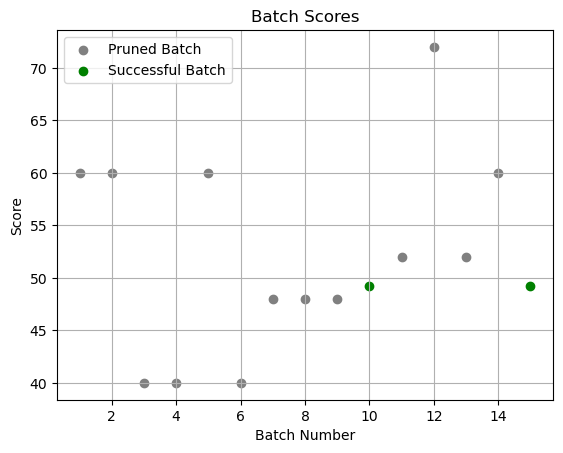

In [10]:
import matplotlib.pyplot as plt


trial_logs = optimized_program.trial_logs

trial_numbers = list(trial_logs.keys())
scores = [trial_logs[trial]["score"] for trial in trial_numbers]

full_eval = [trial_logs[trial]["full_eval"] for trial in trial_numbers]

for trial_number, score, pruned in zip(trial_numbers, scores, full_eval):
    if pruned is False:
        plt.scatter(
            trial_number,
            score,
            color="grey",
            label=(
                "Pruned Batch"
                if "Pruned Batch" not in plt.gca().get_legend_handles_labels()[1]
                else ""
            ),
        )
    else:
        plt.scatter(
            trial_number,
            score,
            color="green",
            label=(
                "Successful Batch"
                if "Successful Batch" not in plt.gca().get_legend_handles_labels()[1]
                else ""
            ),
        )

plt.xlabel("Batch Number")
plt.ylabel("Score")
plt.title("Batch Scores")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
best_score = 0
best_program_so_far = None


def get_signature(predictor):
    if hasattr(predictor, "extended_signature"):
        return predictor.extended_signature
    elif hasattr(predictor, "signature"):
        return predictor.signature


# print(f"Baseline program | Score: {best_score}:")
# for i, predictor in enumerate(WrapperEnglishSPT().predictors()):
#     print(f"Prompt {i+1} Instruction: {get_signature(predictor).instructions}")
# print()

print("----------------")

for trial_num in optimized_program.trial_logs:
    program_score = optimized_program.trial_logs[trial_num]["score"]
    program_pruned = optimized_program.trial_logs[trial_num]["full_eval"]
    # if (
    #     program_score > best_score
    #     and program_pruned is True
    #     # and optimized_program.trial_logs[trial_num]["full_eval"]
    # ):
    if program_pruned is True:
        best_score = program_score
        best_program_so_far = optimized_program.trial_logs[trial_num]["program"]
    # if trial_num % 5 == 0:
    #     print(f"Best program after {trial_num} batches | Score: {best_score}:")
    #     for i, predictor in enumerate(best_program_so_far.predictors()):
    #         print(f"Prompt {i+1} Instruction: {get_signature(predictor).instructions}")
    #     print()
    
        # print(f"Best program with best score: {best_score}")
        for i, predictor in enumerate(best_program_so_far.predictors()):
            print(f"Prompt {trial_num} Instruction: {get_signature(predictor).instructions}")
            print(best_score)
        print()

----------------
Prompt 10 Instruction: You are a highly trained data annotation tool capable of providing subjective responses. Evaluate the semantic similarity of the target word in sentences 1 and 2, considering only the objects/concepts to which the words refer. Ignore any common etymology and metaphorical similarity! Ignore capitalization! Ignore number (cat/cats = identical meaning)! Homonyms (such as bat the animal vs bat in baseball) are considered unrelated. Provide a numerical score as output: 1 is unrelated; 2 is distantly related; 3 is closely related; 4 is identical meaning. Your response should align with the succinct judgment of a human.

In a high-stakes scenario, your accuracy in evaluating semantic similarity will directly impact the development of advanced natural language processing systems, which could revolutionize fields such as artificial intelligence, machine translation, and text summarization. The future of effective human-computer interaction depends on your

In [12]:
program_spt_prompt_es_assertions.load(
    "compile-models/sp/en_spt_mipro_optimized_prompt_es_llama3-3-q4"
)

In [13]:
custom_evaluate(
    random.choices(classes_1_test, k=100)
    + random.choices(classes_2_test, k=100)
    + random.choices(classes_3_test, k=100)
    + random.choices(classes_4_test, k=100),
    evaluate_answer,
    program_spt_prompt_es_assertions,
    debug=True,
)

Evaluating: 400 examples


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  2
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  3
Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  3
Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  3
Prediction:  3
Prediction:  1


Prediction:  2
Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  4
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  4
Prediction:  1
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  4
Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  2
Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  4
Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  1
Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  4
Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  1
Prediction:  4
Prediction:  3


Prediction:  2


Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  2


Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  1


Prediction:  1
Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  3
Accurate examples: 197
Bad-formatted examples: 0
Accuracy: 49.25
